# Travel Product Ideas

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [1]:
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld

from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: C:\Users\pdasilva\repos\TinyTroupe\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\OneDrive - Microsoft\TinyTroupe (shared)\Paper artifacts\Working examples (GPT-5)\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-10-02 13:00:37
Current date and time (UTC):   2025-10-02 16:00:37

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 32000
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_name = o

## Experiment setup

In [2]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [3]:
usa_singles = TinyPerson.load_specifications_from_folder("./population/usa_singles_2/")  # no children
usa_couples = TinyPerson.load_specifications_from_folder("./population/usa_couples_2/")   # no children
usa_families = TinyPerson.load_specifications_from_folder("./population/usa_families_2b/") # have children, emphasize family and childrearing aspects

In [4]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [5]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Amelia Foster: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amelia Torres

       + --> Ananya Mehta

       + --> ...others...

USER --> Adriana López Moreno: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Aisha Rahman

       + --> Alex Jun Chen

       + --> ...others...

USER --> Alex Larson: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Andrew Maxwell Porter

       + --> Ava Carter-Moore

       + --> ...others...

USER --> Amelia Foster: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amelia Torres

       + --> Ananya Mehta

       + --> ...others...

USER --> Adriana López Moreno: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Aisha Rahman

       + --> Alex Jun Chen

       + --> ...others...

USER --> Alex Larson: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Andrew Maxwell Porter

       + --> Ava Carter-Moore

       + --> ...others...

In [6]:
singles_market.run(1)

2025-10-02 13:01:04,417 - tinytroupe - INFO - [Target audience 1 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

2025-10-02 13:01:04,422 - tinytroupe - INFO - [Target audience 1 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-02 13:01:29,206 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charles Vernon Whitaker acts: [THINK] 
                             > Weighing things through: I'm 62, on a modest part-time income, and
                             > prefer simple, quiet trips — fishing, a road trip to a state park, or
                             > visiting my sister. Luxury beachfront and spa packages sound pleasant
                             > but are pricey and geared toward people looking for pampering and
                             > adult-only resorts. I distrust services that promise to 'avoid fake
                             > reviews' — around here we trust a neighbor's word more than an
                             > internet star. Other vacation alternatives I’d pick: an early-morning
                             > fishing trip at the little reservoir, a short drive to a national
                             > park, or a cheap motel near a good lake. Given my budget, habit of
                             > doing my own planning, and preference for plain comfort over fancy
                             > amenities, the most likely answer is No.

Charles Vernon Whitaker acts: [TALK] 
                             > No. I wouldn't use WanderLux. I'm more likely to take a plain, quiet
                             > trip — a fishing weekend or a cheap road trip to a park — than pay
                             > for a luxury beachfront/spa service. Money's tight, I like planning
                             > things myself or trusting local recommendations, and I don't need the
                             > polished, adult-only pampering those packages sell.

Charles Vernon Whitaker acts: [DONE] 
                             > Turn complete.

2025-10-02 13:01:30,175 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charlotte Evans acts: [THINK] 
                     > I should weigh my personal situation and preferences carefully before
                     > answering. I'm 55, retired in Boston, and travel is one of my long-term
                     > goals—especially quiet, restorative trips and spiritual retreats. I prefer
                     > calm, adult-oriented settings (beachfront, spa, meditation-friendly) and I'm
                     > sensitive to crowds and superficial experiences. Alternatives I might
                     > consider include a pilgrimage or meditation retreat in Asia, a nature hike or
                     > botanical garden-focused trip, or a modest cultural tour closer to home.
                     > Affordability matters: as a retiree I budget for travel but value
                     > transparency and curated options that reduce the risk of a disappointing
                     > stay.  WanderLux's focus on quiet, luxury beachfront and spa destinations,
                     > adult-only options, and protection against fake reviews aligns closely with
                     > what I seek: safety, peace, and trustworthy curation. Given that alignment
                     > and assuming the price range includes mid-to-upper tiers I can plan for, the
                     > service would likely save me time and reduce anxiety about choosing (...)

Charlotte Evans acts: [TALK] 
                     > Yes  I would use WanderLux because its focus on quiet, adult-oriented
                     > beachfront and spa retreats matches what I look for in a restorative
                     > vacation. As a retired counselor who values mindfulness and calm, I prefer
                     > curated, trustworthy options that avoid crowded, noisy places and unreliable
                     > reviews. While I might sometimes choose a pilgrimage or nature-focused trip
                     > instead, the clarity and reassurance your service promises—especially about
                     > authenticity and peace—make it likely I would book my one trip through you,
                     > provided the price options are within a reasonable budget.

Charlotte Evans acts: [DONE] 
                     > Finished response; awaiting any follow-up questions.

2025-10-02 13:01:30,451 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Casey Rivera acts: [THINK] 
                  > Okay—time to actually think like Casey. Quick checklist: I'm 23, working part-
                  > time as a barista plus gig shifts in LA, money's tight, saving for an apartment
                  > and paying down debt. I do want to travel (Mexico City and Tokyo on the list),
                  > but usually those are budgeted trips or occasional splurges. WanderLux = luxury
                  > beachfront/spa, adult-only, quiet and curated. That sounds nice, but it also
                  > sounds expensive and not the usual style of trip I prioritize (I usually pick
                  > city food trips, thrifting weekends, or affordable cultural getaways).
                  > Alternatives I’d realistically pick: a cheaper city trip to Mexico City to eat
                  > and thrift, a long weekend road trip to San Diego, or spending the same money on
                  > several smaller trips/experiences with friends. I might use WanderLux if it were
                  > a rare splurge paid for by someone else, a special occasion, or if there were
                  > strong discounts/perks that made it affordable without derailing savings goals.
                  > But given current finances and goals, the most likely choice for my one vacation
                  > n (...)

Casey Rivera acts: [TALK] 
                  > No. I wouldn’t use WanderLux for my one vacation next year. I want to travel,
                  > but I’m budget-conscious—between rent, paying off cards, and saving for a place,
                  > splurging on a luxury beachfront spa isn’t realistic. I’d more likely spend that
                  > trip budget on a cheaper cultural/city trip (Mexico City or a nearby road trip)
                  > or a few smaller trips with friends. The service sounds lovely for people who
                  > can afford a quiet luxury retreat, but right now I’d only consider it as a once-
                  > in-a-long-time splurge or if there was a big discount or someone else was
                  > covering most of the cost.

Casey Rivera acts: [DONE] 
                  > Finished answer to WanderLux survey.

2025-10-02 13:01:31,632 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Cameron Ellis acts: [THINK] 
                   > I need to answer with Yes or No and then explain. I'm Cameron, a 38-year-old
                   > CNA in Atlanta who watches the budget close — work is steady but money's tight,
                   > and my schedule makes long trips harder. I do like quiet, restful getaways (a
                   > calm beach day or a little spa time sounds nice), but luxury, adult-only
                   > beachfront stays are usually pricey and not something I'd pick over visiting
                   > family or a modest, affordable trip. Other options I'd prefer: visiting
                   > relatives, a budget beach rental with friends, a local B&B staycation, or
                   > taking advantage of a discount package. So weighing cost, time off, and what I
                   > actually use my money for, I'm leaning to "No."

Cameron Ellis acts: [TALK] 
                   > No. I appreciate the idea — Lord, a quiet beach and a little pampering would be
                   > heavenly — but I wouldn't use WanderLux for my one vacation next year. As a CNA
                   > working long shifts and watching every dollar, I'm more likely to choose
                   > something I can afford and that fits my schedule: visiting family, a modest
                   > beach rental with friends, or a nearby staycation. If WanderLux had clear
                   > budget-friendly options or discounts for working folks, I'd consider it, but as
                   > a luxury-focused service it's probably out of my reach.

Cameron Ellis acts: [DONE] 
                   > Finished answering the market-research question.

2025-10-02 13:01:31,937 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Martinez acts: [THINK] 
                    > Okay—got a survey about WanderLux. I need to decide if I'd use a luxury/spa
                    > beachfront service next year. Considerations: I'm 22, unemployed, living in
                    > rural Midwest, working on my GED, so money's tight. I like sports, hanging
                    > with friends, fishing, and active trips — not quiet, adult-only spa vacations.
                    > Other vacation options I'd prefer: a road trip to a lake for fishing/camping,
                    > a weekend traveling to play pickup basketball or catch a live game, or a cheap
                    > trip with friends. Affordability and vibe matter most. If I were flush with
                    > cash or looking for a romantic quiet getaway, I'd maybe consider it, but given
                    > my current situation the most likely answer is No.

Chloe Martinez acts: [TALK] 
                    > No — I wouldn't use WanderLux next year. I'm unemployed and on a tight budget,
                    > and I usually want trips that are active and social (pickup basketball,
                    > fishing, camping, or a cheap road trip with friends) rather than quiet, pricey
                    > beachfront spas aimed at adults only. If my finances changed or I needed a
                    > romantic calm getaway, I might consider a service like this, but right now
                    > it's not what I'd pick.

Chloe Martinez acts: [DONE] 
                    > Finished response to WanderLux survey.

2025-10-02 13:01:32,182 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Foster acts: [THINK] 
                   > Okay, I need to decide if I'd use WanderLux for my one vacation next year.
                   > Consider my situation: I'm 30, living in Los Angeles, currently unemployed and
                   > looking for creative work — money is tight. I like relaxing quiet time
                   > sometimes (I practice yoga/meditation and value mental-health-focused breaks),
                   > but I'm also social and enjoy festivals, exploring neighborhoods, and creative
                   > experiences. WanderLux's offering (luxury/romantic beachfront spa, adult-only,
                   > quiet) definitely appeals for recharging and avoiding crowds, which I value.
                   > However, the likely cost of a luxury curated service, plus my current budget
                   > constraints, and my tendency to prefer creative or community-oriented trips
                   > (art-city getaways, budget beach Airbnb or a PCH road trip, or attending an
                   > indie festival) make it unlikely I'd pick a full luxury service. I might use
                   > WanderLux if there were a major discount, a special occasion, or if it offered
                   > more affordable curated options; otherwise I'm more likely to choose a cheaper,
                   > more creative/active (...)

Amelia Foster acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. While I
                   > love the idea of a quiet, adult-only beachfront spa to really recharge (that
                   > does sound lovely for my anxiety and need for calm), I'm currently unemployed
                   > and on a tight budget, so a luxury curated service is probably out of reach. I
                   > tend to prefer trips that mix creativity and community — exploring art
                   > neighborhoods, indie music, local food spots, or a budget-friendly road trip up
                   > the coast — which feel more aligned with my interests and finances. If
                   > WanderLux offered more affordable packages or a special deal, or if it was for
                   > a special occasion, I'd consider it, but as things stand I'm more likely to
                   > pick a cheaper, experience-focused alternative.

Amelia Foster acts: [DONE] 
                   > Answered the market-research question and explained reasoning.

2025-10-02 13:01:33,353 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Arthur Lee McBride acts: [THINK] 
                        > I need to weigh this like any repair job: list the facts, check what's
                        > important, then decide. I'm 72, retired on a small pension and Social
                        > Security. I like simple, quiet things — fishing at the Yazoo, sitting on
                        > my porch with sweet tea, church on Sundays. A beachfront spa sounds
                        > peaceful, but it's aimed at couples and folks who'll pay for pampering. I
                        > haven't a partner to share a romantic trip with, and the cost of an all‑in
                        > concierge luxury service would eat a big chunk of what I use for bills,
                        > prescriptions, and keeping the house paid off. Getting there would mean a
                        > drive or a plane ticket; that adds time and hassle I don't relish. Other
                        > options I prefer: a short fishing trip nearby, visiting my sister in
                        > Jackson, or spending a week fixing up the '67 Chevy — all cheaper and more
                        > my kind of rest. Given my budget, mobility, and tastes, the likely answer
                        > is no.

Arthur Lee McBride acts: [TALK] 
                        > No. I wouldn't use WanderLux. I'm a retired man on a fixed income from
                        > Clarksdale — I don't have the money nor the inclination for an upscale,
                        > romantic beachfront spa. I prefer simple, familiar getaways: fishing down
                        > the Yazoo, visiting my sister in Jackson, or working on my old Chevy.
                        > Those give me peace without the high cost or fuss of a luxury concierge.
                        > Thank you for asking.

Arthur Lee McBride acts: [DONE] 
                        > Finished response to market-research question.

2025-10-02 13:01:34,160 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Torres acts: [THINK] 
                   > I must answer Yes or No and then explain. Consider my situation: I'm 40, work
                   > long hours as a construction worker in the rural South, and I'm trying to save
                   > for a house and to start a small business. I like quiet outdoor trips—fishing,
                   > hiking, simple cabins—not flashy luxury. WanderLux offers luxury beachfront/spa
                   > getaways for adults; that could be peaceful, but it's likely expensive and not
                   > something I'd normally spend on. Other vacation options I'd prefer: a fishing
                   > trip, a camping weekend, or a cheap cabin by a lake—all cheaper and more my
                   > style. Given budget, goals, and preferences, the most likely answer is No.

Amelia Torres acts: [TALK] 
                   > No. I wouldn't use WanderLux. I'm saving money to buy a modest home and
                   > eventually start my own small construction business, and I prefer simple
                   > outdoor trips (fishing, camping, a quiet cabin) to expensive luxury spa
                   > getaways. A beachfront spa sounds nice for a quiet retreat, but it's not what I
                   > can afford or usually need to recharge. If I had one vacation next year, I'd
                   > spend it on a low-cost trip that gets me outdoors and relaxed, not on a luxury
                   > package.

Amelia Torres acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:01:34,370 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ananya Mehta acts: [THINK] 
                  > Stepwise reasoning: 1) Personal situation: senior staff engineer in the Bay Area
                  > with a busy schedule, on-call occasionally, values restorative, low-friction
                  > travel; finances are disciplined (mortgage, savings) so I can afford one higher-
                  > quality vacation next year if it's justified. 2) Travel preferences: I prefer
                  > slow, culturally rich travel and food-focused trips, but I also value quiet,
                  > calm retreats (Kerala backwaters, small coastal ryokans in Japan) for
                  > restorative breaks. 3) Service fit: WanderLux focuses on luxury/romantic
                  > beachfront and spa, adult-only, curated to avoid fake reviews — that directly
                  > addresses my main friction: limited time to vet places and desire for
                  > trustworthy, restful stays. 4) Alternatives: self-planned boutique stays (books
                  > via trusted small travel blogs), visiting family in India (different purpose),
                  > or active/adventure trips (cycling tours, national parks) — these are attractive
                  > but serve different needs. 5) Constraints and tradeoffs: WanderLux may be
                  > pricier and more curated ( (...)

Ananya Mehta acts: [TALK] 
                  > Yes — I would most likely use WanderLux. Reason: I have limited vacation time
                  > and prefer low-friction, trustworthy planning when I want a quiet, restorative
                  > getaway (beachfront or spa) rather than spending hours vetting listings.
                  > WanderLux’s adult-only, vetted curation and focus on avoiding fake reviews
                  > directly addresses that friction. Alternatives I’d consider are a self-planned
                  > boutique stay or visiting family in India (for different reasons), or an active
                  > trip like a cycling tour, but for a single luxury/restorative vacation next year
                  > the convenience and trust of a curated service are worth the likely premium.

Ananya Mehta acts: [DONE] 
                  > Finished — answered the research question and provided rationale.

2025-10-02 13:01:34,588 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Martinez acts: [THINK] 
                  > Okay, I need to weigh job, budget, and what I actually want from a vacation. I
                  > work as a culinary assistant in Atlanta and money is tight right now; big luxury
                  > trips are usually out of reach unless I save a lot or get a bonus. What I look
                  > for in vacations: chances to learn about food, visit markets, meet cooks, and
                  > come back inspired — sometimes quiet and restful, sometimes hands-on and
                  > cultural. WanderLux sounds peaceful and pampering (beachfront, spa, adult-only),
                  > which I do enjoy for recharging, but it doesn't mention culinary or cultural
                  > immersion. Other alternatives I'd prefer: a food-focused trip to regional
                  > markets and small producers, a volunteer kitchen exchange, or a modest road trip
                  > to visit indigenous foodways and family recipes. So considering my schedule,
                  > finances, and my travel priorities (learning and cooking), the most likely
                  > honest answer is No — unless the service offered culinary-focused packages at an
                  > affordable price.

Ava Martinez acts: [TALK] 
                  > No. I wouldnt use WanderLux for my one vacation next year because Im more
                  > likely to spend limited vacation time and money on a trip that helps me learn
                  > about food and local culinary traditions (markets, small producers, workshops).
                  > Luxury beachfront spas sound lovely for resting, but right now Id prefer
                  > experiences that feed my cooking practice and future bakery plans. If WanderLux
                  > added affordable culinary-immersion options focused on local food culture, I
                  > might reconsider.

Ava Martinez acts: [DONE] 
                  > Finished response; waiting for any follow-up questions.

2025-10-02 13:01:39,036 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charlotte Nguyen acts: [THINK] 
                      > I should weigh this carefully: I'm 30, unemployed and living in LA, trying
                      > to save while building a creative portfolio and looking for work. I do crave
                      > quiet, cozy getaways and a beachfront spa sounds lovely for stress relief,
                      > but WanderLux is pitched as luxury/romantic and will likely be pricey. Key
                      > factors: my current budget constraints, my goals (finding stable work,
                      > building community, maybe returning to school), and practicalities like
                      > caring for Pixel the cat. Other vacations I might prefer are a local art
                      > retreat, an indie game festival or convention, a budget beach B&B, or a
                      > staycation that supports creative work and networking. Balancing desire for
                      > calm against financial reality and long-term goals, the most likely honest
                      > answer is "No."

Charlotte Nguyen acts: [TALK] 
                      > No — I wouldn't use WanderLux. As dreamy as a quiet beachfront spa sounds (I
                      > literally pictured myself with a sketchbook by the ocean), I'm unemployed
                      > and on a tight budget next year, so a luxury/romantic service isn't
                      > realistic for me. I also tend to pick trips that feed my creativity or help
                      > me connect with other artists—local art retreats, indie game events, or a
                      > cheaper beach B&B make more sense right now. Plus, I have Pixel at home,
                      > which makes long trips trickier. If WanderLux offered more affordable or
                      > creativity-focused packages, I'd be much more interested, but for my one
                      > vacation next year I'd pass.

Charlotte Nguyen acts: [DONE] 
                      > Finished — answered the WanderLux question and explained why.

2025-10-02 13:01:41,860 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Bennett acts: [THINK] 
                   > Work through the question step by step. I'm a 40-year-old construction worker
                   > in the rural South with a limited vacation budget and lots of physical work —
                   > back pain shows up sometimes. I like quiet outdoor things: fishing, hiking,
                   > working on DIY projects. WanderLux offers luxury beachfront/spa adult-only
                   > trips — that sounds peaceful but also pricey and a bit out of my usual. Other
                   > vacation options I prefer: a fishing trip with buddies, a simple cabin by a
                   > lake, camping/hiking, or visiting family. I value getting quiet and calm, but I
                   > also need to think about what I can afford and what gives me the most value.
                   > The service could be useful if I wanted a romantic luxury trip and it was
                   > affordable and well-vetted, but given my situation and priorities, I'm unlikely
                   > to pay for a luxury booking service for my one vacation next year. Decision:
                   > No.

Chloe Bennett acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. I'm a working
                   > construction guy in a rural part of the South with a tight budget, and I
                   > usually want quiet, outdoorsy time — fishing, a cabin by a lake, or a simple
                   > camping trip — not expensive beachfront spas. I also have practical priorities
                   > (saving toward a home, keeping weekends for projects), so I'd pick a cheaper,
                   > more familiar option that gives me fresh air and downtime. If WanderLux offered
                   > an affordable, well-vetted romantic package and I had the money, I might
                   > consider it, but most likely I'd choose a practical outdoor trip or save the
                   > cash.

Chloe Bennett acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:01:55,190 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Ramirez acts: [THINK] 
                   > Okay, I need to answer the WanderLux question as Chloe. Quick checklist: I'm
                   > 22, living in Atlanta, unemployed and focusing on GED and game design — money's
                   > tight. I like quiet places and hate loud crowds, so a beachfront spa sounds
                   > nice in theory. But the service is luxury/romantic/adult-only and probably
                   > pricey; I'd likely prioritize paying for courses, software, or a local trip or
                   > game jam instead. Other vacation options I'd prefer: a budget road trip to the
                   > coast with friends, a staycation to focus on a game jam, or visiting
                   > Jordan/Aunt Maria since community matters. So weighing preferences (I do like
                   > calm getaways) against real constraints (affordability, goals), the most likely
                   > answer is No.

Chloe Ramirez acts: [TALK] 
                   > No  I like the idea of a quiet beachfront/spa since I hate loud places, but I'm
                   > probably not the target customer right now — I'm unemployed, saving for GED and
                   > game-design stuff, and would rather spend limited money on courses, local
                   > trips, or a game jam with friends. So even though the service sounds nice, I
                   > wouldn't use it next year given my budget and priorities.

Chloe Ramirez acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:01:55,270 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Nguyen acts: [THINK] 
                  > I need to answer as Chloe: consider my job (environmental consultant, somewhat
                  > stressed), love of nature and quiet getaways, interest in sustainability, likely
                  > budget as a young professional, and possible alternatives like national-park
                  > trips or volunteer travel. Give a clear Yes/No first, then a concise explanation
                  > including caveats about sustainability and cost.

Chloe Nguyen acts: [TALK] 
                  > Yes — I would likely use WanderLux for my one vacation next year. As someone who
                  > works in a stressful, mission-driven job, I often want a quiet, restorative trip
                  > (beachfront or spa) more than parties or high-energy adventure, and a service
                  > that vets properties and avoids fake reviews sounds valuable. That said, I’d
                  > only book if WanderLux offered eco-friendly/sustainable options and transparent
                  > pricing; otherwise I might instead pick a more nature-focused trip (national
                  > park hiking, a cabin getaway) or a volunteer-oriented trip that aligns with my
                  > values and budget.

Chloe Nguyen acts: [DONE] 
                  > Turn complete — answered the survey question and gave reasoning.

2025-10-02 13:01:55,848 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


David Lee acts: [THINK] 
               > I need to weigh this carefully: my persona is David Lee, living in rural Colorado,
               > passionate about national parks, hiking, and community-based environmental work. I
               > like quiet retreats but usually in nature rather than beachfront luxury spas. I'm
               > currently not in stable employment and so cost matters; luxury beachfront vacations
               > are likely outside my usual budget. I should consider whether WanderLux's promise
               > to avoid fake reviews and offer quiet, adult-focused getaways would overcome my
               > preference for nature and my financial constraints. Also think about alternatives I
               > might choose: national-park lodges, eco-retreats, volunteer conservation trips, or
               > a roadtrip to state parks. Given these factors, the most likely answer is No, but
               > note that if WanderLux offered eco-focused, reasonably priced nature retreats I'd
               > be more interested.

David Lee acts: [TALK] 
               > No — I probably wouldn't use WanderLux for my one vacation next year. I love quiet,
               > restorative trips, but I prefer nature-based travel (national parks, hiking, eco-
               > retreats) over adult-only beachfront luxury spas. Right now I'm between jobs and
               > living in rural Colorado, so budget is an important constraint; a luxury beachfront
               > trip feels outside what I can realistically afford and what most recharges me. That
               > said, I really appreciate the care you're putting into vetting places and avoiding
               > fake reviews — that's valuable. If WanderLux expanded to include sustainably
               > minded, nature-focused retreats or modestly priced eco-lodges (especially those
               > that support local conservation), I'd be much more likely to use it.

David Lee acts: [DONE] 
               > Finished response.

2025-10-02 13:01:59,706 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Callahan acts: [THINK] 
                     > Okay — need to weigh this carefully. I'm Daniel, a 42-year-old LPN working
                     > rotating 12-hour shifts in suburban Atlanta. If I only get one vacation next
                     > year, I want real rest and something I enjoy: fishing, being outdoors, maybe
                     > a quiet cabin or a short campground trip, not flashy resorts. Money matters —
                     > I save a little each month but prefer value over splurge. WanderLux focuses
                     > on luxury beachfront/spa adult-only getaways; that doesn't line up with my
                     > usual tastes or likely budget. Alternatives I'd pick: a lakeside cabin for a
                     > few days of fishing, a national-park weekend, or a simple B&B near hiking
                     > spots. Conclusion forming: probably not the right fit for me.

Daniel Callahan acts: [TALK] 
                     > No. I wouldn't use WanderLux if I only had one vacation next year. I'm more
                     > of a practical, outdoorsy guy — give me a quiet cabin by a lake, a guided
                     > fishing trip, or a weekend at a nearby national park and I'm happy. I work
                     > rotating 12-hour shifts and prefer something that helps me really unwind
                     > without breaking the bank; a luxury beachfront spa sounds nice on paper but
                     > it's not what I usually want or can justify spending on. I also prefer
                     > booking places recommended by friends, family, or local folks I trust rather
                     > than a high-end concierge service. If your service included modest, quiet
                     > options that match a working-guy budget and recommended-by-trust routes, I'd
                     > be more likely to consider it, but as pitched now — probably not.

Daniel Callahan acts: [DONE] 
                     > Finished response to WanderLux market-research question.

2025-10-02 13:01:59,838 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


David Alan Porter acts: [THINK] 
                       > Okay — weigh this out. I'm David, 42, lead carpenter in Marietta. I usually
                       > take one vacation a year — most likely a stadium trip or a simple fishing
                       > weekend. Money and time off matter; I watch the budget and prefer practical
                       > value over fancy bells. I do like quiet and low-drama getaways, but 'luxury
                       > beachfront + spa' concierge services feel outside my usual style and price
                       > range unless it's a special occasion. I also distrust services promising to
                       > dodge fake reviews; I prefer booking through known contacts or doing it
                       > myself. Most likely answer: No, but I'd consider it if the price and
                       > guarantee of a quiet, adult-only spot were right.

David Alan Porter acts: [TALK] 
                       > No. I wouldn't use WanderLux for my one vacation next year. I keep
                       > vacations simple and practical — I usually spend my one trip visiting a new
                       > ballpark with a buddy or taking a quiet fishing weekend. I'm budget-
                       > conscious and prefer to book places myself or through people I trust
                       > instead of paying for a luxury concierge service. If it were a special
                       > occasion or the price and guarantee of a quiet, adult-only spot were
                       > excellent, I might consider it, but most likely I'd pass.

David Alan Porter acts: [DONE] 
                       > Finished answering the survey question.

2025-10-02 13:02:00,024 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Foster acts: [THINK] 
                   > I should weigh my situation carefully before answering. I'm Daniel, 30, living
                   > in LA, currently unemployed after leaving a retail job due to burnout — money
                   > is tight and job-search anxiety is constant. I like quiet, cozy creative spaces
                   > and sometimes crave rest (spa, beach vibes sound lovely), but I also value
                   > creative connection and affordability. Alternatives I'd realistically consider
                   > for my one vacation: a weekend art crawl in SoCal, a cheap creative retreat or
                   > residency, a road trip to see galleries/nature with friends, or even a local
                   > staycation to recharge and work on art. Given limited funds and the need to
                   > prioritize returning to school/getting stable work, a luxury beachfront/spa
                   > service aimed at adults likely isn't what I'd pick unless it were heavily
                   > discounted or a special treat. Conclusion forming: lean toward No, but note I'd
                   > be tempted if price and community-oriented options existed.

Daniel Foster acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. As much as the idea
                   > of a quiet, luxury beach-and-spa week sounds dreamy (I picture long mornings
                   > sketching with coffee and Pixel curled up beside me), my current reality makes
                   > that unrealistic — I'm unemployed and need to be careful with savings. What I
                   > actually want from a single trip is a creative recharge and connection with
                   > people or places that inspire my art, not just passive pampering. So I'd
                   > instead pick something more affordable and meaningful: a road trip to local art
                   > towns, a short creative retreat/residency, or even a curated stay at a small
                   > B&B where I can meet fellow creatives. That said, if WanderLux offered a
                   > budget-friendly package or a creative-focused retreat option with transparent
                   > reviews and community activities, I'd reconsider — it has potential, but right
                   > now I'd pass.

Daniel Foster acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:02:01,242 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Clarence Walker acts: [THINK] 
                     > All right — gotta think this through like I would at the kitchen table. I'm
                     > 72, retired, living on Social Security and a small pension out in the
                     > country. I like quiet, but I also watch my money and prefer practical, low-
                     > fuss trips: a weekend at a lake cabin, a short drive to visit my sister, or
                     > an inexpensive fishing trip with a buddy. A beachfront spa sounds pleasant
                     > for quiet and calm, but 'luxury' usually means higher cost and a lot of
                     > frills I don't need. I worry about scams and overpriced packages — been
                     > burned by fancy sales before, so I trust local, simple arrangements more than
                     > big-name luxury services. Other vacation alternatives I'd pick: a cabin by a
                     > state lake, a weekend at the county pond fishing, a short road trip to see
                     > Nora, or just spending extra time on the pickup project and driving to the
                     > county fair. Given my fixed income and frugal habits, the most likely choice
                     > is to pass on an expensive luxury booking service unless they offered a
                     > plainspoken, budget-friendly option that saved me time (...)

Clarence Walker acts: [TALK] 
                     > No — I wouldn't use WanderLux. I'm retired on a modest fixed income and
                     > prefer simple, low-cost getaways (a cabin by a lake, a short fishing trip, or
                     > visiting my sister) over beachfront luxury and spa packages. I appreciate
                     > quiet and calm, but not at the price of fancy extras or complicated bookings.
                     > If WanderLux offered straightforward, honest, budget-friendly options and
                     > helped avoid scams, I might consider it, but as described it's not a fit for
                     > me.

Clarence Walker acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-02 13:02:02,596 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Diego Manuel Herrera acts: [THINK] 
                          > Ok, pienso como Diego: tengo trabajo de línea en La Reina, horas largas
                          > y pocos ahorros; siempre mando remesas a mi familia en Jalisco y ahorro
                          > para abrir mi taquería. Prefiero viajes que me conecten con la familia o
                          > que sean prácticos (ir a mercado, probar comida, visitar abuela). Un
                          > resort de lujo y spa suena bonito pero caro y no es lo que normalmente
                          > deseo; además prefiero experiencias activas (soccer con amigos, mercados
                          > locales) o visitar a mi familia. Alternativas realistas: ahorrar para un
                          > viaje a Guadalajara, una escapada económica de fin de semana con amigos,
                          > o usar el dinero para equipo de cocina/negocio. Podría considerar
                          > WanderLux si alguien más paga o si fuera un regalo grande, pero con mi
                          > situación económica y prioridades la probabilidad de usar ese servicio
                          > para mi único viaje es baja. Voy a responder claramente: "No" y luego
                          > explico porqué en mi estilo (Spanglish, directo y cálido).

Diego Manuel Herrera acts: [TALK] 
                          > No. No usaría WanderLux para mi único viaje el próximo año. Soy line
                          > cook, mando remesas y estoy ahorrando para mi taquería y para visitar a
                          > mi familia en Jalisco; gastar en un paquete de lujo y spa no encaja con
                          > mis prioridades ni con lo que disfruto—prefiero pasar tiempo con la
                          > familia, ir a mercados, comer bien y jugar fútbol con los compas. Además
                          > suele ser más caro de lo que puedo pagar. Dicho eso, si fuera un regalo
                          > o una ocasión especial (cumpleaños grande, aniversario) y el precio no
                          > fuera problema, podría pensarlo; pero en mi situación actual, no.

Diego Manuel Herrera acts: [DONE] 
                          > Finished response; waiting for any follow-up questions.

2025-10-02 13:02:05,380 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Emily Chen acts: [THINK] 
                > I need to consider Emily's situation: 25, NYC, digital marketing job at a fast-
                > paced startup with work stress and limited vacation days; she loves traveling,
                > values quiet getaways and cultural experiences, but can also enjoy adventure.
                > WanderLux offers curated beachfront/spa, adult-only, avoids fake reviews — that
                > aligns with her dislike of crowded, overwhelming places and her interest in
                > relaxation after stressful work. Alternatives: an adventure trip (hiking,
                > backpacking), a cultural city trip (short-break in Europe), or a budget DIY beach
                > trip. Affordability: as a startup employee she might have to save but would
                > consider splurging once a year for a restorative trip. Balancing these, the most
                > likely choice for a single vacation next year is to use a service that guarantees
                > calm, high-quality relaxation and saves time — so answer = Yes. I'll explain
                > reasons, note alternatives and budget caveat in a friendly, slightly humorous
                > tone.

Emily Chen acts: [TALK] 
                > Yes — I'd use WanderLux. Reasoning: I work at a hectic startup in NYC and value a
                > vacation that actually lets me rest, not just another item on my to-do list. A
                > curated, adult-only beachfront + spa service that filters out fake reviews and
                > noisy resorts sounds perfect for recharging (and for someone who dislikes crowded,
                > chaotic places). I also like that it saves time — as a busy digital marketer I
                > don't want to spend weeks vetting hotels and reading sketchy reviews. Alternatives
                > I'd consider are an adventure trip (hiking or a lively festival) or a cultural
                > city break, but for my one big trip next year I'm most likely to choose rest and
                > calm. Affordability is a caveat: I might pick a mid-tier package or save up to
                > splurge once, so pricing/options would affect the final booking. Overall: yes,
                > because the service fits my need for a quiet, high-quality, hassle-free getaway.

Emily Chen acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-02 13:02:06,445 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Erin Palmer acts: [THINK] 
                 > I need to weigh work demands, vacation style, and budget before answering. As a
                 > nurse manager in outpatient oncology I often have emotionally heavy weeks and
                 > limited vacation time, so restorative, low-friction trips appeal. My travel
                 > preferences skew toward slow travel: nature or quiet cultural trips, but a
                 > beachfront/spa adult-only option fits my need for true downtime. Alternatives:
                 > (A) a self-planned national park hike — cheaper and active, (B) a city cultural
                 > trip with museums and coffee shops — culturally fulfilling, (C) a staycation or
                 > nearby B&B — low cost but less restorative. Financially I'm risk-averse and
                 > budget-conscious (mortgage, savings goals), but I will spend on one meaningful
                 > recharge per year if it reliably delivers rest. A vetted concierge that avoids
                 > fake reviews and saves planning time addresses my top barriers: time and
                 > reliability. Given those factors, the most likely choice for a single vacation
                 > next year is to use a trusted, curated service.

Erin Palmer acts: [TALK] 
                 > Yes. I would use WanderLux because (1) I have limited time off and value a
                 > reliably restorative, adult-only beachfront/spa experience, (2) the service saves
                 > planning time and reduces the risk of a disappointing stay by vetting properties
                 > and reviews, and (3) I’m willing to pay a bit more for quality and peace of mind
                 > given the emotional intensity of my work — though I’d choose a package that fits
                 > my budget rather than the top-tier option.

Erin Palmer acts: [DONE] 
                 > Waiting for follow-up or clarifying questions.

2025-10-02 13:02:09,701 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ethan Kim acts: [THINK] 
               > I need to consider my situation and preferences before answering. I'm Ethan, a
               > 50-year-old retired man living in the rural Midwest. I like quiet, nature-focused
               > trips (national parks, fishing, hiking) and I volunteer at animal shelters. I
               > prefer calm over noisy or party-focused vacations. WanderLux offers luxury
               > beachfront and spa adult-only getaways — that could match my desire for quiet, but
               > it's focused on luxury and beaches rather than the inland nature I usually enjoy. I
               > must weigh affordability: on a retirement income, fully paid luxury vacations are
               > less likely unless I save specifically for it. Other alternatives I might prefer: a
               > road trip to a national park, a fishing trip to a lake, a modest cabin rental near
               > trails, or volunteering-based travel. I also think about who I'd travel with —
               > maybe Tom or a close friend — and whether an adult-only luxury resort is worth the
               > cost versus a peaceful cabin. Given my love of nature and limited budget, I'm
               > leaning toward not using a luxury beachfront/spa servi (...)

Ethan Kim acts: [TALK] 
               > No. I appreciate quiet, calm getaways, but a luxury beachfront and spa service
               > isn't the most likely choice for me. I'm retired on a modest income and prefer
               > nature-focused trips — national parks, fishing, hiking, or a simple cabin by a lake
               > — which feel more restorative and in line with my interests than an upscale beach
               > resort. If money and company were different, I might consider a quiet adults-only
               > stay, but given my usual preferences and budget, I'd choose a more nature-centered,
               > affordable trip instead.

Ethan Kim acts: [DONE] 
               > Finished answering the WanderLux question.

2025-10-02 13:02:12,878 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evan Chen-Parker acts: [THINK] 
                      > I should be explicit about how my travel preferences, time constraints, and
                      > budget influence whether I'd use a curated luxury/beachfront spa service.
                      > Consider: (1) My job is director-level with limited deep-work windows and
                      > occasional fundraising/hiring spikes—so low-friction trip planning is
                      > attractive. (2) My ideal trips are 10–14 days mixing city time and a nature
                      > segment, with emphasis on local food and boutique stays rather than generic
                      > mega-resorts. (3) I care about sustainability, authenticity, and avoiding
                      > fake reviews; a service that reliably curates adult-only, quiet, high-
                      > quality properties would be valuable. (4) Alternatives I might prefer: a
                      > self-planned Kyoto + mountain hike, a Taiwan immersion/food trip, or a
                      > small-group culinary tour—all more culturally immersive than a pure resort.
                      > (5) Affordability: I can afford a premium service for one special trip, but
                      > expect transparent pricing and measurable value (time saved, vetted local
                      > partners). Overall leaning: Yes, I would use WanderLux for a res (...)

Evan Chen-Parker acts: [TALK] 
                      > Yes. I’d use WanderLux for my one vacation next year if the service truly
                      > curates quiet, adult-only boutique beachfront and spa options (not just big
                      > resorts), vets reviews and local partners transparently, and offers
                      > practical concierge help that saves time. As a busy Director of Data Science
                      > based in San Francisco I value low-friction planning and authentic local
                      > experiences—so WanderLux is appealing for a restful, privacy-respecting
                      > getaway. That said, if my priority were cultural immersion or food-focused
                      > exploration, I might instead self-plan (e.g., Kyoto + hiking or a Taiwan
                      > food trip). Price-wise, I can afford a premium for one special trip but
                      > expect clear value and sustainability-minded partners.

Evan Chen-Parker acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-02 13:02:20,890 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Brooks acts: [THINK] 
                   > Okay, gotta think this through like they asked. I'm 22, living out in the rural
                   > Midwest, unemployed and working on my GED online — money's tight. I love sports
                   > and outdoors stuff (basketball, fishing, hiking), and when I vacation I usually
                   > want to do active things or go to a local game with friends, not spend a ton on
                   > fancy quiet resorts. WanderLux sounds nice for people who want peaceful luxury
                   > beach/spa trips, but I doubt I could afford that or that it matches what I'd
                   > pick. Other options I'd prefer: a camping/fishing trip to save money, a road
                   > trip to watch a big game, or a cheap cabin by a lake with friends. I do like
                   > quiet sometimes, but given my current situation and priorities, the most likely
                   > answer is No.

Evelyn Brooks acts: [TALK] 
                   > No. I wouldn't use WanderLux next year. I'm unemployed and on a tight budget,
                   > and I usually pick active, low-cost trips like camping, fishing, or going to a
                   > sports event with friends. The quiet luxury beachfront/spa thing sounds nice,
                   > but it's not what I can realistically afford or what I'd choose right now — I'd
                   > rather spend money on experiences tied to sports or the outdoors.

Evelyn Brooks acts: [DONE] 
                   > Finished response to the WanderLux survey question.

2025-10-02 13:02:26,614 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gary Rhodes acts: [THINK] 
                 > Alright—I'm Gary, 62, part-time groundskeeper with tight budgets and a mortgage
                 > to mind. Think through this: WanderLux offers quiet luxury and calm, which I can
                 > appreciate in principle, but beachfront spas and romantic packages are usually
                 > pricey and not the sort of thing I spend on. I like simple, quiet trips—fishing
                 > at the county pond, a weekend at a nearby cabin, visiting my sister, or a slow
                 > drive to the county fair. Other factors: I distrust flashy services a bit, prefer
                 > dealing local and face-to-face, and need to keep an eye on expenses so I don't
                 > eat into savings or mortgage paydown. Bottom line in my head: unless it was very
                 > affordable and practical, I wouldn't use a luxury travel concierge for my one
                 > vacation next year.

Gary Rhodes acts: [TALK] 
                 > No. I wouldn't use WanderLux. I'm careful with money, close to finishing my
                 > mortgage, and prefer simple, down-to-earth getaways—fishing, a nearby cabin, or
                 > visiting family—over expensive beachfront spas. Even if I like quiet and calm,
                 > the luxury/romantic focus sounds out of my price range and a bit outside what I
                 > enjoy. If you offered low-cost, no-frills quiet packages closer to home, I'd
                 > maybe consider it, but as described, no.

Gary Rhodes acts: [DONE] 
                 > Turn complete.

2025-10-02 13:02:27,384 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Scott acts: [THINK] 
                   > Okay — consider Gabriel Scott (me): 28, Atlanta-based craft artist, self-
                   > employed with financial instability. I like travel and quiet outdoor time, but
                   > my long-term goals are to grow a small art business, showcase work at fairs,
                   > and build community spaces. WanderLux offers luxury beachfront/spa, adult-only,
                   > with a focus on quiet and avoiding fake reviews. Pros: could be a nice
                   > recharge, low-stress, trustworthy curation. Cons: likely expensive (I
                   > procrastinate on bookkeeping and money is tight), not aligned with my goal of
                   > traveling for art/community events, and I prefer sustainable, locally-rooted
                   > experiences rather than generic luxury resorts. Other alternatives I'd choose:
                   > a budget-friendly art-market road trip, a creative retreat with fellow artists,
                   > or a weekend at a nearby nature spot to recharge. I could consider WanderLux
                   > only if it offered affordable options, sustainable choices, or connection to
                   > local art communities. Most likely choice given current life: no.

Gabriel Scott acts: [TALK] 
                   > No — I probably wouldn't use WanderLux for my one vacation next year. As a
                   > self-employed craft artist in Atlanta with tight finances and travel goals tied
                   > to showing my work and connecting with creative communities, I'd prioritize a
                   > budget-friendly art-market road trip or a creative retreat that helps my
                   > business and feeds my creativity. A luxury beachfront spa sounds lovely for
                   > recharging, but as described it feels expensive and not aligned with my travel
                   > priorities unless you offered sustainable, art-forward packages or price points
                   > that actually fit my budget.

Gabriel Scott acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:02:28,351 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Brooks-Johnson acts: [THINK] 
                           > I need to weigh this honestly against my life and values. I'm 50, live
                           > in rural Montana, work as an environmental consultant, and usually
                           > choose vacations that get me into nature (hiking, eco-lodges,
                           > volunteering). WanderLux is pitched as luxury beachfront/spa, adult-
                           > only — that sounds calming, but it may not align with my preference for
                           > active, low-impact travel or my budget. Other realistic alternatives
                           > for my one big trip next year would be a guided backcountry hike in a
                           > national park, an eco-lodge stay focused on conservation, or a
                           > community-based volunteering trip. Cost and sustainability vetting
                           > matter: if WanderLux guarantees genuine, sustainably run properties and
                           > transparent practices, I might consider it; as described (luxury
                           > beachfront/spa) I’m skeptical. Most likely answer: No.

Evelyn Brooks-Johnson acts: [TALK] 
                           > No — I wouldn't use WanderLux for my one vacation next year. I prefer
                           > trips that immerse me in nature (hiking/eco-lodges or community-based
                           > conservation work) and I care whether accommodations are genuinely
                           > sustainable and community-minded. A luxury beachfront spa sounds lovely
                           > for quiet and relaxation, but unless WanderLux specifically vets and
                           > prioritizes eco-friendly, locally beneficial options and fits my
                           > budget, it doesn't match my priorities. If you expand to include vetted
                           > sustainable eco-retreats, I'd reconsider.

Evelyn Brooks-Johnson acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-02 13:02:29,444 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Mitchell acts: [THINK] 
                    > Okay — I need to walk through this carefully. First, my situation: I'm Grace,
                    > 25, freelance content writer living in Newark. I care a lot about wellness
                    > (yoga, quiet, spa-like resets) and I volunteer locally; I also sometimes feel
                    > anxious about unstable freelance income. What I look for in vacations: calm,
                    > restorative time to recharge and maybe write, someplace with nature, good
                    > food, and low noise. WanderLux focuses on beachfront/spa, quiet, adult-only
                    > stays and vets reviews — that aligns strongly with my ideal. Alternatives I'd
                    > consider: a cheaper city break (museums, cafés), an adventurous trip
                    > (hiking/hostels), a staycation or visiting family, or volunteering abroad
                    > (meaningful but not restful). Cost is the big constraint: one vacation only
                    > next year means I might be willing to splurge a bit for a truly restorative
                    > experience, but I'd still want value and transparency. WanderLux's promise to
                    > avoid fake reviews and arrange calm, luxury options is appealing because it
                    > reduces planning stress and risk — I ha (...)

Grace Mitchell acts: [TALK] 
                    > Yes. I would choose WanderLux for my one big vacation next year because I
                    > prioritize a quiet, restorative getaway — spa/beach settings fit what
                    > recharges me — and I value a service that vets properties and filters out fake
                    > reviews. As a freelancer I worry about money, so I'd look for a mid-tier
                    > package that feels like a reliable, peaceful investment (and I can bribe my
                    > brother to cat-sit Luna). Alternatives like a city break or an adventurous
                    > trip are tempting, but for one vacation focused on true rest, a vetted
                    > luxury/spa beachfront option wins.

Grace Mitchell acts: [DONE] 
                    > Answered the WanderLux question and explained reasoning.

2025-10-02 13:02:30,739 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Crawford acts: [THINK] 
                     > I need to weigh job, time off, preferences, and cost before answering. 1)
                     > Work: as a nurse manager I have limited vacation days and prefer restful,
                     > low-stress trips to recharge. 2) Preferences: I like experiential travel that
                     > mixes coastal nature and quiet towns; I value small, well-run places
                     > (kitchens or simple conveniences are a plus). 3) Service fit: WanderLux
                     > promises curated, adult-focused beachfront/spa stays and to avoid fake
                     > reviews — that addresses a real pain point for me (trust and low-stress
                     > planning). 4) Alternatives: I might otherwise book a boutique B&B, an Airbnb
                     > with good reviews, or plan a DIY coastal road trip. 5) Cost: I’m budget-
                     > conscious but comfortable splurging once a year for quality if it’s good
                     > value and reliable. 6) Conclusion: given my desire for a single dependable,
                     > restorative vacation and the service’s promise to curate trustworthy, calm
                     > luxury options, I would most likely use WanderLux — provided options match my
                     > experiential preferences and cancellation/flexibility and price (...)

Evelyn Crawford acts: [TALK] 
                     > Yes — I would use WanderLux. As a busy nurse manager I value one dependable,
                     > low-stress vacation per year that prioritizes quiet, quality lodging and
                     > trustworthy recommendations; your service’s curation to avoid fake reviews
                     > directly addresses that need. I’d try it if the properties include options
                     > that fit my style (coastal towns, access to nature, simple kitchen or good
                     > food options), the pricing is within a reasonable splurge for me, and
                     > booking/cancellation terms are flexible. If those conditions aren’t met, I’d
                     > fallback to booking a boutique B&B or a vetted Airbnb and planning the trip
                     > myself.

Evelyn Crawford acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-02 13:02:34,996 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Henry Mitchell acts: [THINK] 
                    > Weighing the offer as Henry Mitchell: I'm a 40-year-old construction worker in
                    > rural Alabama, on a tight budget, used to outdoorsy, low-key trips (fishing,
                    > cabins, hiking). Luxury beachfront/spa sounds nice, and I do like quiet
                    > getaways, but cost and practicality matter. Considerations: (1) Job and money
                    > — I work long hours and need to save; splurging on a high-end luxury service
                    > is unlikely unless it's a special occasion or someone else pays. (2) What I
                    > want — quiet and calm fits me, but I prefer nature (river, woods, fishing)
                    > over resort spa scenes most times. (3) Alternatives — a modest cabin rental, a
                    > fishing trip, or a weekend at a nearby state park are more realistic and
                    > affordable. (4) Trust factor — avoiding fake reviews is helpful, but that
                    > alone doesn't sell me if price is out of reach. Conclusion: most likely answer
                    > is No, though I'd consider it for a big milestone or if the price were
                    > reasonable.

Henry Mitchell acts: [TALK] 
                    > No. I appreciate the idea — quiet, adult-only beachfront and spa spots do
                    > sound peaceful — but I'm a working guy on a tight budget who prefers simple,
                    > outdoorsy getaways like fishing or a cabin in the woods. Unless it was a
                    > special occasion or the price made sense, I wouldn't pay for a luxury service
                    > like WanderLux. The trust/fake-review problem matters, but cost and my
                    > preference for low-key nature trips are bigger factors. Alternatives I'd pick:
                    > a nearby fishing trip, a rented cabin, or camping — cheaper and more my style.

Henry Mitchell acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-02 13:02:36,279 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-02 13:02:36,281 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaac Johnson acts: [THINK] 
                   > I need to consider this as Isaac: 30, living in LA, currently unemployed and
                   > looking for creative work in graphic design. Money is tight and I prioritize
                   > saving while job-hunting. I do value quiet, calm getaways — nature, coastal
                   > views, and small creative retreats are things I enjoy — but I usually pick
                   > affordable options (short road trips, camping, budget B&Bs, or staying with
                   > friends) that still feel restorative and inspiring.  WanderLux offers luxury
                   > beachfront/spa, adult-only quiet retreats and promises trustworthy curation.
                   > That aligns with what I like in terms of atmosphere, but luxury services are
                   > likely outside what I can comfortably afford right now unless itʼs a special
                   > occasion or someone else is paying. Alternative vacations I might prefer next
                   > year: a long weekend in Big Sur or Santa Barbara, a solo creative retreat at an
                   > affordable cabin, or a low-cost cultural trip to a nearby city with art shows —
                   > things that feed creativity without breaking the bank.  Also think about trade-
                   > offs: WanderLux re (...)

Harold Dean Fletcher acts: [THINK] 
                          > Alright — think it through like I would on paper. I'm Harold, 62, part-
                          > time maintenance work, modest fixed income, like quiet and simple trips
                          > (fishing, a small cabin, visiting my sister). WanderLux sounds aimed at
                          > quiet luxury on beaches and spas. That part — quiet — could be
                          > appealing, but there are practical problems for me: cost, distance, and
                          > trusting an online luxury service with reviews I don't know. I prefer
                          > booking through people I know or taking a nearby, affordable trip. Other
                          > vacation options I prefer: a week at a friend's cabin on a lake, a small
                          > B&B in a quiet town, or just driving to see my sister. Given my
                          > finances, habits, and distrust of fancy booking services, the most
                          > likely answer is No. I'll explain simply and plainly.

Isaac Johnson acts: [TALK] 
                   > No — I wouldn’t use WanderLux for my one vacation next year. The service sounds
                   > exactly like the kind of quiet, luxurious retreat I crave, but right now I’m
                   > unemployed and need to be careful with money. I’d more likely choose a nearby,
                   > affordable getaway (Big Sur, a budget cabin, or a short coastal road trip) that
                   > still gives me calm and creative inspiration. If my finances improve or it’s a
                   > special celebration, I’d consider WanderLux because the curation and low-risk
                   > booking would be worth it.

Harold Dean Fletcher acts: [TALK] 
                          > No. I wouldn't use WanderLux. I'm a small-town, part-time maintenance
                          > man on a modest budget — I like quiet, plain getaways (a week at a
                          > friend's cabin, a small lakeside B&B, or visiting my sister) more than
                          > an expensive beachfront spa. Even if the idea of calm and adult-only
                          > fits, I'm wary of the cost and of trusting online packages and reviews I
                          > can't verify. I tend to arrange trips through people I know or keep it
                          > local and affordable. If somebody I trusted in town vouched for a place
                          > or paid, I might consider it, but as a service to book a luxury beach-
                          > spa vacation for me next year — no.

Isaac Johnson acts: [DONE] 
                   > Waiting for further questions.

Harold Dean Fletcher acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-02 13:02:36,757 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grace Nguyen acts: [THINK] 
                  > Okay — I need to weigh my life situation and what I actually want from a single
                  > vacation next year. I'm Grace, 28, a freelance craft artist in Atlanta. I love
                  > bright colors, nature, and going to markets to sell my work. Travel is a long-
                  > term dream (I want to tour and show my art), but right now money is tight and I
                  > worry about finances. WanderLux sounds lovely — quiet, beachfront, spa, adult-
                  > only — which would be great for decompressing and recharging my creative
                  > batteries. But I also get inspiration from active, art-focused trips, galleries,
                  > markets, or inexpensive nature retreats. If I had only one vacation, I'd be torn
                  > between a restful luxury escape and a trip that could help my business (like
                  > visiting another city's art scene or showing at a market). Given my freelance
                  > budget constraints and tendency to spend available funds on materials, events,
                  > or opportunities that directly support my craft, I would most likely choose an
                  > alternative unless WanderLux offered affordable, artist-friendly options or a
                  > cle (...)

Grace Nguyen acts: [TALK] 
                  > No  I wouldn't use WanderLux as my one vacation next year. As a freelance craft
                  > artist in Atlanta I have tight finances and I usually prioritize trips that
                  > either inspire my art or help my business — gallery visits, craft fairs, artist
                  > workshops, or nature road trips where I can sketch and gather ideas. A luxury
                  > beachfront spa sounds dreamy and restorative, and I might consider it someday to
                  > recharge, but for my single vacation next year I’d likely pick something more
                  > affordable and creatively useful (an art retreat, visiting other markets, or a
                  > national park road trip). If WanderLux offered curated, reasonably priced artist
                  > retreats or packages that combined relaxation with creative or networking
                  > opportunities, I’d be much more likely to say yes.

Grace Nguyen acts: [DONE] 
                  > Finished reply to WanderLux survey.

2025-10-02 13:02:40,317 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Henry Adams acts: [THINK] 
                 > I need to decide Yes or No based on my current life and what I want from a
                 > vacation. I'm 25, living in Boston, working as a mental health advocate and often
                 > feel emotionally drained from volunteering and listening to others' stories. I
                 > value quiet, restorative experiences (yoga, spa, nature) to recharge. WanderLux
                 > offers adult-only beachfront and spa stays with curated listings and fewer fake
                 > reviews — that reduces planning anxiety and the risk of a ruined restful trip.
                 > Alternatives I might choose are a low-cost hiking/nature trip (good for
                 > recharging and cheaper), a city cultural trip, or volunteering travel. Money is a
                 > real constraint since I'm saving for a Master's, but if I had only one vacation
                 > next year I'd likely justify a single splurge if it guarantees deep rest and
                 > minimal stress. Weighing fit, convenience, and my need for calm, I lean toward
                 > Yes.

Henry Adams acts: [TALK] 
                 > Yes. I would use WanderLux because, as someone who frequently carries emotional
                 > labor for others, I value a guaranteed, low-stress restorative break — the adult-
                 > only beachfront and spa focus lines up with the calm recharge I need. The
                 > curated, vetted approach that helps avoid fake reviews and bad experiences is
                 > especially appealing: it reduces planning anxiety and lets me actually rest.
                 > Alternatives like a hiking trip or a cheaper nature getaway are attractive and
                 > might be more budget-friendly, but for my one vacation next year I'd likely
                 > prefer to splurge on a reliable, peaceful experience. Affordability would shape
                 > the package I choose, but the service's promise of quiet luxury fits my needs.

Henry Adams acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-02 13:02:43,335 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Garcia acts: [THINK] 
                     > I should consider my situation: age 60, project manager in Boston with a
                     > stressful job and limited vacation time. I enjoy quiet, restorative travel
                     > (beachfront, spa), value adult-only settings, and have some savings but also
                     > long-term goals (retire comfortably). Alternatives: active/adventure trips,
                     > cultural city breaks, visiting family, or a slower historical-fiction-
                     > inspired tour in Europe. WanderLux focuses on luxury, calm, adult-only
                     > beachfront/spa — that aligns strongly with what I want when I need rest and
                     > decompression. Cost is a factor, but for one important vacation next year I
                     > would prioritize comfort and low stress. Given my preferences and needs, the
                     > most likely answer is Yes.

Isabella Garcia acts: [TALK] 
                     > Yes. As a busy 60-year-old project manager in Boston who treasures quiet,
                     > restorative travel, I would use WanderLux for my one vacation next year. The
                     > service's focus on beachfront, spa, adult-only properties fits exactly what I
                     > want when I need to recover from tight deadlines: peace, reliable quality,
                     > and fewer surprises from misleading reviews. Other options I might consider
                     > are an active hiking trip, a cultural city break in Italy, or visiting
                     > family, but for a single chance to truly relax I’d prioritize a trusted
                     > luxury/spa experience. Affordability matters, of course — I’d look for a
                     > package that gives good value (not necessarily the absolute top-tier price)
                     > so I can enjoy the trip without jeopardizing my retirement plans. In short:
                     > WanderLux sounds like the right fit for the kind of restful, high-quality
                     > getaway I’d choose next year.

Isabella Garcia acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-02 13:02:44,016 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evelyn Martinez acts: [THINK] 
                     > Okay, think this through: I'm Evelyn, 30, living in LA and currently
                     > unemployed so money is tight. WanderLux offers quiet, luxury beachfront/spa
                     > getaways — that fits my preference for calm and recharging, and I like
                     > avoiding fake reviews. But luxury means higher cost, and right now I tend to
                     > prefer lower-cost options (local nature trips, camping/hiking, or a cozy
                     > small-town getaway) or experiences that connect to my creative side (art
                     > retreats or local gaming events). Other factors: adult-only, quiet atmosphere
                     > is appealing, but affordability and value-for-money matter more given my
                     > current situation. Conclusion leaning toward 'No' unless there were strong
                     > discounts or flexible budget options that make it realistic.

Evelyn Martinez acts: [TALK] 
                     > No — I wouldn't use WanderLux for my one vacation next year. I love the idea
                     > of a calm beachfront/spa trip, but I'm currently unemployed and on a tight
                     > budget, so splurging on luxury travel isn't realistic. I'd probably choose a
                     > cheaper but still relaxing option (a nearby coastal town, camping/hiking in
                     > nature, or a low-cost art retreat) that lets me recharge without blowing my
                     > savings. If WanderLux offered budget-tier packages or steep discounts, I'd
                     > consider it, but as described it doesn't match my financial reality right
                     > now.

Evelyn Martinez acts: [DONE] 
                     > Finished response; waiting for any follow-up questions.

2025-10-02 13:02:55,761 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jackson Wright acts: [THINK] 
                    > I need to decide if I'd use a luxury/romantic beachfront spa service for my
                    > one vacation next year. Consider my situation: I'm retired, living in the
                    > rural Midwest, I like fishing, gardening, community events, and quiet
                    > outdoorsy trips. The WanderLux product sounds peaceful and adult-focused,
                    > which I appreciate, but it's aimed at luxury beachfront/spa experiences and
                    > romantic getaways. I prefer simple, nature-centered trips (a cabin by a lake,
                    > a fishing weekend with Tom, local fairs) and I watch my spending as a retiree.
                    > Also, after losing Linda I tend to seek community and familiar comforts rather
                    > than high-end romantic resorts. Weighing fit, alternatives, and cost, the most
                    > likely answer is No. I'll explain those reasons clearly.

Jackson Wright acts: [TALK] 
                    > No. I appreciate the idea behind WanderLux — quiet, calm adult getaways are
                    > appealing — but it's not the kind of trip I'd pick for my one vacation next
                    > year. I prefer low-key, nature-focused trips (a fishing weekend at a nearby
                    > lake with my friend Tom, a simple cabin in the woods, or visiting a local
                    > fair) and I tend to budget carefully as a retiree. The service as described
                    > leans toward luxury beachfront and spa stays and romantic packages; that
                    > doesn't match my tastes or likely budget. If WanderLux offered curated,
                    > affordable nature retreats or quiet lake lodges that felt down-to-earth, I'd
                    > consider it, but as it stands I'd pass.

Jackson Wright acts: [DONE] 
                    > Finished answering the survey question.

2025-10-02 13:02:57,202 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-02 13:02:57,211 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Wright acts: [THINK] 
                     > I need to follow the prompt: give a single-word Yes/No answer and then
                     > explain. Who I am: 45, warehouse worker in Philly, physically active, loves
                     > sports, limited disposable income, saving toward a coaching side hustle. What
                     > WanderLux offers: luxury beachfront/spa, quiet/romantic, adult-only —
                     > appealing for rest, but probably costly and not aligned with my usual
                     > vacation style. Considerations: (1) My back would appreciate a spa, (2) I
                     > prefer active vacations — basketball, hiking, attending live sporting events,
                     > or running a weekend coaching clinic, (3) Budget matters; one vacation means
                     > I want max value for money — experiences with friends/family or sports events
                     > likely give more joy and networking for coaching goals. Alternatives: road
                     > trip to a hiking spot, go to a big game, host/attend a community tournament,
                     > or a cheap beach trip with friends. Conclusion: most likely answer is No,
                     > because of preference and affordability, though I might consider WanderLux
                     > for a rare special occasion if funds allow.

James Anderson acts: [THINK] 
                    > I need to weigh my situation: I'm a 25-year-old freelance content writer in
                    > Boston with an unstable income, so cost matters. I value quiet mornings,
                    > bookstores, and reflective time — a beachfront spa sounds lovely and fits my
                    > preference for calm, adult-only spaces. But I also crave culturally rich,
                    > literary experiences that inspire writing, and often prefer affordable,
                    > meaningful trips (writing retreats, city literary tours, or budget European
                    > travel) over pure luxury. Alternatives I might pick: a week-long writing
                    > retreat, a self-planned literary tour of European cities, or a cozy off-season
                    > coastal stay that's cheaper than high-end resorts. Given finances and my
                    > travel priorities, the most likely honest answer is No.

Isabella Wright acts: [TALK] 
                     > No. I wouldn’t use WanderLux for my one vacation next year — I’m more likely
                     > to spend limited vacation money on an active or sports-related trip (catching
                     > a big game, a hiking/road trip, or running a coaching weekend) that fits my
                     > interests and helps my side goals. A quiet luxury spa sounds nice for the
                     > back and to recharge, but it’s probably too pricey and not what I get most
                     > out of from time off unless it’s a special treat or someone else is covering
                     > the cost.

James Anderson acts: [TALK] 
                    > No. I love the idea of a quiet, spa-focused getaway — it matches my taste for
                    > calm mornings and time to write — but as a freelance writer with an
                    > unpredictable income I’d hesitate to pay for luxury beachfront packages. I’d
                    > more likely spend a single vacation on a writing retreat, a literary/cultural
                    > trip in Europe, or a self-guided, off-season coastal stay that’s kinder to my
                    > budget and more directly fuels my creative goals. WanderLux sounds great for
                    > people prioritizing effortless luxury and relaxation, but it’s not the most
                    > likely choice for me next year given cost and my desire for culture-inspiring
                    > experiences.

Isabella Wright acts: [DONE] 
                     > Waiting for any follow-ups.

James Anderson acts: [DONE] 
                    > Response delivered.

2025-10-02 13:02:58,729 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Patel acts: [THINK] 
                  > I need to weigh my situation and preferences carefully before answering.
                  > Considerations: 1) Personal situation: I'm 55, retired, living in Boston, with
                  > time to travel and a strong desire to visit more places; I travel for
                  > relaxation, cultural experiences, and sometimes restorative retreats after a
                  > difficult few years. 2) Vacation preferences: I value quiet, calm, spa
                  > experiences, and adult-oriented places; I enjoy nature, local markets, and
                  > gentle exploration rather than loud parties. 3) Service fit: WanderLux focuses
                  > on beachfront and spa luxury, adult audiences, and avoiding fake reviews — that
                  > aligns closely with my desire for a trustworthy, peaceful getaway. 4)
                  > Alternatives: I might instead choose a culturally rich city trip, a
                  > hiking/nature-oriented trip, or a volunteer travel experience depending on mood
                  > and purpose. 5) Affordability: As a retiree I’m mindful of cost; I’d consider
                  > using a premium service for a special splurge or anniversary if it offers value
                  > and trustworthiness. 6) Emotional factors: I (...)

Isaiah Patel acts: [TALK] 
                  > Yes. I would most likely use WanderLux for my one vacation next year because it
                  > matches what I look for: a calm, trustworthy, adult-focused beachfront or spa
                  > retreat where I can truly relax without worrying about fake reviews or noisy
                  > crowds. As a retired person who values restful, restorative travel and who’s had
                  > less certainty about solo travel since losing my spouse, a service that vets
                  > properties and prioritizes quiet luxury would feel reassuring. That said, I
                  > might choose a different kind of trip—like a culturally rich city break, a
                  > nature‑hiking trip, or a volunteer travel experience—depending on price and
                  > purpose, so affordability and the exact itinerary would ultimately decide.
                  > Overall, for a restful, pampering vacation, WanderLux is something I’d likely
                  > book.

Isaiah Patel acts: [DONE] 
                  > Finished response to WanderLux research question.

2025-10-02 13:02:59,629 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jaxon Rivera acts: [THINK] 
                  > I need to weigh my personal situation and travel preferences against what
                  > WanderLux offers. I'm 25, living in Boston, working as a PR specialist in a busy
                  > health-focused agency — my job is rewarding but often stressful, so restorative,
                  > quiet vacations appeal to me. My interests include yoga, mindfulness, spa
                  > experiences, and exploring calm neighborhoods; adult-only beachfront/spa
                  > packages line up with that. I also care about trustworthy recommendations (I
                  > hate fake reviews) and would value a curated service that reduces planning
                  > friction. Alternatives I might consider: a cultural city trip (museums, food,
                  > neighborhoods), an active/adventure trip (hiking, biking), or a volunteer trip
                  > tied to healthcare causes. Budget matters — I don't have unlimited funds, but
                  > for one vacation next year I could reasonably justify splurging on a single
                  > high-quality restorative trip. On balance, a boutique, vetted luxury/spa
                  > beachfront service that guarantees a quiet, low-risk relaxation experience fits
                  > my needs best.

Jaxon Rivera acts: [TALK] 
                  > Yes  I would use WanderLux. Between long work hours at a health-focused PR
                  > agency and my interest in yoga, mindfulness and restorative travel, a quiet
                  > beachfront + spa escape sounds ideal — especially if it's adult-only and curated
                  > to avoid fake reviews. The main alternatives I might choose are a cultural city
                  > getaway or an active outdoor trip, or even a volunteer trip, but for a single
                  > vacation focused on true rest and wellness I'd prioritize a trusted, hassle-free
                  > service. Cost is a consideration, but I'd likely allocate savings for one high-
                  > quality, restorative trip next year rather than risk a disappointing stay.

Jaxon Rivera acts: [DONE] 
                  > Answered the WanderLux market-research question and explained reasoning.

2025-10-02 13:03:00,898 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jamie Lee Carter acts: [THINK] 
                      > They want a single-word answer (Yes/No) plus an explanation. I'm Jamie Lee
                      > Carter, foreman/carpenter in suburban Atlanta with a 15-year mortgage,
                      > limited PTO, and a modest emergency fund; I like fishing, road trips, and
                      > quiet, practical getaways more than pampering spa resorts. Key factors to
                      > weigh: 1) Cost — I watch the budget and dodge flashy expenses; 2) Time — as
                      > a foreman I can't be gone forever and need straightforward scheduling; 3)
                      > Preferences — I prefer low-key, practical trips (fishing, a simple beach
                      > cabin, or a road trip to ballparks) over expensive luxury spa vacations; 4)
                      > Trust — avoiding fake reviews is appealing, but I already lean on trusted
                      > local recs (friends, longtime subs, inspector, mom); 5) Alternatives — DIY
                      > planning, Airbnb/cabin rental, or a weekend at my favorite fishing spot are
                      > likely cheaper and fit my style. Conclusion: most likely answer is No,
                      > unless WanderLux can offer a reasonably priced, no-nonsense itinerary that
                      > fits a working guy's schedule and doesn't feel pretentious.

Jamie Lee Carter acts: [TALK] 
                      > No — I probably wouldn't use WanderLux for my one vacation next year. I'm
                      > practical and on a budget: I prefer a simple, quiet trip that fits around a
                      > foreman's schedule (a week fishing at my favorite spot or a road trip to a
                      > couple of ballparks) rather than a luxury beachfront spa. Avoiding fake
                      > reviews is good, but I usually trust recommendations from friends,
                      > coworkers, or places I've checked myself. If your service had a
                      > straightforward, affordable package aimed at folks who can't take long off
                      > and want real value (not froufrou extras), I might consider it, but as
                      > described now it sounds aimed at a different crowd than me.

Jamie Lee Carter acts: [DONE] 
                      > Answered the WanderLux survey question.

2025-10-02 13:03:05,635 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


José Antonio Vega acts: [THINK] 
                       > Pienso en voz baja: tengo que ser honesto. Trabajo full-time en la
                       > taquería, horario apretado y ahorro cada quincena para mandar a mi mamá en
                       > Guadalajara, pagar la camioneta y juntar para un down payment. WanderLux
                       > sounds nice — quiet playa y spa — pero suena a algo caro y más para parejas
                       > en plan romántico. Mis vacaciones típicas preferidas son: visitar familia
                       > en Jalisco cada dos años, o una escapada sencilla de fin de semana a la
                       > playa con amigos, o un viaje donde como y aprendo de mercados y puestos.
                       > También me gusta descansar sin tanto ruido, pero el costo importa mucho: no
                       > puedo justificar una vacación de lujo cuando mi prioridad es la familia y
                       > ahorrar. Alternativas que prefiero: visitar a mi mamá, una playa cercana y
                       > económica, o usar ese dinero para arreglos de casa o equipo de cocina para
                       > el catering. Con todo eso en mente, la respuesta más probable es 'No' —
                       > salvo que fuera un regalo o precio muy, muy razonable que no afecte mis
                       > ahorros.

José Antonio Vega acts: [TALK] 
                       > No — I wouldn't use WanderLux. Es una buena idea pero no es lo que yo
                       > elegiría: como line cook con responsabilidades económicas (mandados a mi
                       > mamá, pago de la camioneta, ahorros para vivienda), prefiero gastar en
                       > visitas a la familia o en viajes más modestos y auténticos (playa cercana,
                       > mercados, o una escapada con amigos). Solo consideraría algo así si fuera
                       > una oferta muy barata o un regalo que no afectara mis metas de ahorro.

José Antonio Vega acts: [DONE] 
                       > Finished answer to the WanderLux survey.

2025-10-02 13:03:09,208 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Kim-Rodriguez acts: [THINK] 
                          > Step through the prompt: I'm Jordan (Portland-based, sustainability-
                          > focused municipal IT consultant). Evaluate WanderLux against my travel
                          > preferences, budget, and values. I prefer slow, low-carbon travel
                          > (trains, bike-friendly places), experiential trips (community, hiking,
                          > workshops), and I worry about greenwashing and high-cost luxury that
                          > doesn't align with local benefit. A quiet beachfront spa sounds restful,
                          > but it also sounds resource-intensive and airline-dependent; unless the
                          > service explicitly prioritizes low-carbon transport, local economic
                          > benefit, and transparent vetting, it's a poor fit. Other likely
                          > alternatives: a rail-based national-park trip, a small sustainable
                          > rental in a walkable town, or a community-oriented sabbatical to help
                          > with a local resilience project. I could afford an occasional splurge
                          > but would choose value-aligned experiences over generic luxury.
                          > Conclusion: most likely answer is "No," though I'd consider WanderLux if
                          > they proved strong sustainability credentials, transparent (...)

Jordan Kim-Rodriguez acts: [TALK] 
                          > No  I value slow, low-carbon travel and experiences that connect me to
                          > place and community more than traditional beachfront luxury. WanderLux
                          > sounds well-intentioned in avoiding fake reviews and focusing on calm
                          > getaways, but my default trip would be a train-based slow travel
                          > (national park by rail, or a small rental in a walkable town) or a
                          > hands-on community project/sabbatical that aligns with my sustainability
                          > goals. I might use WanderLux if they 1) explicitly prioritized low-
                          > carbon transport options (rail-first), 2) showed transparent local
                          > hiring and sourcing (benefits to the community, not just an upscale
                          > chain), and 3) demonstrated real sustainability metrics rather than
                          > greenwash. Pricing matters too — I can afford an occasional splurge, but
                          > only if it matches my values. So, as the service is described, I'd
                          > probably pass unless they addressed those points.

Jordan Kim-Rodriguez acts: [DONE] 
                          > Finished response — waiting for follow-up questions if any.

2025-10-02 13:03:10,154 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Hayes acts: [THINK] 
                  > I must answer with Yes or No and then explain. Consider my situation: I'm 35,
                  > live in the rural Northeast, work as a customer service rep at a local retail
                  > company — steady but not a high salary, so discretionary travel budget is
                  > limited. I do like quiet, cozy places and appreciate calm getaways (the
                  > spa/beach idea appeals to my need to recharge), but I also love active nature
                  > trips (hiking, camping) with friends and often choose those because they're
                  > restorative and more affordable. Other alternatives I'd prefer: a multi-day
                  > hiking trip, a road-trip with friends, or saving toward a European trip someday.
                  > I might consider WanderLux for a special splurge (anniversary or big
                  > celebration) if I had the money, but for my one vacation next year I would
                  > probably pick a nature/adventure option I can afford. Conclusion: answer is No.

Julian Hayes acts: [TALK] 
                  > No — as lovely as a quiet, adult-only beachfront spa sounds (my inner spa-bunny
                  > is jealous), I probably wouldn't use WanderLux for my one vacation next year.
                  > Main reasons: 1) budget constraints working in retail make a luxury service less
                  > realistic; 2) I usually prefer active, nature-focused trips like hiking or a
                  > road-trip with friends, which feel more rejuvenating and affordable for me; and
                  > 3) realistic alternatives (camping, local B&Bs, or saving for a European trip)
                  > are more likely choices. That said, I might use a service like yours for a
                  > special occasion if I could afford a splurge.

Julian Hayes acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-02 13:03:11,085 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Alvarez-Kim acts: [THINK] 
                        > I'm Jordan. I need to weigh my life situation (Portland-based planner with
                        > moderate budget), travel preferences (slow travel, nature, community-
                        > oriented experiences), and what WanderLux offers (luxury beachfront/spa,
                        > adult-only). Consider affordability, values (avoid performative luxe;
                        > prefer tangible local benefits), and likely alternatives (multi-day hiking
                        > trips, cabin/eco-lodges, cultural food-focused trips). My tentative answer
                        > is "No," but I should explain why clearly and offer what would change my
                        > mind.

Jordan Alvarez-Kim acts: [TALK] 
                        > No.  I wouldn't use WanderLux for my one vacation next year. I tend to
                        > choose slow, place-based trips that center nature and local culture (a
                        > multi-day hike + small-town stays, a cabin near the Gorge, or a low-impact
                        > eco-lodge) rather than high-end beachfront/spa packages. Budget and values
                        > matter: I prefer spending modestly on experiences that support local
                        > businesses and community benefits rather than luxury adult-only resorts
                        > that can feel performative. Other alternatives I'd likely pick are: a
                        > hiking trip in the Columbia River Gorge, a cultural/food trip that
                        > connects with local communities (like the Oaxaca trip I enjoyed before),
                        > or a small guided conservation trip that directly funds local stewardship.
                        > If WanderLux had transparent local partnerships, modest pricing tiers, and
                        > options that supported community-led experiences rather than pure glossy
                        > luxury, I'd consider it — but as described, No.

Jordan Alvarez-Kim acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-02 13:03:13,353 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jordan Park acts: [THINK] 
                 > I need to answer concisely and honestly. Consider my job, travel tastes, and
                 > budget: as a Seattle-based city planner I prefer slow, walkable urban exploration
                 > and nearby hikes; I value sustainability and vetted, local businesses. Luxury
                 > beachfront spa trips are appealing in the abstract but aren't my default choice
                 > and are likely pricier than I can comfortably prioritize given student loans and
                 > municipal salary. I should say whether I'd use WanderLux for my one vacation next
                 > year and explain alternatives and conditions that would change my mind.

Jordan Park acts: [TALK] 
                 > No. I’m unlikely to use WanderLux for my one vacation next year — I generally
                 > prefer slow, walkable city trips or nearby hikes (Portland-style urban
                 > exploration or a week in the Cascades) and tend to book modest, locally run stays
                 > that fit a municipal salary and student-loan paydown plan. I care about vetted,
                 > sustainable options and avoiding fake reviews, so I’d only consider a service
                 > like yours if it guaranteed strong local-business vetting, clear sustainability
                 > criteria, and pricing that doesn’t blow my budget. Other alternatives I’d pick:
                 > an urban walking trip focused on transit and bike routes, a modest guesthouse in
                 > Seoul to visit family, or a self-planned nature retreat — all of which match my
                 > travel style and costs better than a luxury beachfront spa.

Jordan Park acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-02 13:03:13,767 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Julian Grant acts: [THINK] 
                  > Summary of my reasoning: I considered my current life (living in Boston,
                  > volunteering as a mental health advocate with limited income), what I look for
                  > in vacations (quiet, restorative, spa/relaxation rather than parties),
                  > alternative options (budget adventures, nearby nature getaways, staycation), and
                  > affordability (would likely save or pick off-season/closer options). Overall the
                  > service matches my priorities (quiet, adult-only, vetted places) and would
                  > reduce stress of planning and worrying about fake reviews, so I'm leaning toward
                  > using it if I can make the budget work.

Julian Grant acts: [TALK] 
                  > Yes. I would use WanderLux for a one-vacation choice next year. As someone who
                  > prioritizes mental health and restorative downtime, a quiet beachfront or spa
                  > retreat is exactly the kind of trip that helps me recharge — much more than a
                  > party-heavy or purely adventurous holiday. I worry about fake reviews and bad
                  > experiences, and a service that curates adult-only, calm places with reliable
                  > vetting would make me feel safer spending my one big trip on something genuinely
                  > restful. Practical caveats: I’d probably pick an off-season package or a closer
                  > destination to keep costs reasonable, or save specifically for this trip, but
                  > given my priorities (reducing stress, meaningful rest, and a preference for calm
                  > luxury over crowds), WanderLux is the kind of service I’d be likely to use.

Julian Grant acts: [DONE] 
                  > Finished response to WanderLux survey.

2025-10-02 13:03:25,040 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leilani Begay acts: [THINK] 
                   > They want a clear Yes/No about whether I'd use WanderLux for a single vacation
                   > next year. I should weigh my life right now: full-time community outreach work,
                   > tight budget, family obligations, and preference for culturally meaningful
                   > trips. I do like quiet and calm — that part of the service appeals to me — but
                   > I usually prefer short road trips to family lands, visiting elders, or small
                   > hikes rather than expensive beachfront resorts. Cost is a big factor: luxury
                   > beachfront and spa packages are likely outside my usual budget and I'd rather
                   > save for travel that connects me to family and culture or for practical needs
                   > (car repairs, household). Also I worry about services that feel too generic or
                   > not culturally respectful; I prefer trips that honor Indigenous knowledge and
                   > community. Alternatives I might choose instead: a road trip to the reservation
                   > to visit family and collect stories, a local spa day if affordable, or a quiet
                   > hiking trip and time doing beadwork and visiting an elder. Given all that, the
                   > most li (...)

Leilani Begay acts: [TALK] 
                   > No — I wouldn’t use WanderLux for my one vacation next year. I appreciate
                   > quiet, calm places, but right now my priorities and budget lean toward shorter,
                   > meaningful trips: visiting family on the reservation, a weekend road trip for
                   > grounding and ceremony, or saving for practical needs. Luxury beachfront spa
                   > packages feel outside what I can afford and don’t match my usual idea of rest,
                   > which is being on land that connects me to family and culture. If the service
                   > offered affordable, culturally respectful retreats or options that supported
                   > Indigenous hosts and community connection, I might consider it, but as
                   > described I’m unlikely to use it.

Leilani Begay acts: [DONE] 
                   > Answered the market-research question; waiting for follow-up.

2025-10-02 13:03:27,021 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kai Mendoza acts: [THINK] 
                 > Okay, think like Kai: 22, part-time barista in LA, saving for transfer/move,
                 > tight budget, streaming income tiny. I do want quiet recharges sometimes (beach,
                 > chill), but luxury beachfront + spa sounds expensive and not something I can
                 > justify right now. Alternatives I’d pick: a cheap roadtrip to a nearby beach, a
                 > one-night stay at an affordable B&B, visiting family, or using that time for a
                 > weekend game jam which recharges me creatively. I care about vetted reviews and
                 > avoiding scams, so the service idea is attractive in principle — but price and
                 > student/young-dev budget matter most. Conclusion: most likely answer is No,
                 > unless WanderLux has a clear low-cost/student tier, discounts, or short local
                 > packages that actually fit my budget.

Kai Mendoza acts: [TALK] 
                 > No — I probably wouldn’t use WanderLux. I love the idea of a quiet beach/spa
                 > escape, but I’m on a tight budget as a part-time barista/student and prioritize
                 > saving for school/moving and small indie-dev costs. I’d opt for cheaper options
                 > (nearby beach roadtrip, a local affordable B&B, visiting family, or a weekend
                 > game-jam retreat) that give the same recharge for way less money. If WanderLux
                 > offered a vetted, budget-friendly tier or student discounts, I might reconsider.

Kai Mendoza acts: [DONE] 
                 > Finished response to market-research question.

2025-10-02 13:03:27,886 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Johnson acts: [THINK] 
                  > They want a yes/no about whether I'd use WanderLux for a single vacation next
                  > year. I need to weigh my situation: I'm 22, living in the rural Midwest,
                  > currently unemployed and trying to get my GED, so money's tight. I like
                  > outdoorsy, active trips with friends (fishing, camping, road trips, sports
                  > events) more than quiet luxury spa getaways. WanderLux sounds nice and relaxing,
                  > but it's likely expensive and aimed at adults without kids — that fits the quiet
                  > part but not my budget or usual interests. If it were a romantic trip or I had
                  > money, I might consider it. Most likely answer: No. Keep the tone casual and
                  > honest.

Liam Johnson acts: [TALK] 
                  > No — I wouldn't use WanderLux. It sounds great for people who want quiet, luxury
                  > beachfront and spa time, but I'm 22, not working steady, and can't really afford
                  > that kind of trip. Plus I usually prefer active, outdoorsy trips with friends
                  > (fishing, camping, road trips to games) or cheaper beach trips. If it were a
                  > romantic splurge or money wasn't an issue, I'd consider it, but right now the
                  > most likely choice for me is No.

Liam Johnson acts: [DONE] 
                  > Finished answering the survey.

2025-10-02 13:03:29,607 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kaya Yazzie-Kelekolio acts: [THINK] 
                           > I should reflect on my situation before answering. Stimulus: market-
                           > research question about a luxury beachfront/spa service called
                           > WanderLux, asking if I'd use it for my one vacation next year and to
                           > explain why. Considerations: 1) Work and money — I am a part-time CHR
                           > with limited income, saving slowly, emergency fund not large; cost
                           > matters. 2) Priorities — I usually choose trips that are meaningful:
                           > visiting family (my mother in Hawaiʽi), cultural exchange, or
                           > community-focused travel. 3) What I look for — quiet and calm are
                           > appealing, but I prefer culturally grounded or family visits over
                           > anonymous luxury. 4) Alternatives — visiting ʻohana in Hawaiʽi, a
                           > simple road trip to visit relatives and elders, a community health
                           > conference that doubles as a trip, or a low-cost hiking/camping trip.
                           > 5) Skepticism — I am wary of services that promise luxury without clear
                           > cultural sensitivity or real value; also hate wastefulness. 6)
                           > Exception — if WanderLux offered affordable, culturally respectful
                           > options or a way to (...)

Kaya Yazzie-Kelekolio acts: [TALK] 
                           > No — I probably would not use WanderLux. As a part-time Community
                           > Health Representative in Chinle I have tight funds and responsibilities
                           > to family and elders, so I would most likely spend my one vacation
                           > money on something meaningful like visiting my mother in Hawaiʽi,
                           > attending a local cultural exchange, or a quiet trip that connects me
                           > to community and ceremony. I do like quiet and calm (seeking hózhó),
                           > but a luxury beachfront/spa sounds expensive and not necessarily
                           > culturally grounded or useful for what I need. Other alternatives I’d
                           > prefer are visiting ʻohana, a low-cost road trip to see relatives and
                           > elders, or a short hike-and-stay that’s simple and restorative. If
                           > WanderLux offered affordable, culturally respectful packages that
                           > helped me visit family or included community-focused options, I might
                           > reconsider, but in its basic luxury form it’s not the best fit for my
                           > situation.

Kaya Yazzie-Kelekolio acts: [DONE] 
                           > Finished answering the market-research question.

2025-10-02 13:03:31,432 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Carter acts: [THINK] 
                 > Consider my situation: I'm Lily Carter, 60, a marketing manager in Boston who
                 > loves travel, especially quiet beach and spa getaways. I value vetted,
                 > trustworthy recommendations and dislike wasting time on fake reviews. If I had
                 > only one vacation next year, my priorities would be rest and quality service —
                 > unless circumstances push me toward adventure, visiting family, or a cultural
                 > city trip. Affordability: I can likely afford a mid-to-high-range trip but would
                 > expect clear value for premium pricing. Key decision factors for using WanderLux:
                 > reliable vetting of properties, concierge/personalization, transparent pricing,
                 > and adult-only (or quiet) options. If WanderLux delivers on those, it saves time
                 > and reduces stress — strong positives for me. If it’s overpriced or more focused
                 > on ostentation than genuine calm, I might pick an alternative. Overall leaning:
                 > Yes, provided the service proves its vetting and value.

Lily Carter acts: [TALK] 
                 > Yes — I would use WanderLux. I love quiet, restorative beachfront and spa
                 > getaways and hate spending hours sorting through sketchy reviews, so a curated,
                 > vetted service that focuses on peaceful, adult-friendly properties and offers
                 > concierge support is very appealing. My alternatives would be an active adventure
                 > trip, a cultural city break, or visiting family, but if my one vacation goal is
                 > to truly recharge, a trustworthy luxury/spa service like WanderLux fits best —
                 > assuming the price is reasonable and their vetting is transparent.

Lily Carter acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-02 13:03:32,999 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madison Reed acts: [THINK] 
                  > They asked if I'd use WanderLux for the one vacation I get next year. I need to
                  > weigh my situation: I'm unemployed in Hilo, money is tight, but I really value
                  > quiet beach and spa time — that matches WanderLux. I worry luxury = expensive
                  > and out of reach. Other options I'd consider: a nearby B&B or small beachfront
                  > guesthouse, a staycation to save money, or a short volunteer-focused trip. If
                  > WanderLux had budget-friendly or sliding-scale options, I'd be more likely to
                  > use it. Overall my main constraint is affordability, then trust (avoiding fake
                  > reviews) — which the service promises to help with.

Madison Reed acts: [TALK] 
                  > No. I probably wouldn't use WanderLux for my one vacation next year. The idea —
                  > quiet, beachfront, spa, vetted places — sounds wonderful and exactly what I
                  > want, but I'm unemployed and have to be realistic about costs. I'd more likely
                  > pick a cheaper local getaway (a B&B, a short staycation, or a modest beachfront
                  > guesthouse) or a volunteer trip that keeps costs low. If WanderLux offered
                  > affordable packages, payment plans, or clearly budget-friendly vetted options,
                  > I'd reconsider and might use it.

Madison Reed acts: [DONE] 
                  > Finished response to survey question.

2025-10-02 13:03:33,421 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Loretta Jean Sanders acts: [THINK] 
                          > Well, let me think this through. I'm 76, living on Social Security with
                          > a small pension and trying to keep my garden and house in order —
                          > money's tight and I watch every dollar. A fancy beachfront spa sounds
                          > peaceful, but it's the kind of luxury that usually comes with a price I
                          > can't afford and travel arrangements that might be hard on my knees and
                          > hearing. What I look for in a trip is quiet company, simple comforts,
                          > and ease of getting there — visiting my nieces, a short cabin by a lake,
                          > or going to the county fair are more my speed. Other alternatives I'd
                          > prefer: a short drive to see family, a church retreat, or a modest bed-
                          > and-breakfast close enough so I can drive there and not worry about
                          > complicated booking. If such a trip were a gift or heavily subsidized, I
                          > might consider it, but paying for a luxury beachfront spa myself doesn't
                          > fit my finances or usual tastes.

Loretta Jean Sanders acts: [TALK] 
                          > No. I wouldn't use WanderLux for a vacation I paid for myself next year.
                          > I'm on a fixed income and prefer simple, nearby trips — visiting my
                          > nieces, a church retreat, or a small cabin — that don't strain my budget
                          > or my knees. A luxury beachfront spa sounds lovely in the abstract, but
                          > it's likely more than I can afford and not the sort of thing I usually
                          > look for unless it were a generous gift or a very good deal.

Loretta Jean Sanders acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-02 13:03:33,726 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lillian Porter acts: [THINK] 
                    > Assessing prompt as Lillian Porter. I need to balance my travel preferences
                    > (quiet, food-focused, slow travel), my tendency to plan independently, and
                    > practical constraints (mortgage, saving for education, limited vacation days,
                    > busy work schedule). Consider pros of WanderLux: curated, vetted adult-only
                    > beachfront/spa options; saves planning time; avoids fake reviews — appeals
                    > when I want low-effort restorative travel. Consider cons: I usually prefer
                    > independent planning for authenticity and budget control; would only use a
                    > concierge service if price is reasonable or if it offers tailored, local
                    > experiences and clear value. Alternatives: plan myself (Airbnb/inn + local
                    > recommendations), use a boutique travel agent for specific cultural trips, or
                    > join a small-group slow-travel itinerary. Conclusion leaning towards using the
                    > service for a single restorative vacation next year if it respects my
                    > preferences (quiet, local food, modest luxury) and demonstrates transparent
                    > pricing/value.

Lillian Porter acts: [TALK] 
                    > Yes. I would use WanderLux for my one vacation next year because I value a
                    > genuinely restful, low-stress trip after busy stretches at work and I don’t
                    > always have the headspace to plan every detail. A vetted, adult-only
                    > beachfront/spa offering that reliably filters out fake reviews would save me
                    > time and reduce planning anxiety. That said, I’d use it only if it: (1) offers
                    > transparent pricing or mid-range options that fit my budget (I’m mindful of
                    > mortgage and education savings), (2) allows customization for local food and
                    > slow-travel experiences (I prefer authentic neighborhood markets and modest,
                    > not over-the-top, luxury), and (3) can confirm child-free or adults-only
                    > policies and accessibility details. If WanderLux looks overpriced or too
                    > rigid, I’d instead plan independently (small B&B or a self-booked boutique
                    > hotel + local guides) or use a smaller boutique agent for a similar outcome.

Lillian Porter acts: [DONE] 
                    > Answered the market-research question and provided rationale; waiting for
                    > follow-up questions.

2025-10-02 13:03:35,105 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Nguyen acts: [THINK] 
                 > I need to weigh this honestly as Lily: I'm a 35‑year‑old baker in Atlanta who
                 > works early mornings, has limited vacation days and a modest income, and I'm
                 > saving toward long‑term goals (opening a bakery). WanderLux's quiet, adult‑only
                 > beachfront/spa offering sounds lovely and fits my desire for a calm, restorative
                 > break. But cost is the big issue — a luxury service like this is likely expensive
                 > and not something I'd spend on often because I prioritize financial stability and
                 > investing in the bakery dream. Other realistic alternatives for me: a nearby
                 > beach weekend, a culinary retreat or food festival (more aligned with my
                 > interests), a visit home to South Dakota to see family, or a staycation where I
                 > can relax but keep costs low. Given my job, budget, and long‑term goals, the most
                 > likely choice is that I would not use a premium luxury travel service for my one
                 > vacation next year.

Lily Nguyen acts: [TALK] 
                 > No. I love the idea of a quiet beachfront spa — that kind of rest appeals to me
                 > after long bakery shifts — but I'm saving and prioritizing my goal of opening a
                 > bakery, so I wouldn't likely spend my one vacation next year on a high‑end luxury
                 > booking. I'd more likely choose a cheaper but meaningful option: a nearby beach
                 > weekend, a culinary retreat or food festival, or visiting family back home. Those
                 > options give rest and inspiration without derailing my savings.

Lily Nguyen acts: [DONE] 
                 > Waiting for any follow‑up questions.

2025-10-02 13:03:36,073 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Ramirez acts: [THINK] 
                   > I'm Lucas, a 40-year-old construction worker in rural Alabama. Think through
                   > job, budget, and what I want from a vacation. 1) Job and time: long hours, only
                   > so much paid time off; I want to use it to actually relax and do things I
                   > enjoy. 2) Preferences: I like outdoors — fishing, hiking — and quiet evenings.
                   > A luxury beachfront spa sounds peaceful, but it's more about pampering than
                   > outdoorsy activities. 3) Money and goals: saving for a house and maybe a small
                   > business; can't blow a lot on one flashy trip. 4) Alternatives: a simple beach
                   > cabin, a fishing trip at the lake, or a weekend at a friend's place cost less
                   > and give the same unwind. 5) Exceptions: if WanderLux offered an affordable
                   > package, or something focused on outdoor quiet (not just spa), I might consider
                   > it. Weighing all that, most likely answer is No.

Lucas Ramirez acts: [TALK] 
                   > No — I wouldn't use WanderLux for my one vacation next year. I appreciate quiet
                   > and calm, but I prefer practical, outdoorsy getaways like fishing, a cabin on
                   > the coast, or a low-key beach trip with friends. Luxury beachfront spas sound
                   > nice on paper, but they're usually pricey and more about pampering than the
                   > kind of simple relaxation I want. I'm saving for a house and a small business,
                   > so spending big on a luxury service isn't something I'd pick unless the price
                   > was right or it focused more on outdoor activities rather than just the spa
                   > scene.

Lucas Ramirez acts: [DONE] 
                   > Finished answering the survey.

2025-10-02 13:03:42,496 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Luna Hayes acts: [THINK] 
                > Okay — I need to answer whether I'd use WanderLux for my one vacation next year.
                > Step 1: my situation — I'm 25, freelance content writer in Boston. I love travel
                > and value restorative time, but my income is unpredictable so cost matters. Step
                > 2: what I look for in vacations — quiet, calm, places to read and write, mental-
                > health rest; a beachfront spa fits that perfectly. Step 3: alternatives — a budget
                > road trip, a cultural city break, a writing retreat, or visiting Emily/Mark; those
                > could be cheaper or more social. Step 4: affordability and value — luxury/curated
                > services are pricier, but the promise to avoid fake reviews and bad stays reduces
                > stress and risk, which is valuable for a single "must be perfect" trip. Step 5:
                > weigh emotions and goals — I tend to overthink, but I also prioritize mental
                > wellness and memorable experiences. Conclusion: most likely I'd choose WanderLux
                > for a once-a-year special vacation because it aligns with my need for quiet,
                > reliable restoration, provided I can save for it.

Luna Hayes acts: [TALK] 
                > Yes. As a freelance writer in Boston with limited vacation time, I’d likely use
                > WanderLux for a single trip next year — I crave a quiet, restorative
                > beachfront/spa retreat where I can read, write, and decompress without the stress
                > of fake reviews or noisy crowds. Alternatives I might prefer if I were cutting
                > costs are a road trip, a budget city getaway, or a focused writing retreat with
                > friends, but for one special vacation the curated, trustworthy luxury feels worth
                > saving up for. Cost is the main caveat — I’d shop options and plan my budget — but
                > emotionally and logistically this service fits what I need.

Luna Hayes acts: [DONE] 
                > Turn complete.

2025-10-02 13:03:43,714 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lily Foster acts: [THINK] 
                 > I should answer the WanderLux question honestly, using my situation as a 35-year-
                 > old baker in Atlanta. Consider job and finances: long hours, limited savings,
                 > trying to someday open my own bakery. Consider vacation preferences: I like
                 > quiet, nourishing getaways and sometimes a spa sounds wonderful, but I also value
                 > meaningful, budget-friendly trips (visiting family, local bed & breakfasts,
                 > farmers' markets). Evaluate alternatives: a road trip to farmers' markets or
                 > visiting my family in South Carolina or a nearby state park stay are more
                 > realistic next-year options. Consider service features: WanderLux reducing fake
                 > reviews is attractive, especially for a relaxing stay, but cost is the deciding
                 > factor. Conclusion: most likely answer is No for next year, though I'd consider
                 > the service in the future if budget allowed.

Lily Foster acts: [TALK] 
                 > No. As lovely as a quiet beachfront spa sounds, I probably wouldn't use WanderLux
                 > if I had only one vacation next year. I'm a baker in Atlanta trying to save
                 > toward opening my own bakery, and my budget and time off are limited. I'd be more
                 > likely to pick something affordable and meaningful — visiting family back in
                 > South Carolina, a cozy nearby B&B or state-park stay, or a farmers'‑market road
                 > trip where I can relax and gather inspiration for baking. I do appreciate that
                 > your service vets places and helps avoid fake reviews, and if my finances were
                 > different I might consider it in the future, but for next year it's not the most
                 > likely choice for me.

Lily Foster acts: [DONE] 
                 > Finished response; waiting for any follow-up.

2025-10-02 13:03:50,132 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madison Torres acts: [THINK] 
                    > I need to answer the WanderLux question honestly as Madison. Think about my
                    > situation: 22, unemployed, rural Midwest, saving money, into sports and
                    > outdoors. I usually prefer active, low-cost vacations (camping, fishing, road
                    > trips to games) over quiet luxury or romantic beachfront spa trips.
                    > Affordability is a big factor; luxury services feel out of reach. Also not
                    > into adults-only romantic packages — I'd rather be with friends or at events.
                    > Note possible exception: if WanderLux offered a cheap group or sports-oriented
                    > package, I might consider it. Decide: most likely answer is No, with clear
                    > reasons and some alternatives.

Madison Torres acts: [TALK] 
                    > No. I wouldn’t use WanderLux for my one vacation next year. I’m unemployed and
                    > tight on cash, and a luxury beachfront/spa trip just isn’t something I can
                    > afford right now. I’m more into active, outdoorsy stuff—camping, hiking,
                    > fishing, or a road trip to catch college football games and play pickup ball
                    > with friends. I also prefer hanging with my buddies or community events
                    > instead of an adults-only romantic setup. If the service had affordable group
                    > or sports-focused packages, or I suddenly had more money, I might reconsider,
                    > but as things stand I’d pick a cheaper, activity-led trip over a luxury spa
                    > getaway.

Madison Torres acts: [DONE] 
                    > Finished answer; waiting for any follow-up questions.

2025-10-02 13:03:51,748 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Michael Thompson acts: [THINK] 
                      > I need to weigh my situation: I'm an art instructor in Atlanta with limited
                      > income and goals to build community-based art programs. I love travel and
                      > cultural exchange, but cost and environmental impact matter to me. WanderLux
                      > offers quiet luxury beachfront/spa getaways aimed at adults — that's
                      > appealing for rest, but it may not fit my usual travel priorities (I prefer
                      > culturally rich, community-focused, or nature-oriented trips and sometimes
                      > volunteer at events). Other alternatives I'd likely consider: a city art
                      > residency or festival, an eco-friendly cultural trip that connects with
                      > local artists, or a modest nature getaway in a nearby state park. Given my
                      > financial constraints, desire to engage with local communities, and concern
                      > about sustainability, the most likely answer is to decline using a high-end
                      > luxury service for my one vacation next year.

Michael Thompson acts: [TALK] 
                      > No. I appreciate the promise of a calm, well-curated beachfront/spa escape,
                      > but right now I'd be more likely to spend a limited vacation budget on
                      > travel that connects me with local art scenes or community projects, or on a
                      > modest, eco-friendly nature trip. As an art instructor with tight finances
                      > and a desire to support community-based experiences, the luxury/adult-only
                      > angle doesn't match my priorities (and I also worry about the environmental
                      > footprint of some high-end resorts). If I had more disposable income or it
                      > was a special occasion, I might consider a service like yours, but for my
                      > one trip next year I’d choose something more community-driven and
                      > affordable.

Michael Thompson acts: [DONE] 
                      > Finished response to WanderLux survey.

2025-10-02 13:03:56,825 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maritza Soto acts: [THINK] 
                  > I need to be honest and think about my life: I work early morning shifts as a
                  > part-time prep cook, my income is tight, and I'm saving little by little for a
                  > future bakery stall ('business seed'). I do like quiet, calm places and the idea
                  > of a beachfront spa sounds lovely, but cost matters more. Consider alternatives
                  > I prefer: short local road trips, visiting mi mamá, a simple weekend staycation,
                  > or going to a nearby bay for a day. Also consider conditional factors: if
                  > WanderLux offered a deeply discounted or sliding-scale package, or something
                  > that included family travel, I might change my mind. Overall my likely answer is
                  > No because of affordability and priorities, though I appreciate the idea of a
                  > peaceful getaway.

Maritza Soto acts: [TALK] 
                  > No — I wouldn't use WanderLux next year. The idea sounds very nice (quiet beach,
                  > spa), pero la verdad is I can't justify that kind of luxury right now. My hours
                  > at La Esquina are early and part-time, I'm trying to build an emergency fund and
                  > save for a small bakery stall, and I help pay for my mother's meds sometimes.
                  > I'd rather spend vacation money on cheaper, meaningful options: a short road
                  > trip to the Gulf with family, a nearby weekend motel for a breath of fresh air,
                  > or even a staycation to rest and catch up on sleep. If WanderLux had a low-cost
                  > option or a big discount that fit my budget, I might consider it, but as things
                  > stand, No.

Maritza Soto acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-02 13:03:57,950 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Maria Elena Dominguez acts: [THINK] 
                           > Pienso en mi vida: trabajo full-time como CNA y fines de semana cocino
                           > —poco tiempo y pocos ahorros. Mis metas largas son ahorrar, pagar la
                           > escuela de enfermería y comprar una casa; eso significa que gasto con
                           > cuidado. Me gustan las playas (Malibu, Ventura) y un lugar tranquilo
                           > para descansar, pero normalmente elijo opciones cercanas o un Airbnb
                           > barato para no gastar mucho. WanderLux suena útil (evitar reseñas
                           > falsas, servicio que busca calma), pero probablemente la opción sea
                           > cara y no prioritaria para mí. Alternativas reales: un fin de semana en
                           > la costa cerca de casa, visitar a mi madre en México (más sentimental y
                           > a veces más económico si aprovecho un vuelo con familia), o una
                           > escapada tipo staycation con spa local barato. Podría usar WanderLux
                           > sólo si fuera un regalo o tuviera un descuento grande que justifique el
                           > costo y el tiempo libre necesario. En general, la limitación principal
                           > es el presupuesto y las obligaciones familiares.

Maria Elena Dominguez acts: [TALK] 
                           > No. Me gustaría la idea porque valoro un lugar tranquilo y que no haya
                           > reseñas falsas, pero con mi trabajo y metas (ahorrar para la escuela y
                           > la casa) no puedo justificar gastar en una experiencia de lujo.
                           > Preferiría usar ese único viaje para algo más accesible y con sentido
                           > para la familia: un fin de semana en la costa cerca de casa o visitar a
                           > mi mamá en México, o aceptar WanderLux sólo si fuera un regalo o
                           > tuviera un gran descuento que lo hiciera razonable.

Maria Elena Dominguez acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-02 13:04:00,403 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marissa Tanaka acts: [THINK] 
                    > The prompt asks a forced yes/no plus explanation about whether I'd use
                    > WanderLux for my one vacation next year. I should weigh: my life (42, Bay Area
                    > primary-care physician with limited vacation time), travel preferences (quiet,
                    > boutique, sustainability-minded, nature/coastal trips, small-scale hotels),
                    > practical constraints (dog Kenji needs a sitter, clinic schedule, budget), and
                    > alternatives (DIY boutique stays, train + redwoods, visiting family in Japan,
                    > adventure-focused trips). Key product-value points for me: reliable vetting
                    > (no fake reviews), sustainability credentials, transparent pricing, concierge
                    > that saves planning time, and logistics (direct flights/transfers, pet-sitter
                    > or flexible dates). If WanderLux reliably delivers those things and the price
                    > fits my travel budget, I'd choose it; otherwise I'd plan independently or pick
                    > a nature-focused trip. My decision: Yes.

Marissa Tanaka acts: [TALK] 
                    > Yes. As a busy primary-care physician who prizes a restorative, low-key trip,
                    > I'd likely use WanderLux for next year’s single vacation — provided the
                    > service truly vets small, sustainable boutique beachfront/spa properties (not
                    > mass-market resorts), gives transparent pricing and trustworthy on-the-ground
                    > feedback, and helps with practical logistics (direct/efficient transfers,
                    > reliable cancellation policies, and recommendations for a pet sitter or pet-
                    > friendly options). It saves me planning time, reduces the risk of ending up
                    > somewhere overhyped, and maps to my values around sustainability and quiet
                    > luxury. Alternatives I’d consider are a DIY boutique coastal stay or a nature-
                    > focused trip (redwoods or a trail-running destination), or visiting family in
                    > Japan; cost would be the deciding constraint, so the service would need to
                    > offer clear value for the price.

Marissa Tanaka acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-02 13:04:00,763 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mason Reed acts: [THINK] 
                > They asked if I'd use WanderLux for my only vacation next year. I should weigh my
                > life situation: I'm 25, freelance content writer in Boston with variable income
                > and a strong need for mental-health-restorative breaks. I value quiet mornings,
                > bookstores, and thoughtful travel; a beachfront spa adult-only retreat aligns with
                > that. Alternatives: a writing retreat (cheaper, productive), a budget adventure
                > trip with friends, or a cultural city trip to a literary festival. Cost is the big
                > limiter — I tend to hesitate on luxury splurges, but I also see value in spending
                > once on reliable, low-stress rest (especially if it prevents a disappointing
                > trip). WanderLux's promise to avoid fake reviews and curate calm adult-only stays
                > is appealing: it reduces planning anxiety and likely saves time I could spend
                > writing. Given all that, the most likely choice: I'd use the service, though I'd
                > shop for an off-season or mid-tier package to make it affordable.

Mason Reed acts: [TALK] 
                > Yes  I would use WanderLux. As a freelance writer who's often juggling deadlines
                > and unpredictable income, I value a vacation that actually lets me rest — quiet
                > mornings, a calm beach, maybe a spa day and good reading nooks. The idea of a
                > vetted, adult-only service that filters out fake reviews and ensures a peaceful
                > stay is very attractive: it reduces planning stress and increases the chance my
                > one trip will truly recharge me. That said, affordability matters — I'd likely
                > look for an off-season or mid-tier option or a single curated package (maybe a
                > short but deep restful stay) rather than the most expensive offerings.
                > Alternatives I'd consider are a focused writing retreat or a cultural city trip,
                > but for pure restorative downtime, WanderLux is the kind of service I'd be willing
                > to use once next year.

Mason Reed acts: [DONE] 
                > Answered the WanderLux survey question and provided reasoning.

2025-10-02 13:04:02,222 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Makana Begay acts: [THINK] 
                  > Walk through this deliberately. 1) Job and money: I work full-time at a clinic,
                  > I save carefully, avoid big debt, and prioritize an emergency fund and family
                  > visits. Luxury, all-inclusive trips usually cost more than I can comfortably
                  > budget. 2) What I want from a vacation: quiet, restorative time — I like calm
                  > beaches onshore, gentle walks, beadwork time, and visiting family for cultural
                  > connection. A spa sounds restful, but it's also a luxury expense and may not
                  > include the cultural elements I value. 3) Alternatives I’d prefer: a short trip
                  > to visit my aunt in Honolulu (family time + low-cost lodging when possible), a
                  > nearby coastal weekend or state-park cabin, or a low-cost community wellness
                  > retreat that supports local Indigenous providers. 4) Affordability and
                  > priorities: with my goals (saving, schooling, supporting clinic outreach), a
                  > high-end service is unlikely unless there’s a sliding-scale or strong
                  > cultural/community component. 5) Conclusion: weigh rest vs cost and cultural
                  > meaning — most likely I  (...)

Makana Begay acts: [TALK] 
                  > No. I wouldn't use WanderLux for my single vacation next year. It sounds lovely
                  > for someone who can afford a quiet luxury getaway, but right now I prioritize
                  > saving, family visits, and trips that include cultural connection or community-
                  > based programming. I prefer affordable, restorative options—visiting my aunt in
                  > Hawaiʻi if I can swing it, a short onshore beach weekend, or a local wellness
                  > retreat that supports Indigenous providers. If WanderLux offered more culturally
                  > respectful, lower-cost packages or partnerships with community hosts, I'd be
                  > more interested.

Makana Begay acts: [DONE] 
                  > Finished answering survey question; waiting if you want follow-ups.

2025-10-02 13:04:02,970 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mia Robinson acts: [THINK] 
                  > I need to weigh my situation: I'm a 40-year-old construction worker in rural
                  > Alabama, on a tight budget and responsible for bills. I like quiet, outdoorsy
                  > vacations — fishing, hiking, or a simple cabin — not flashy luxury. A beachfront
                  > spa sounds pleasant, but WanderLux targets luxury adult-only spots and likely
                  > costs more than I can justify. Alternatives I value: a fishing weekend with
                  > James, a rustic cabin, or visiting family. I might consider a luxury service
                  > only if it offered honest, affordable options or a one-time gift, but most
                  > likely I wouldn't pay for a high-end concierge when simpler trips fit my tastes
                  > and wallet better. Conclusion: likely answer is No.

Mia Robinson acts: [TALK] 
                  > No — I wouldn't use WanderLux. I like quiet, nature-centered getaways (fishing,
                  > hiking, a simple cabin) and I can't justify paying for a luxury beachfront/spa
                  > service on a construction worker's budget. If the service offered honest,
                  > affordable listings for modest peaceful places or a great deal, I'd keep it in
                  > mind, but most likely I'd pick a fishing trip with my buddy James or a cabin
                  > closer to home.

Mia Robinson acts: [DONE] 
                  > Waiting for follow-up questions.

2025-10-02 13:04:03,414 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Noah Lewis acts: [THINK] 
                > I need to weigh my personal situation (25, freelance content writer in Boston) and
                > travel preferences against the service description. I value quiet, restorative
                > vacations—spa, reading, and calm places—because they help my creativity and mental
                > health. WanderLux's focus on adult-only, beachfront/spa, and avoiding fake reviews
                > fits that preference well. Main concern: affordability and unpredictable freelance
                > income; I might only use a luxury service if it fits my budget or if it's a
                > special splurge. Alternatives I'd consider: a literary city trip (bookstores,
                > readings), a budget cultural trip, or a nature/adventure getaway depending on cost
                > and who I travel with. Overall, the most likely choice for next year's single
                > vacation, given my priorities, is to use a service that guarantees a quiet,
                > trustworthy luxury experience—provided the price is reasonable.

Noah Lewis acts: [TALK] 
                > Yes  Because WanderLux aligns closely with what I usually want from a vacation:
                > quiet, restorative time (spa, beach, a good book) and curated, trustworthy
                > recommendations. As a freelance writer who prioritizes mental health and creative
                > recharge, an adult-only, low-stress luxury getaway sounds ideal. My only real
                > hesitation is cost—freelancing makes me price-conscious—so I'd use WanderLux if
                > the options fit my budget or if I treated it as a special splurge. If money were
                > tighter, I'd likely choose a cheaper literary or cultural trip instead.

Noah Lewis acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-02 13:04:08,572 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Natalie Torres acts: [THINK] 
                    > I need to follow the prompt: pick Yes or No (most likely) and then explain.
                    > Consider my situation: I'm 22, unemployed, living in Atlanta, working on a
                    > GED, low income, like quiet places but money is tight. Think through
                    > preferences (I do like calm, cozy spots), alternatives (staycation, visiting
                    > Aunt Maria, local state park or a cheaper city trip, or spending money on
                    > GED/skills), and affordability. Conclusion: even though a beachfront spa
                    > sounds lovely, it's unlikely I can afford a luxury service next year. I should
                    > say 'No' and justify with finances, priorities, and preferred cheaper
                    > alternatives. Keep tone casual and honest.

Natalie Torres acts: [TALK] 
                    > No. I probably wouldn't use WanderLux next year. It sounds really nice — quiet
                    > beachfronts and spas fit what I like — but I'm unemployed, trying to finish my
                    > GED, and money's tight, so splurging on a luxury adult-only trip isn't
                    > realistic for me right now. I'd more likely pick a cheaper option: a local
                    > weekend getaway, camping at a state park, visiting Aunt Maria, or even a
                    > staycation where I can relax and save money. If WanderLux offered budget-
                    > friendly options or I had a steady part-time job by then, I'd consider it, but
                    > as things stand I think it's not for me.

Natalie Torres acts: [DONE] 
                    > Answered the WanderLux question and explained reasoning.

2025-10-02 13:04:09,460 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nathaniel Scott acts: [THINK] 
                     > Received WanderLux survey. Need to weigh job, location, preferences and
                     > budget. I'm a 40-year-old construction worker in rural Alabama, saving to buy
                     > a home and start a small business. I like quiet, calm getaways — fishing,
                     > small cabins, low-key beaches — but I don't chase luxury often.
                     > Considerations: (1) WanderLux offers quiet, adult-only, trustworthy picks —
                     > that checks the box I like. (2) Cost is likely high and my priorities are
                     > saving and family. (3) Other trips I prefer: fishing trip with buddies,
                     > camping/hiking, a simple beach cabin, or visiting family. Decision: most
                     > likely 'No' for my one vacation next year unless there's a special occasion
                     > or a very good price/discount. I'll answer 'No' and explain why.

Nathaniel Scott acts: [TALK] 
                     > No. I wouldn't use WanderLux for my one vacation next year. It sounds real
                     > nice — quiet beachfronts and a spa without crowds is appealing — but I'm
                     > working long hours in construction, and right now my money's going toward
                     > saving for a house and getting my small business off the ground. I prefer
                     > low-cost, low-fuss trips like fishing at the local lake, a simple cabin on
                     > the mountains, or a weekend with family. Those give me the same peace without
                     > the luxury price. If it were a big anniversary or I found a deal that fit my
                     > budget, I'd consider it, but under normal circumstances I'd pass.

Nathaniel Scott acts: [DONE] 
                     > Finished answering the WanderLux survey.

2025-10-02 13:04:10,527 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Miriam Langford acts: [THINK] 
                     > Step 1: recall my situation — I'm Miriam Langford, a 36-year-old nurse
                     > manager in Seattle with limited vacation days, a preference for slower travel
                     > (5–10 days per destination), and a mix of city + nature days. Step 2: list
                     > what I look for — quiet, safe, boutique lodging, good walkability, coastal
                     > scenery, and occasional guided or self-led hikes; I also appreciate small-
                     > scale thoughtful service and vetted recommendations. Step 3: consider
                     > alternatives — I could plan the trip myself (research boutique guesthouses,
                     > local guides, and hiking routes), use a traditional travel agent, or book via
                     > major platforms (Airbnb/hotel sites) where I do my own vetting. Step 4:
                     > consider cost and value — I tend to be budget-conscious and do an annual
                     > financial review; I'd pay extra for a service that reliably saves time,
                     > reduces stress, and avoids bad experiences, but only within reason and if
                     > transparent about fees. Step 5: decision criteria for using WanderLux — it
                     > would need to (a) vet properties and reviews carefully, (b) o (...)

Miriam Langford acts: [TALK] 
                     > Yes — I would use WanderLux. As a busy nurse manager who values slow,
                     > restorative trips that mix a quiet beachfront or spa day with at least one
                     > nature outing, a vetted, adult-focused service that removes the burden of
                     > deep research would be worth it to me. I’d only sign on if pricing is
                     > transparent and reasonable, the properties are genuinely boutique/quiet (not
                     > overrun or faux-luxury), and the itineraries allow a little customization (a
                     > local hike or museum day). If those boxes aren’t checked, I’d plan the trip
                     > myself.

Miriam Langford acts: [DONE] 
                     > Finished answering the survey question.

2025-10-02 13:04:19,760 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Noelani Benally acts: [THINK] 
                     > I need to weigh my work, finances, and what I actually want from one vacation
                     > next year. I like quiet beach time and reconnecting with my Hawaiian side,
                     > but my job at the clinic means limited vacation days and tight budget; I'm
                     > saving and building an emergency fund. WanderLux's luxury/spa/romantic focus
                     > sounds lovely for calm, but it probably costs more than I'd spend and may not
                     > fit my priority of culturally meaningful trips or visiting family. Other
                     > realistic alternatives: visit family in Oʻahu and stay with relatives or a
                     > modest guesthouse, a low-cost retreat near the coast, or combine the trip
                     > with volunteer/community work. Overall, cost and cultural fit matter most.
                     > I'll answer clearly.

Noelani Benally acts: [TALK] 
                     > No — I probably would not use WanderLux. While I value quiet, beach-focused
                     > time and a spa day sounds nice, the service you describe seems aimed at
                     > luxury and romantic getaways that would likely be out of my budget and not
                     > the best fit for my priorities. If I had one vacation next year I'd more
                     > likely visit family in Hawaiʻi (leaning on relatives, learning recipes, and
                     > reconnecting with culture), book a modest guesthouse or B&B, or join a low-
                     > cost retreat that includes cultural activities or volunteering. I also prefer
                     > trips that feel reciprocal to the places I visit (supporting local people
                     > rather than parachuting into a resort), and I need to be practical about time
                     > off and saving, so a high-end concierge service isn't what I'd choose right
                     > now.

Noelani Benally acts: [DONE] 
                     > Finished response; waiting for follow-up questions.

2025-10-02 13:04:25,232 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Garcia acts: [THINK] 
                   > I need to weigh my job, interests, budget and environmental values. I'm 25,
                   > work as an environmental consultant in Newark, and I'm saving to travel to
                   > South America to learn from local communities and ecosystems. I value nature-
                   > focused, meaningful travel (national parks, volunteer/conservation trips) more
                   > than quiet luxury, though I do enjoy relaxing retreats. Also, as an
                   > environmentalist I worry about the carbon and local impacts of luxury travel
                   > unless it's truly sustainable and benefits communities. Cost matters too — a
                   > high-end beachfront spa might be out of my budget next year. Considering all
                   > that, I'm most likely to choose an eco-focused trip rather than a luxury spa;
                   > so the answer should be "No." I'll explain that I might use the service only if
                   > it offered clear sustainability vetting and community benefits.

Olivia Garcia acts: [TALK] 
                   > No. As much as a quiet, kid-free beachfront spa sounds tempting after a busy
                   > year, I'd probably use my one vacation next year for a more meaningful, nature-
                   > centered trip — like visiting national parks or doing an eco/volunteer trip in
                   > South America that I'm saving for. My reasons: (1) I prioritize learning from
                   > local communities and experiencing ecosystems firsthand over pure luxury; (2)
                   > I'm budget-conscious and saving for that South America trip; and (3) as someone
                   > concerned about environmental impact, I wouldn't pick a luxury service unless
                   > WanderLux clearly vetted sustainability practices and community benefits. That
                   > said, if WanderLux offered rigorously vetted, low-impact luxury stays that
                   > supported local conservation and were within my budget, I'd reconsider.

Olivia Garcia acts: [DONE] 
                   > Waiting for any follow-ups or clarifying questions.

2025-10-02 13:04:25,266 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nora Kim acts: [THINK] 
              > I need to decide honestly based on Nora's life: 25, Boston-based mental health
              > advocate who often feels emotionally drained from volunteer work and values quiet,
              > restorative time. Key factors: (1) what I look for in a vacation — I prefer calm,
              > nature, mindfulness-friendly activities and small-group or solo retreats to
              > recharge; (2) alternatives — hiking in New England or Acadia, a low-key staycation,
              > visiting family, or a budget wellness retreat; (3) affordability — as a volunteer I
              > might have limited funds but could prioritize one special trip if it truly offers
              > the rest I need. WanderLux's selling points (vetted, adult-only, beachfront/spa,
              > avoiding fake reviews) line up strongly with my preferences for a quiet, safe,
              > restorative break. If the price is within reach or there are tiered options, I'd
              > likely choose it for a single, once-a-year vacation because I value trustworthy
              > curation and real downtime. If it's prohibitively expensive, I'd opt for a closer,
              > nature-based retreat instead. Overall the most lik (...)

Nora Kim acts: [TALK] 
              > Yes. As someone who volunteers in mental health and often gets emotionally worn out,
              > I value a quiet, restorative vacation above noisy parties or high-adrenaline
              > adventures. WanderLux's focus on vetted beachfront/spa retreats, adult-only spaces,
              > and curated, trustworthy options matches what I need to truly recharge — a reliable,
              > calm setting where I won't worry about scams or noisy crowds. Other options I'd
              > consider are hiking a national park (Acadia), a low-key staycation, or a budget
              > wellness retreat, and cost matters — I'd only use WanderLux if there are options I
              > can afford or if it's a splurge I'm willing to save for. But given my priorities
              > (rest, privacy, mindfulness), I'm most likely to pick your service for my one
              > vacation next year.

Nora Kim acts: [DONE] 
              > Finished answering the WanderLux question.

2025-10-02 13:04:25,714 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Park-Bennett acts: [THINK] 
                        > Weigh Rowan's preferences: based in SF, busy lead data scientist, values
                        > immersive travel, sustainability, and authenticity; dislikes package
                        > tourism and greenwashing. Consider budget (can afford higher-end trips but
                        > wants value/impact), what she looks for (quiet, meaningful experiences,
                        > vetted partners), and alternatives (plan independently, specialist
                        > sustainable advisor, or nature/adventure trips like Iceland/Oaxaca).
                        > Decide to answer 'Yes' but make clear it's conditional on rigorous vetting
                        > and sustainability/transparency—otherwise she'd skip the service and book
                        > differently.

Rowan Park-Bennett acts: [TALK] 
                        > Yes — I'd use WanderLux, but only if the service actually delivers
                        > rigorous vetting and transparency. Imagine you're booking one week to
                        > truly disconnect: I care less about glossy marketing and more about
                        > whether the property is genuinely adult-only, small-scale, locally owned,
                        > and credibly sustainable (third-party creds, onsite audits, or trusted
                        > local partnerships). If WanderLux eliminates fake reviews, verifies
                        > environmental and labor claims, and curates meaningful local experiences
                        > rather than just 'quiet luxury' staging, it's worth paying for. If it's
                        > just another luxury aggregator with polished photos and weak verification,
                        > I'd instead plan with a trusted sustainable travel advisor or book
                        > directly with boutique eco-lodges (or opt for one of my preferred nature-
                        > focused trips like Iceland/Oaxaca). Budget isn't the blocker — alignment
                        > and authenticity are. Exactly.

Rowan Park-Bennett acts: [DONE] 
                        > Turn complete.

2025-10-02 13:04:27,962 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Brooks acts: [THINK] 
                   > Okay — weigh the factors. I'm a 35-year-old baker in Atlanta who works long
                   > hours and doesn't have huge vacation savings. I value cultural, food-centered
                   > trips and visiting family (South Dakota) more than quiet beachfront luxury.
                   > WanderLux offers adult-only beachfront/spa getaways that sound relaxing, but
                   > they're likely pricier and focused on rest rather than culinary or community
                   > experiences I prefer. Other alternatives I might pick: a trip to food
                   > markets/festivals, a short workshop with other bakers, or visiting my
                   > grandmother to learn more recipes. Practical constraints (budget, time off)
                   > plus preference for culturally meaningful or food-focused experiences make me
                   > lean against booking a luxury beachfront service for my one vacation next year.

Oliver Brooks acts: [TALK] 
                   > No. While a quiet, luxurious beachfront spa sounds wonderful for recharging,
                   > I’d most likely spend my one vacation on something that feeds my baking and
                   > heritage — visiting family back in South Dakota, attending a culinary festival,
                   > or taking a hands-on workshop at a market. Those options are more in line with
                   > my interests, feel more meaningful creatively, and are easier on my limited
                   > budget and time off. If money and time weren’t an issue and I needed pure rest,
                   > I might consider WanderLux, but given my current situation, I’d pass.

Oliver Brooks acts: [DONE] 
                   > Finished response.

2025-10-02 13:04:28,184 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Turner acts: [THINK] 
                   > I need to weigh Olivia's situation: 48, marketing manager in LA with a busy
                   > schedule, values wellness (yoga, healthy eating), likes quiet, adult-only
                   > experiences, and wants to travel next year as part of long-term goals. Consider
                   > what she looks for in vacations: rest, spa, good food, low-stress planning,
                   > authenticity (no fake reviews). Alternatives: an active/adventure trip, a
                   > cultural/city food trip, or a cooking-focused getaway. Budget: she aims for
                   > financial stability but is willing to spend on self-care and meaningful travel.
                   > WanderLux's focus (beachfront + spa, avoiding fake reviews, adult-only) aligns
                   > strongly with her need to decompress and with her wellness values. It would
                   > save time in planning and reduce risk of a bad stay. Downsides: if she wanted
                   > an adventurous or culinary immersion instead, WanderLux might not be ideal.
                   > Overall, most likely choice for her single vacation next year is a relaxing,
                   > quiet luxury spa/beach trip provided it fits a sensible mid-to-upper budget.

Olivia Turner acts: [TALK] 
                   > Yes. I would use WanderLux. As a busy marketing manager in Los Angeles who
                   > prioritizes yoga, wellness, and restorative breaks, a beachfront spa getaway
                   > that guarantees quiet, authentic experiences is exactly what I need from a
                   > single vacation next year. The service's emphasis on avoiding fake reviews and
                   > curating adult-only properties appeals to me — it saves time, reduces stress,
                   > and matches my values around quality and authenticity (I also care about good,
                   > fresh food while I travel). Alternatives I might consider are a culturally rich
                   > food/city trip or an active nature/hiking escape, but if my goal is to truly
                   > recharge, WanderLux fits best. I'd choose a package that balances comfort and
                   > sustainability with a realistic price so it doesn't derail my financial goals.

Olivia Turner acts: [DONE] 
                   > Finished answer; waiting for any follow-up questions.

2025-10-02 13:04:31,511 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Olivia Walker acts: [THINK] 
                   > I should weigh my situation and preferences clearly before answering. I am
                   > retired, living in Boston, widowed, and travel is one of the ways I find
                   > renewal. I prefer quiet, restorative trips—beachfront and spa retreats fit that
                   > desire. WanderLux's promise of curated, adult-focused, low-noise experiences
                   > and protection against fake reviews addresses a real concern of mine: I want to
                   > trust where I spend my limited splurge. Alternatives I might consider: a
                   > cultural city trip (museums, galleries), a gentle hiking getaway, a
                   > volunteering trip, or visiting family. Those have merits but don't all offer
                   > the same focused rest-and-recovery that a luxury beachfront spa provides.
                   > Affordability matters—on a retirement budget I would likely treat this as my
                   > one meaningful splurge for the year. Given my goals (peace, reflection,
                   > emotional restoration) and the value of careful curation to avoid bad
                   > experiences, the most likely answer is Yes.

Olivia Walker acts: [TALK] 
                   > Yes. I would use WanderLux for my one vacation next year. As a retired person
                   > who values quiet, restorative experiences, an adult-focused beachfront
                   > spa—carefully vetted to avoid fake reviews—fits exactly what I need: space to
                   > rest, gentle pampering, and the calm I seek after loss. I might otherwise
                   > choose a cultural city break, a nature retreat, or a volunteer trip, but those
                   > alternatives don't necessarily guarantee the same restful, low-stress
                   > environment. The only caveat is cost: I would consider this a deliberate
                   > splurge and choose a package that feels worth the price and truly delivers on
                   > trustworthy curation.

Olivia Walker acts: [DONE] 
                   > Answered the survey question and explained reasoning.

2025-10-02 13:04:35,654 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samantha Reed acts: [THINK] 
                   > Okay, they want a Yes or No and an explanation. I need to weigh my current
                   > situation: I'm unemployed, living in LA, trying to save money while exploring
                   > creative work — money is tight. I do value quiet, restorative trips
                   > (beachfront, spas, adult-only places sound lovely and exactly the kind of
                   > recharge I'd want). But luxury services typically cost more than I can
                   > comfortably afford right now. Alternatives I might choose instead: a weekend
                   > cabin or a budget beachfront Airbnb, a road trip to a quieter coast, or a local
                   > spa day combined with nature walks — all cheaper and easier to justify. Also
                   > think about what I prioritize on vacation: mainly rest and low stimulation, not
                   > parties; so WanderLux fits my preference perfectly in terms of vibe. Still,
                   > affordability and the fact I'm trying to be practical now probably outweigh the
                   > appeal of luxury. I also appreciate that WanderLux tries to avoid fake reviews
                   > — that's a real plus. Most likely answer: No, because of budget and current
                   > life stage, though I might consid (...)

Samantha Reed acts: [TALK] 
                   > No. I love the idea — quiet, adult-only beachfront spas are exactly the kind of
                   > trip that would help me recharge — but right now I'm unemployed and trying to
                   > be careful with money, so I'd more likely choose a more affordable option (a
                   > cozy cabin, a budget beachfront Airbnb, a road trip, or a local spa weekend). I
                   > appreciate what WanderLux offers (avoiding fake reviews and curating calm
                   > places), and I could see using it in the future if I had the funds or it was a
                   > special splurge.

Samantha Reed acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:04:37,158 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Quinn Garcia acts: [THINK] 
                  > I should follow Quinn's perspective: 22, LA, part-time barista + freelance
                  > designer, tight on rent, inconsistent income, travel wishlist but mild fear of
                  > flying and preference for road trips or community-driven travel. Weigh the
                  > product (luxury beachfront/spa, quiet/romantic) against affordability, travel
                  > priorities (authenticity, visiting friends, zine/art trips), and possible
                  > alternatives. Consider if they'd ever pick a luxury service: only if it had
                  > transparent pricing, discounts, or supported local small businesses and queer-
                  > friendly options. Likely decision: No.

Quinn Garcia acts: [TALK] 
                  > No — as lovely as a beachfront spa sounds, I probably wouldn't use WanderLux for
                  > my one vacation next year. I'm super rent- and freelance-income conscious, so
                  > splurging on a luxury service that's built around quiet/romantic getaways
                  > doesn't line up with my budget or usual travel goals. I'd rather spend a single-
                  > trip budget on something more authentic or practical: a road trip up the coast,
                  > a visit to family/friends in Mexico, or a cultural zine/art trip to a city I
                  > want to explore (plus those feel more 'me' than resort calm). That said, I'd be
                  > open to using a service like yours if it offered transparent, tiered pricing,
                  > discounts for creators/small-business workers, and clearly supported local,
                  > queer-friendly spots — stuff that feels ethical and actually affordable for
                  > someone juggling rent and inconsistent freelance pay.

Quinn Garcia acts: [DONE] 
                  > Answered the market-research question and explained reasoning.

2025-10-02 13:04:38,151 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raymond Lee Carter acts: [THINK] 
                        > They want a straight yes or no about using a luxury beachfront/spa service
                        > called WanderLux. I gotta weigh my situation: I'm 62, retired, income's
                        > modest from Social Security and odd jobs, knees bother me (arthritis), and
                        > I prefer simple, low-fuss trips — fishin' at the county lake, short road
                        > trips to see my sister, or a quiet cabin. Luxury spas and beachfront
                        > resorts sound pleasant, but they're pricey and not really my style; I
                        > don't like big, fancy places or being rushed into spends. Other options
                        > I'd rather take: a cheap cabin by a lake, a visit to Martha, or a weekend
                        > at the county fair. Given cost, mobility, and what I actually enjoy, the
                        > most likely answer is no.

Raymond Lee Carter acts: [TALK] 
                        > No. I wouldn't use WanderLux. Fancy beachfront spas ain't my cup of coffee
                        > — I like quiet, simple getaways: fishin' at the county lake, a cheap
                        > cabin, or drivin' up to see my sister. Money's tight on Social Security
                        > and odd jobs, and my knees don't take well to lots of walkin' or stairs. A
                        > small, easy trip close to home fits me better than a luxury resort.
                        > WanderLux might suit folks lookin' for that kind of pamperin', but not me.

Raymond Lee Carter acts: [DONE] 
                        > Finished answering the survey question.

2025-10-02 13:04:39,751 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sarah Mitchell acts: [THINK] 
                    > I need to answer with a single 'Yes' or 'No' first, then explain. Consider my
                    > persona: clinic operations manager, limited vacation time, likes walkable city
                    > breaks with museums/markets and one or two nature day trips, saving for a
                    > longer trip to Lisbon/Porto to study primary care systems, conservative with
                    > discretionary spending. WanderLux focuses on luxury/romantic beachfront and
                    > spa, adult-only — that doesn't match my top travel preferences. I do value
                    > vetted curation (avoiding fake reviews), so the service has appeal, but cost
                    > and fit with my travel goals matter. Most likely decision: No, unless the
                    > service also offered well-curated city itineraries at a price that fits my
                    > budget.

Sarah Mitchell acts: [TALK] 
                    > No. I appreciate the idea — I value vetted, trustworthy recommendations and
                    > dislike fake reviews — but my most likely choice for my one vacation next year
                    > would be a city-focused trip (think Lisbon/Porto or another walkable city with
                    > good public transit, museums, and local food) with a day trip into nature.
                    > That fits my limited time off, my interest in learning how other places
                    > organize primary care, and my budget priorities (I’m saving for a research-
                    > focused trip). I might consider WanderLux if it offered similarly curated city
                    > stays or a clear value proposition and transparent pricing, but as described
                    > (luxury beachfront/spa, adult-only) it’s not the best fit for my typical
                    > travel priorities or likely budget next year.

Sarah Mitchell acts: [DONE] 
                    > Response complete.

2025-10-02 13:04:44,613 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samantha Lee acts: [THINK] 
                  > Step-by-step reasoning: 1) Current situation: I'm 25, based in Boston,
                  > volunteering as a mental health advocate — meaningful work but not high income,
                  > so I'm budget-conscious. 2) Preferences: I value quiet, restorative vacations
                  > (nature walks, spa, calm beachfronts) — WanderLux's focus aligns well with what
                  > relaxes me. 3) Affordability and priorities: luxury/romantic services often come
                  > with a higher price tag; I'd likely prioritize saving or choosing a more
                  > affordable restorative option. 4) Alternatives: a local wellness/mindfulness
                  > retreat, a modest coastal Airbnb for solitude, or a community-centered trip that
                  > feels authentic and restorative. 5) Decision logic: the service appeals to my
                  > needs (quiet, no crowds, trustworthy curation), but given my likely budget
                  > constraints and preference for meaningful/affordable options, I'm most likely to
                  > decline unless there's an accessible price point or a special occasion.

Samantha Lee acts: [TALK] 
                  > No — While WanderLux sounds exactly like the kind of quiet, spa-forward, adult-
                  > only getaway I crave (and that really appeals to my need for calm and
                  > restoration), I would most likely not use it for my one vacation next year. As a
                  > volunteer with limited funds I tend to prioritize affordable, meaningful trips —
                  > a local wellness retreat, a simple coastal Airbnb, or a community-centered
                  > experience would fit my budget and values better. That said, I’d consider
                  > WanderLux for a special occasion or if there were discounted or more affordable
                  > options that made the luxury experience realistic for me.

Samantha Lee acts: [DONE] 
                  > Finished reply to WanderLux survey.

2025-10-02 13:04:45,611 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sasha Morales acts: [THINK] 
                   > I need to follow the survey prompt: give a single-word Yes/No answer and then
                   > explain. Evaluate Sasha's situation: full-time retail hours (32-36/wk), tight
                   > budget, saving goals, and preference for short city breaks, indie events, or
                   > budget-friendly trips. Luxury beachfront/spa sounds relaxing but likely
                   > expensive and not aligned with current travel priorities (food markets, local
                   > music, indie game meetups). Consider alternatives: a city trip (Mexico City or
                   > a nearer city), a gaming meetup/convention, or a low-cost road trip with
                   > friends; also a one-day spa or staycation for relaxation if budget-tight. Also
                   > factor in trust: Sasha values transparent reviews and clear value, so WanderLux
                   > would need strong price/value or discounts. Most likely answer: No — unless
                   > WanderLux offers clear, affordable deals or worker/student discounts, she
                   > wouldn't pick a luxury service for her one trip next year.

Sasha Morales acts: [TALK] 
                   > No  I probably wouldn't use WanderLux. I like quiet getaways sometimes, but
                   > right now money and practicality steer my choices — rent, saving goals, and
                   > wanting affordable, high-value trips. I'd rather spend my one vacation on a
                   > city break (like Mexico City or a nearby cultural trip), a small indie-game
                   > event, or a budget-friendly road trip with friends than on a full-blown luxury
                   > beachfront spa. That said, if WanderLux had transparent reviews, clear
                   > price/value, and a student/worker discount, I'd maybe consider a shorter,
                   > discounted package. As-is, price and fit with my interests make me say no.

Sasha Morales acts: [DONE] 
                   > Answered the WanderLux survey question.

2025-10-02 13:04:51,904 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Martinez acts: [THINK] 
                    > I need to consider my life situation: I'm a 25-year-old environmental
                    > consultant in Newark who values sustainable, community-centered travel. I like
                    > quiet, restorative trips but I prioritize environmental practices and support
                    > for local communities. I’ve traveled to Costa Rica and Iceland and usually
                    > prefer eco-lodges, nature retreats, or volunteer trips over pure luxury
                    > beachfront resorts. Cost matters — I can splurge occasionally but I’m budget-
                    > conscious. Alternatives I might prefer: an eco-lodge in Costa Rica, a national
                    > park cabin, or a community-based volunteer trip. So would I use WanderLux for
                    > my one vacation next year? I’m leaning toward not using a luxury-focused
                    > service unless it clearly guarantees strong sustainability standards and
                    > community benefits. I’ll answer clearly and explain why.

Sofia Martinez acts: [TALK] 
                    > No. While I appreciate quiet, restorative getaways and an occasional spa/
                    > beach retreat sounds lovely after a busy year at Green Solutions, my travel
                    > priorities center on sustainability and community benefit. As someone who
                    > values eco-friendly practices and has chosen eco-lodges and volunteer trips in
                    > places like Costa Rica and Iceland, I’d be skeptical of a luxury/romantic-only
                    > service unless WanderLux offered transparent sustainability criteria,
                    > supported local communities, and had eco-certified partners. Budget-wise I
                    > could splurge once, but I’d only use the service if it aligned with my
                    > environmental values; otherwise I’d pick an eco-retreat or a nature-focused
                    > trip instead.

Sofia Martinez acts: [DONE] 
                    > Waiting for any follow-up questions about preferences or required
                    > sustainability features.

2025-10-02 13:04:52,652 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Scarlett Nguyen acts: [THINK] 
                     > I should consider my situation carefully before answering. I'm retired, on a
                     > fixed income, and I worry about money. I have chronic back pain so comfort
                     > and quiet matter to me; a spa could help with that. I prefer quiet, low-key
                     > getaways rather than loud or crowded places, and WanderLux's focus on calm,
                     > adult-only destinations matches that preference. On the other hand, the
                     > service seems aimed at luxury travel, which may be outside what I can
                     > reasonably afford. I also value familiarity and saving—I'd likely choose a
                     > nearby cabin, a short drive to a lake, or visiting friends like James or
                     > Linda as cheaper, low-stress alternatives. I should weigh: (1) match with my
                     > tastes — good; (2) health benefits — possible; (3) cost and budget — likely
                     > prohibitive; (4) other options I prefer — local quiet trips. Given these, the
                     > most likely answer is that I would not use a luxury-focused service for my
                     > one vacation next year unless the price were affordable or it offered strong
                     > value for my needs.

Scarlett Nguyen acts: [TALK] 
                     > No. As much as I like quiet, restful getaways and the idea of a trustworthy
                     > service that finds peaceful beachfront or spa destinations appeals to me, I'm
                     > on a tight, fixed income and I worry about spending that kind of money. I
                     > usually prefer nearby, low-cost retreats—renting a small cabin by a lake,
                     > visiting friends, or a short road trip where I know what to expect and can
                     > manage my back pain. If WanderLux offered more modest options or clear value
                     > for the cost, I might consider it, but for my one vacation next year it's
                     > unlikely I'll use a luxury-focused service.

Scarlett Nguyen acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-02 13:04:55,111 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Tamika Grace Brown acts: [THINK] 
                        > I'm Tamika, a 42-year-old part-time CNA in Atlanta with tight finances and
                        > plans to save for schooling and stable housing. I like quiet, restful time
                        > — a beach or spa sounds lovely — but I have to weigh cost, time off, and
                        > practical alternatives (staycation, short affordable beach trip with
                        > family, local day spa, church retreat). WanderLux sounds luxurious and
                        > adult-only, which appeals for rest, but likely costs more than I can
                        > justify. I might use it only if it offered sliding-scale pricing, a
                        > serious discount, or if it were a gift. Conclusion: most likely answer is
                        > No.

Tamika Grace Brown acts: [TALK] 
                        > No — I wouldn’t use WanderLux. A quiet beachfront or spa sounds wonderful,
                        > but right now my schedule as a part‑time CNA and my goals (saving for
                        > housing and maybe an LPN program) mean I’m careful with big splurges. I
                        > prefer practical, affordable getaways: a short, simple beach stay with
                        > family, a local day spa and nice weekend, or a church retreat where I can
                        > rest without draining my savings. If WanderLux ever had sliding‑scale
                        > prices, serious discounts, or a gifted trip option, I’d consider it, but
                        > as it stands a luxury service is not what I’d pay for.

Tamika Grace Brown acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-02 13:04:55,678 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Carter acts: [THINK] 
                   > Received request about WanderLux. I need to decide Yes or No and explain. Start
                   > by checking my situation: I'm a 25-year-old freelance content writer in NYC who
                   > values quiet, wellness-focused breaks (yoga, spa, nature walks) and dislikes
                   > crowded, fast-paced places. I want to travel more (long-term goal) but my
                   > income can be unstable, so cost matters. What I look for in vacations: calm,
                   > restorative time to recharge and write—prefer beachfront spa retreats or quiet
                   > nature escapes. Alternatives: an adventurous getaway (hiking/active), a city
                   > cultural trip, or a budget-friendly staycation/nearby weekend escape. Key
                   > benefit of WanderLux is curated, adult-only, quiet luxury and trustworthiness
                   > (avoiding fake reviews) which matches my preferences. Key drawback is potential
                   > cost; I'd only use it if there are affordable options or I can save up/choose
                   > off-season. Weighing preferences vs affordability, I lean toward using a
                   > service that saves me time and reduces the risk of a disappointing trip, since
                   > as a freelancer my (...)

Sophia Carter acts: [TALK] 
                   > Yes. As a freelance writer in NYC who values quiet, restorative trips (spa,
                   > beaches, yoga and nature) I’d likely use WanderLux for my one vacation next
                   > year because the service’s focus on adult-only, calm beachfront and spa stays —
                   > plus help avoiding fake reviews — directly matches what I look for. My only
                   > hesitation is cost: with an unpredictable freelance income I’d either look for
                   > off-season or mid-range options through the service or save up specifically for
                   > it. Other alternatives I might consider are a budget-friendly nearby retreat or
                   > an active/adventure trip, but for pure rest and a low-risk, high-quality
                   > experience, WanderLux sounds like the best fit.

Sophia Carter acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-02 13:04:57,091 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Shanice Marie Washington acts: [THINK] 
                              > Alright — gotta think this through like Shanice would. Step 1: my
                              > job is a CNA with irregular 12-hour shifts and tight pay (household
                              > net about $33k); vacations have to be affordable and worth the time
                              > away from work and caregiving for my mama. Step 2: what I want from
                              > a trip is rest, low stress, safety, and a little treat — quiet and
                              > calm appeals, but full-on luxury beachfront + spa is probably
                              > expensive and may not fit my budget or values right now. Step 3:
                              > other options I’d pick are a weekend drive to the coast (Tybee or a
                              > nearby beach house), a staycation with a local spa day, visiting
                              > family, a church retreat, or a short road trip to a nearby city —
                              > things that don’t drain savings or require long time off. Step 4:
                              > trust matters — fake reviews scare me; a service that guarantees
                              > vetted places and fair prices could be tempting, but only if it’s
                              > affordable or has discounts. Decision leaning: most likely I would
                              > say No unless WanderLux offered community-level pricing, discounts,
                              > or a trustworthy guarantee th (...)

Shanice Marie Washington acts: [TALK] 
                              > No — I wouldn’t use WanderLux for my one vacation next year. I’m a
                              > full-time CNA with rotating 12-hour shifts and tight finances,
                              > saving slowly for a house and keeping a modest emergency fund, so an
                              > adult-only luxury beachfront and spa package sounds out of reach.
                              > What I look for in a break is real rest and low hassle: short travel
                              > time, dependable accommodations, and something that doesn’t wipe out
                              > savings or require lots of unpaid time off. I’d prefer a weekend at
                              > a nearby beach house, a family visit, a local spa day, or a church
                              > retreat — affordable, low-stress options that still feel like a
                              > treat. If WanderLux ever had strong, verifiable vetting and
                              > discounted packages aimed at people on a budget, I might reconsider,
                              > but as described, it’s not the fit for me now.

Shanice Marie Washington acts: [DONE] 
                              > Waiting for any follow-up questions.

2025-10-02 13:04:58,221 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Thomas Earl Davis acts: [THINK] 
                       > I'm 63, live in a small town in Dale County, work part-time doing
                       > maintenance and odd jobs. I like simple trips — a week of fishing with two
                       > old friends or a short drive to see kin — not fancy beachfront spas.
                       > Money's tight sometimes; I watch expenses and prefer to spend on practical
                       > things (tools, Ol' Blue). I don't trust big online services much and prefer
                       > booking things myself or getting help from someone I know. Other vacation
                       > options I'd pick: fishing at the pond/river, a lone drive to visit an old
                       > friend, or a basic cabin rental nearby. Given that, I'm most likely not a
                       > customer for a luxury/spa service that focuses on quiet, expensive stays.

Thomas Earl Davis acts: [TALK] 
                       > No. I reckon I wouldn't use WanderLux. I prefer plain, low-cost trips — a
                       > week of fishing with a couple of old friends or a simple drive to visit kin
                       > — and I don't need a fancy beachfront spa. Those luxury services sound
                       > pricey and a mite more fuss than I want; I like to book things myself or
                       > have somebody I trust help me. Besides, I'm more at home with local spots
                       > and straightforward plans than with high-end, adults-only resorts and
                       > online booking.

Thomas Earl Davis acts: [DONE] 
                       > Finished answering the market-research question.

2025-10-02 13:04:58,328 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sophia Patel acts: [THINK] 
                  > I need to weigh my travel preferences, life context, and alternatives before
                  > answering. At 60 and working as a marketing manager in Boston, I have a busy job
                  > and value a restorative break. My travel history shows a strong preference for
                  > cultural and historical trips (Italy, Japan), but I also appreciate quiet, well-
                  > curated getaways — especially when I'm short on time or need real rest. Cost: as
                  > a mid-career/near-retirement professional I can usually afford a modest luxury
                  > trip, though I still consider value. Alternatives: a self-planned cultural trip
                  > (Italy/Japan), an active/adventure trip, visiting family, or a DIY beach stay
                  > using reviews and booking sites. Benefits of WanderLux: curated, adult-only
                  > beachfront/spa options, vetted reviews, less planning stress — attractive given
                  > my tight schedule and desire for relaxation. Downsides: if my primary goal is
                  > cultural immersion, WanderLux's focus on beachfront/spa might not match. On
                  > balance, for a single vacation next year when my priority is true rest and avoi
                  > (...)

Sophia Patel acts: [TALK] 
                  > Yes. I would use WanderLux — as a busy marketing manager nearing retirement I
                  > value a genuinely restful, well-curated vacation that saves me planning time and
                  > avoids fake reviews. While I often prefer cultural or historical travel, if my
                  > one trip next year is meant to be a quiet, luxury getaway (beachfront and spa)
                  > I’d choose a vetted service that guarantees quality and peace of mind. If I
                  > wanted deep cultural immersion instead, I might opt for a tailored cultural tour
                  > or a self-planned trip to Italy or Japan, but for pure rest and low stress
                  > WanderLux is the likeliest choice.

Sophia Patel acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-02 13:05:08,119 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Taylor Rivera acts: [THINK] 
                   > Step-by-step reasoning: I'm Taylor Rivera, 34, Portland-based senior urban
                   > planner who values purposeful travel (Northern Europe/Japan for study) and also
                   > takes a yearly solo retreat to recharge. What I look for in vacations: a mix of
                   > quiet time to reflect (I do solo cabins) and opportunities to learn about urban
                   > systems; I prefer active exploration over purely pampering luxury. Financial
                   > context: modest savings, mortgage shared with a roommate, careful budgeting—so
                   > splurges are possible but considered. WanderLux: offers quiet, adult-only
                   > beachfront and spa getaways and vets places to avoid bad reviews. Pros:
                   > restorative, low-stress, curated experience—appealing for a
                   > recovery/celebration trip. Cons: not aligned with my primary travel goals
                   > (learning about low-carbon cities, transit, or hands-on green infrastructure),
                   > likely higher cost for luxury beachfront, and I already prioritize solo
                   > inexpensive retreats for reflection. Other alternatives I'd prefer: a study
                   > trip to Northern Europe to look at bike infras (...)

Taylor Rivera acts: [TALK] 
                   > No. I appreciate what WanderLux offers—quiet, vetted beachfront and spa stays
                   > are attractive for a restorative getaway—but given my current priorities
                   > (career-focused travel goals like studying low-carbon urban systems or a
                   > modest, intentional solo retreat I already take), plus budgeting around a
                   > mortgage and modest savings, I'm more likely to spend my one big trip next year
                   > on a study/learning-oriented trip or a low-cost solo cabin retreat. If
                   > WanderLux curated lower-carbon travel options or blended restful stays with
                   > local, place-based learning, I'd be more likely to use it for a special
                   > occasion.

Taylor Rivera acts: [DONE] 
                   > Finished response to WanderLux survey.

2025-10-02 13:05:20,733 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Taylor Nguyen-Santos acts: [THINK] 
                          > I need to follow the prompt: give a Yes/No answer and then explain.
                          > Consider my situation: I'm a 34-year-old Seattle-based project manager
                          > who prefers active, nature-focused travel (backpacking, hikes, day
                          > trips), values quiet and low-key experiences, and is budget-conscious
                          > though willing to spend on meaningful trips. WanderLux is a
                          > luxury/beachfront/spa service aimed at adult-only quiet getaways. Would
                          > that match my most likely choice for a single vacation next year?
                          > Probably not — I usually prefer an active trip (Cascades backcountry or
                          > a multi-week hike) or a more modest, self-planned coastal cabin rather
                          > than a luxury spa package. Alternatives: guided hut-to-hut hiking, a
                          > long backpacking trip with friends, a cycling tour, or a mid-range
                          > rental near a trailhead. Also consider affordability and that
                          > WanderLux's curation (avoid fake reviews) is a plus, but it's oriented
                          > toward romantic/luxury experiences which I wouldn't prioritize solo.
                          > Conclusion: most likely answer is 'No.'

Taylor Nguyen-Santos acts: [TALK] 
                          > No — I probably wouldn’t use WanderLux if I had only one vacation next
                          > year. I tend to prefer active, nature-first trips (backpacking in the
                          > Cascades, a multi-day hut-to-hut route, or a long bike tour) over quiet
                          > luxury beachfront/spa stays. I value experiences over flashy
                          > accommodations and usually plan trips myself or with friends to keep
                          > costs reasonable. That said, I can see WanderLux being attractive for a
                          > romantic getaway or for someone who specifically wants a curated, child-
                          > free luxury retreat and wants to avoid fake reviews. If my priorities
                          > next year shifted toward pure rest and a curated beachfront experience
                          > (or if I were traveling with a partner who preferred that), I’d
                          > reconsider, but given my typical preferences and budget mindset, I’d
                          > pick an active/nature option instead.

Taylor Nguyen-Santos acts: [DONE] 
                          > Answered the WanderLux question and provided rationale.

In [7]:
families_market.run(1)

2025-10-02 13:05:20,828 - tinytroupe - INFO - [Target audience 2 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

2025-10-02 13:05:20,832 - tinytroupe - INFO - [Target audience 2 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-02 13:05:44,091 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Charlotte Rose Davenport acts: [THINK] 
                              > I need to decide whether Charlotte would use an adult-only luxury
                              > beachfront/spa service if she had only one vacation next year.
                              > Consider persona facts: K-2 teacher, two young children (ages 4 and
                              > 2), values family travel, prefers short domestic trips under three
                              > hours, has limited childcare availability (grandparents, sister,
                              > occasional babysitter), is budget-conscious, and prioritizes
                              > routines and including children in vacations. Also considers
                              > occasional adult-only getaways for anniversaries but these are rare
                              > and depend on reliable childcare and cost. Weigh alternatives:
                              > family-friendly nearby coast or national park, short flights, or a
                              > simple family cabin. Conclusion likely: No — unless a special
                              > occasion with logistics and budget aligned, in which case she might
                              > consider using WanderLux.

Charlotte Rose Davenport acts: [TALK] 
                              > No. As a parent of two young children and a full-time K–2 teacher,
                              > if I only had one vacation next year I’d most likely pick a short,
                              > family-friendly trip (a nearby coast or state park or a relaxed
                              > cabin) so we can include the kids, avoid long travel, and keep costs
                              > and childcare manageable. I do value quiet, restorative time, but
                              > adult-only luxury beachfront/spa getaways don’t fit our usual
                              > priorities unless it’s a special anniversary and we can secure
                              > reliable babysitting and the price works. In that scenario I might
                              > use WanderLux to streamline planning and avoid shady reviews, but in
                              > most cases I’d choose an accessible, kid-friendly option that
                              > creates memories for the whole family.

Charlotte Rose Davenport acts: [DONE] 
                              > Waiting for follow-up questions.

2025-10-02 13:05:48,060 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ariana Castillo acts: [THINK] 
                     > Okay, they want a clear Yes or No plus an explanation. I need to think as
                     > Ariana: two small kids (Bella 3, Mateito 1), part-time preschool mornings and
                     > retail evenings, tight budget, inconsistent childcare. WanderLux is
                     > luxury/romantic, adult-only — that clashes with my reality: I rarely get away
                     > without family help, and I can't afford expensive trips. I do like quiet and
                     > a spa day sometimes, pero no es lo más realista ahora. Alternatives I’d pick:
                     > a low-cost family-friendly beach day, visiting mi madre for a weekend, or a
                     > simple staycation with babysitting help. So the most likely answer is No,
                     > unless they offered childcare and a much lower price or a family-friendly
                     > option.

Ariana Castillo acts: [TALK] 
                     > No — I wouldn’t use WanderLux. Tengo dos niños chiquitos and my schedule and
                     > money don’t allow for an adults-only luxury trip: costs are high, I’d need
                     > reliable childcare, and many places don’t accept kids. I’d rather spend on a
                     > family-friendly getaway (a cheap beach day, visiting my madre’s place, or a
                     > budget Airbnb where the kids are welcome) or save for practical needs. If the
                     > service offered affordable family options or included trusted childcare so
                     > Mateo and I didn’t have to worry, I might consider it someday, but as things
                     > stand, it’s not realistic for me.

Ariana Castillo acts: [DONE] 
                     > Waiting for next question.

2025-10-02 13:05:49,600 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Aisha Rahman acts: [THINK] 
                  > I should consider my life situation: I work part-time at a daycare, have two
                  > small children (1 and 4), limited savings, tight budget, and irregular husband
                  > shifts. A luxury, adult-only beachfront spa sounds lovely but usually expensive
                  > and not child-friendly — arranging long childcare or paying for babysitting
                  > while away would be difficult and costly. My priorities for a single vacation
                  > would likely be something family-friendly or a trip to visit relatives in
                  > Bangladesh (which matters more culturally), or a low-cost nearby getaway where
                  > children can come. Other alternatives: a short staycation, a nearby family-
                  > friendly beach with simple lodging, or using money to bring my parents to visit
                  > later. Given costs, childcare logistics, and my preference to include family,
                  > I'm unlikely to use a high-cost, adult-only WanderLux service. I will answer
                  > clearly now.

Aisha Rahman acts: [TALK] 
                  > No — I would not use WanderLux. As a part-time preschool assistant with two
                  > young children and a tight household budget, an adult-only luxury beachfront spa
                  > that does not accept kids is impractical for me: arranging and paying for
                  > childcare while traveling would be hard, and my priority would be a family-
                  > friendly, lower-cost trip or saving to visit relatives in Bangladesh. If the
                  > service offered affordable family options or childcare support, I might consider
                  > it, but in my current situation I would choose a different, more family-oriented
                  > or budget-friendly option.

Aisha Rahman acts: [DONE] 
                  > Waiting for follow-up or next question.

2025-10-02 13:05:49,933 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Alex Jun Chen acts: [THINK] 
                   > Consider my life situation: living in the Bay Area, senior software engineer
                   > with significant family responsibilities (Lina, 4; Ethan, 1) and limited
                   > windows for kid-free travel. Priorities for vacations: usually family-first
                   > experiences (kid-friendly beaches, hikes, museums) or short romantic getaways
                   > when childcare and budget allow. Evaluate WanderLux fit: adult-only luxury
                   > beachfront/spa that excludes children — appealing for a romantic trip but not
                   > aligned with my frequent preference for family travel. Alternatives: family
                   > beach resort with kids' program, national-park cabin/hiking, or a nearby
                   > weekend romantic stay arranged through our usual travel planner. Affordability:
                   > likely within means for one splurge, but childcare logistics and desire to
                   > spend vacations with kids weigh heavily. Conclusion: lean against using an
                   > adults-only luxury service as my sole vacation for next year unless we plan a
                   > specific romantic getaway with reliable childcare.

Alex Jun Chen acts: [TALK] 
                   > No — I wouldn't use WanderLux for my one vacation next year. Reason: with two
                   > very young kids and our family priorities, I usually favor trips that include
                   > the children (family-friendly beaches, parks, or cultural outings). I might
                   > consider an adults-only luxury spa for a separate, deliberate romantic getaway
                   > if we can arrange trusted childcare and it fits the budget, but as my single
                   > vacation choice for the year I’d prefer something that includes the family or
                   > is more flexible for young kids. Alternatives I'd prefer: a family-friendly
                   > beach resort with child programs, a national-park cabin for active family
                   > hikes, or a short local romantic weekend if we specifically plan around
                   > childcare.

Alex Jun Chen acts: [DONE] 
                   > Answered market-research question and provided reasoning.

2025-10-02 13:05:52,401 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Betty Jean Caldwell acts: [THINK] 
                         > I need to answer honestly as Betty. Step 1: remember my situation — I'm
                         > 68, full-time caregiver to Evelyn (3) and Samuel (1). Walter helps some
                         > but has limited mobility. Leaving the children for an adult-only luxury
                         > trip would mean arranging reliable childcare or respite — not easy or
                         > cheap. Step 2: consider the product — WanderLux is adult-only,
                         > beachfront/spa, quiet luxury. That's lovely, but it specifically says
                         > many places don't accept children. That's a deal-breaker for me unless
                         > someone else can reliably care for the children. Step 3: finances — my
                         > savings are modest (little retirement, Medicare, a 'medical' change jar).
                         > A luxury vacation is likely beyond what I can afford without dipping into
                         > essentials. Step 4: what I want in a vacation — I like quiet and calm,
                         > but I prefer family-friendly, predictable places where children are safe
                         > and routines keep. A short trip to my sister's, a nearby cabin, or a
                         > local B&B where the kids can come or family can help fits better. Step 5:
                         > other alternatives — staycat (...)

Betty Jean Caldwell acts: [TALK] 
                         > No. I wouldn't use WanderLux. Bless your heart for asking, but I care for
                         > two little ones full time (a 3-year-old and a 1-year-old), and your
                         > service sounds like lovely quiet luxury meant for grown-ups without
                         > children. I couldn't take that kind of trip unless I had someone I
                         > trusted to watch the children for several days, and arranging that — or
                         > paying for childcare while I'm away — would be hard on our small savings.
                         > I also prefer places that are calm but welcoming to kids or nearby so I
                         > can bring family along (a small lake cabin, a favorite sister's house, or
                         > even a quiet nearby B&B). If I had more money and dependable help, I
                         > might consider a short adults-only weekend, but as things stand, a child-
                         > friendly, low-cost getaway or staycation is what I'd likely choose. You
                         > betcha, that's the honest answer.

Betty Jean Caldwell acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-02 13:05:52,634 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Claire Emerson Reed acts: [THINK] 
                         > Okay — I need to pick the most likely answer and explain why. Step 1:
                         > remind myself of my situation: live in Seattle, two young kids (Olivia 4,
                         > Leo 1), spouse Ethan; family travel is a priority (annual family trips)
                         > and childcare logistics are a big constraint. Step 2: what WanderLux
                         > offers: adult-only beachfront/spa luxury, vetted places, avoids fake
                         > reviews. That sounds attractive for a couple getaway, but their core
                         > audience explicitly excludes kids. Step 3: decide which vacation I'd take
                         > if I only had one next year: given kids' ages, limited single vacation,
                         > and family-focused long-term goals, I'm strongly inclined toward a
                         > family-friendly trip so the kids can travel. Financially, we can afford
                         > an occasional splurge but are moderately risk-averse and mindful of
                         > value. Step 4: alternatives I’d prefer: a family-friendly beach house or
                         > cabin, an international family trip that’s kid-friendly, or a hybrid
                         > (short adults-only weekend locally while grandparents babysit plus a
                         > family trip later) — but the question (...)

Claire Emerson Reed acts: [TALK] 
                         > No. As a parent of a 4-year-old and a 1-year-old with a strong preference
                         > for yearly family travel, I’d most likely spend my single vacation next
                         > year on a kid-friendly trip so the kids can make memories with us.
                         > WanderLux sounds great for a quiet, adults-only getaway — I appreciate
                         > vetted luxury and avoiding fake reviews — but right now childcare
                         > logistics, wanting to travel together as a family, and being mindful of
                         > value make a family-oriented option more likely. That said, I’d consider
                         > your service for a future couples’ anniversary if it included trustworthy
                         > childcare/concierge options, transparent pricing and flexible
                         > cancellation, so it’s not an outright no forever — just not my top pick
                         > for the one trip next year.

Claire Emerson Reed acts: [DONE] 
                         > Answered the WanderLux market-research question and provided reasoning.

2025-10-02 13:05:52,916 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Camila Reyes Morales acts: [THINK] 
                          > I should think like Camila here. I work split shifts (daycare mornings,
                          > tortillería afternoons), I have two small children (Dana 4, Mateo 18
                          > months), and tight money. A luxury, adult-only beachfront spa sounds
                          > lovely — I would like a quiet, romantic time with José — but practical
                          > barriers are big: cost, finding trusted childcare, and missing work.
                          > Other vacations I prefer: visitar a mi familia en México (cheaper
                          > emotionally), a simple family beach day, or a small weekend with grandma
                          > caring for the kids while we go nearby. If someone else paid or I had
                          > reliable childcare and more savings, I might use WanderLux once. Given
                          > my current life, the most likely honest choice is No.

Camila Reyes Morales acts: [TALK] 
                          > No. Me encantaría un fin de semana tranquilo con mi esposo, pero con dos
                          > niños pequeños, mi horario partido y el dinero apretado no puedo pagar
                          > un servicio de lujo solo para adultos. Prefiero visitas a la familia en
                          > México, un día de playa con los niños o ahorrar para algo que nos
                          > beneficie a todos. Si alguien pagara y tuviera quién cuide bien a los
                          > niños, tal vez diría sí, pero por ahora no.

Camila Reyes Morales acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-02 13:05:55,073 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Adriana López Moreno acts: [THINK] 
                          > Pienso paso a paso: tengo a Sofía (4) y Mateo (1), trabajo muchas horas
                          > como cocinera y solo tengo ahorros pequeños (más o menos un mes).
                          > WanderLux es lujo, beach y spa, y dice que muchos lugares no aceptan
                          > niños — eso es un gran problema para mí porque priorizo estar con los
                          > niños o viajar para ver a la familia. Además el costo será alto; ahora
                          > mismo prefiero guardar para emergencias, papeles de inmigración o una
                          > visita a mi mamá en Jalisco que sí incluye a la familia. Alternativas:
                          > visitar a México para que los niños vean a los abuelos, una escapada
                          > familiar a una playa cercana o un staycation con la familia. Si
                          > existiera una versión family-friendly o un precio much more barato y con
                          > cuidado de niños incluido, lo pensaría; con mi situación actual, lo más
                          > probable es que no lo use. (Resumen: prioridad = niños y presupuesto.)

Adriana López Moreno acts: [TALK] 
                          > No. No usaría WanderLux para mi única vacación el próximo año porque es
                          > un servicio de lujo y muchos de sus lugares no aceptan niños; con un
                          > bebé y una niña pequeña y ahorros limitados prefiero un viaje que
                          > incluya a la familia —por ejemplo visitar a mi mamá en Jalisco o una
                          > playa cercana donde los niños puedan estar— o ahorrar para gastos
                          > importantes y trámites. Si ofrecieran una opción family-friendly o fuera
                          > mucho más asequible y con cuidado de niños, podría considerarlo en otra
                          > ocasión.

Adriana López Moreno acts: [DONE] 
                          > He respondido y estoy esperando más preguntas.

2025-10-02 13:05:55,716 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Calvin Ming Li acts: [THINK] 
                    > I need to be explicit about the trade-offs: only one vacation next year — that
                    > raises the stakes. Family situation: Mei is 4, Ethan is 1, Lina and I
                    > coordinate most childcare; grandparents sometimes help but travel depends on
                    > timing. Money: household income is comfortable but we keep an emergency fund
                    > and prefer purposeful spending. Preferences: I like quiet, restorative trips,
                    > but I prioritize family rituals and being present for the kids; we usually
                    > choose family-friendly destinations or visits to relatives. Practical
                    > constraints: many WanderLux properties don't accept children, which adds the
                    > need to arrange reliable childcare and extra cost. Alternatives I might
                    > prefer: a family-friendly beach rental, a short national-park trip with kids,
                    > or visiting my parents abroad. Conclusion: given only one vacation next year,
                    > I would probably not use an adults-only luxury/spa service — I can see using
                    > it in the future for a couple retreat if childcare and schedule align, but not
                    > for my single choice next year.

Calvin Ming Li acts: [TALK] 
                    > No. With only one vacation next year I’m much more likely to spend it with the
                    > kids or visiting family—practical realities (a 4‑year‑old and a 1‑year‑old),
                    > childcare logistics, and our family priorities make an adults‑only luxury
                    > beachfront/spa a poor fit for that single trip. I value quiet couple getaways
                    > and would consider WanderLux for a future retreat if we can arrange reliable
                    > childcare and the price is reasonable, but for the one vacation I’d choose a
                    > family‑friendly beach, a short national‑park trip with the children, or a
                    > visit to my parents instead.

Calvin Ming Li acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-02 13:05:58,444 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Benjamin Arthur Hale acts: [THINK] 
                          > I need to answer whether I'd use an adults-only luxury/beachfront/spa
                          > booking service if I had one vacation next year. Consider my life
                          > context and priorities: (1) Family situation — two young children (Ellie
                          > 4, Noah 14 months), shared childcare with spouse and nanny/in-home
                          > daycare; (2) Job — full-time pediatrician with limited continuous time
                          > off and on-call obligations; (3) Vacation preferences — I usually
                          > prioritize family-friendly nature/outdoor trips and activities the kids
                          > can enjoy, but Claire and I value an occasional romantic, quiet getaway
                          > if reliable childcare is available; (4) Alternatives — family cabin in
                          > Yosemite or a family beach house, short camping trips, or a local
                          > staycation that includes kids; (5) Affordability — our household could
                          > probably afford a luxury trip once in a while, but when limited to a
                          > single vacation I weigh family inclusion and logistics heavily. Weighing
                          > these: adults-only, child-excluding properties reduce feasibility for us
                          > unless we can arrange trusted extended child (...)

Benjamin Arthur Hale acts: [TALK] 
                          > No — I probably would not use WanderLux if I had only one vacation next
                          > year. Short explanation: Claire and I have two young children and
                          > limited contiguous time off, so our highest-value vacation usually lets
                          > the kids participate (or at least keeps logistics simple for trusted
                          > childcare). While a quiet beachfront spa sounds appealing, an adults-
                          > only, luxury-focused service is a tougher fit for our family priorities
                          > unless it was for a milestone (anniversary) and we had dependable
                          > childcare lined up. Alternatives I’d prefer for a single annual trip are
                          > a family-friendly national-park cabin or a nearby beach house where we
                          > can relax together, or a shorter romantic weekend close by if we can get
                          > babysitting. Cost isn’t the main barrier — feasibility, childcare, and
                          > wanting to include the children most of the time drive the decision.

Benjamin Arthur Hale acts: [DONE] 
                          > Response provided to market-research stimulus.

2025-10-02 13:05:59,784 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Amelia Claire Whitman acts: [THINK] 
                           > I need to answer honestly as Amelia. Consider family context: two young
                           > kids (Clara 4, Jonah 2), spouse Ethan, household income around $85k,
                           > budget-conscious, childcare logistics are real. My travel preferences
                           > lean toward family-friendly nature trips or visiting relatives once a
                           > year; I value a quiet adults-only escape occasionally but it's not my
                           > top priority. If we had only one vacation next year I would likely
                           > prioritize shared family memories and affordable options. Also weigh
                           > alternatives (national park camping or cabin, visiting grandparents, a
                           > kid-friendly beach or nearby B&B). Note: WanderLux's adult-only luxury
                           > beachfront spa is appealing for a marriage reset, but childcare, cost,
                           > and the kids' ages make it less practical. Most likely answer: No, but
                           > I'd consider it under special financial or childcare circumstances
                           > (anniversary, gifted trip, or strong savings).

Amelia Claire Whitman acts: [TALK] 
                           > No — as lovely as a quiet beachfront spa sounds, our one vacation next
                           > year would most likely be a family trip. With Clara and Jonah still
                           > little, childcare logistics and our budget make a kid-free luxury
                           > getaway impractical. We usually prioritize trips that let the kids
                           > explore nature or visit grandparents (national park cabin, camping, or
                           > a family-friendly beach), where the whole family benefits and the cost
                           > is more manageable. I would use WanderLux only if we had extra savings
                           > or trusted childcare lined up (for example, a gifted anniversary trip
                           > or a rare chance for an adults-only reset), but under normal
                           > circumstances I’d pick a family-focused option.

Amelia Claire Whitman acts: [DONE] 
                           > Finished answering the market-research question.

2025-10-02 13:06:11,487 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Wei Zhang acts: [THINK] 
                      > I should weigh this from my current life situation: two young kids (Zoe, 4;
                      > Ethan, 1), a partner (Mei Lin) with part-time clinic hours, and a strong
                      > preference for family-friendly trips that accommodate kids and grandparents.
                      > We value quiet and well-planned vacations, but typically prioritize trips
                      > that include the children or are timed so we can rely on trusted backup
                      > care. WanderLux targets adult-only luxury beach/spa getaways — appealing for
                      > a couple's retreat, but logistically harder (childcare, higher cost) and not
                      > my default if we only get one vacation next year. Other likely alternatives:
                      > a short family beach house with a kitchen and shallow pool, a well-planned
                      > kids-friendly resort, or visiting grandparents with a mix of family time and
                      > a short nearby adult break. Financially, we plan vacations within a family
                      > budget and value space/amenities that work for kids (kitchen, low travel
                      > friction). Bottom line: unless this service offered reliable vetted
                      > childcare options or a very clear family-friendly exc (...)

Daniel Wei Zhang acts: [TALK] 
                      > No. Mei Lin and I usually prioritize a trip that includes the kids or at
                      > least fits easily with trusted backup care; WanderLux's adult-only
                      > beachfront/spa focus sounds ideal for a couple's retreat but less realistic
                      > for our one annual vacation because of childcare logistics, higher cost, and
                      > our preference for family-friendly amenities (kitchen, shallow pool, easy
                      > travel). I might consider WanderLux for a dedicated anniversary trip if
                      > reliable vetted childcare were included and the price fit our budget, but
                      > given current priorities I would choose a family-oriented option instead.

Daniel Wei Zhang acts: [DONE] 
                      > Answered the WanderLux market-research question.

2025-10-02 13:06:14,781 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eugene Arthur Fletcher acts: [THINK] 
                            > All right — think like I'm planning a week's meals: plain and
                            > practical. What matters here: - I'm 68 and the full-time caregiver for
                            > Hank (4) and Lily (1). My day is tied to naps, preschool mornings,
                            > bedtime routines. Martha works evenings as a CNA; we juggle childcare
                            > around her shifts. Leaving the kids for a luxury, adult-only trip
                            > would mean finding dependable childcare and that rarely comes cheap or
                            > easy. - Money is tight. My income is Social Security plus a modest
                            > supplement; Martha brings part-time wages. We keep an emergency
                            > envelope and avoid big, risky spending. A beachfront spa sounds
                            > lovely, but likely outside our budget unless it were a rare gift or an
                            > exceptional bargain. - Preferences: I like simple, family-friendly
                            > outings — county fair, a lake cabin, fishing by a pond, small local
                            > trips where the kids can be part of it. I don't much care for flashy
                            > places that exclude kids; I value time with my family more than quiet
                            > luxury. Also, I'm wary of services promising no bad reviews — I like
                            > to vet t (...)

Eugene Arthur Fletcher acts: [TALK] 
                            > No. I wouldn't use WanderLux. We're tied to the kids' schedules and to
                            > a tight budget, and those adult‑only beachfront spas don't fit our
                            > life right now. I'd rather spend whatever spare money on a simple
                            > family trip — a cabin by a lake, a county fair visit, or a fishing
                            > weekend — or save for something that doesn't mean leaving the
                            > youngsters behind. If Martha and I ever got a rare kid‑free break and
                            > could afford it with trustworthy childcare, I might rethink it, but
                            > most likely: no.

Eugene Arthur Fletcher acts: [DONE] 
                            > Finished answer; waiting for any follow-up.

2025-10-02 13:06:18,238 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Drew Harrison acts: [THINK] 
                   > I need to weigh this against my real-life constraints: two young kids (Ellie 4,
                   > Max 1), limited vacation days, and our family priority to take trips together.
                   > WanderLux targets adult-only luxury beach/spa getaways that often don't accept
                   > children. If I had only one vacation next year, I'm likely to choose something
                   > that includes the family (kid-friendly beach house, family resort, or visiting
                   > grandparents) unless Anna and I can arrange reliable childcare and decide a
                   > child-free trip is the priority. Considerations:  - Life situation: living in
                   > Palo Alto, senior engineer with periodic on-call duties, limited vacation
                   > flexibility though we plan at least one family trip every couple years. Budget
                   > is reasonable (household income in Bay Area) so luxury is affordable sometimes,
                   > but value for the whole family matters. - Preferences: I enjoy quiet getaways
                   > as a couple, but my long-term goals and parenting preferences emphasize family
                   > trips, predictable routines for kids, and avoiding last-minute babysitter
                   > issues. -  (...)

Drew Harrison acts: [TALK] 
                   > No — I wouldn’t use WanderLux for my one vacation next year. With a 4‑year‑old
                   > and a 1‑year‑old, our single big trip is most likely going to be family‑focused
                   > (kid‑friendly beach house, family resort, or visiting grandparents) so a
                   > child‑free luxury service that often doesn’t accept kids doesn’t match that
                   > priority. I do like quiet, spa‑style getaways as a couple, and if Anna and I
                   > arranged dependable childcare and decided to make our only trip a child‑free
                   > one, I’d reconsider; but given our current life stage, family needs and
                   > predictable routines win out.

Drew Harrison acts: [DONE] 
                   > Finished response to the WanderLux survey question.

2025-10-02 13:06:18,899 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Donald Eugene Wallace acts: [THINK] 
                           > They want a straight Yes or No and an explanation. I'm Donald, retired,
                           > living near Des Moines with Marjorie and two little ones (Evie 4, Ben
                           > 2). Consider finances (modest pension, Medicare/Medigap, worried about
                           > co-pays), family schedule (young kids, daycare), and preferences
                           > (prefer family trips, simple outings, dislike pricey adult-only
                           > places). Quiet luxury adult-only beachfront spa doesn't fit our routine
                           > or budget. Likely answer: No.

Donald Eugene Wallace acts: [TALK] 
                           > No. I wouldn't use WanderLux. Between a modest pension, the bills and
                           > co-pays we watch, and having two little ones at home, an adult-only
                           > luxury beach and spa package just isn't where we'd spend a single
                           > vacation. I prefer trips that include family or low-cost, practical
                           > outings — a nearby state park cabin, visiting relatives, or a short
                           > drive to a quiet B&B — things that fit the kids' schedules and our
                           > budget. If Marge and I wanted something quieter, we'd pick something
                           > simple and close by rather than an expensive concierge service that
                           > doesn't take children.

Donald Eugene Wallace acts: [DONE] 
                           > Finished answering the market-research question.

2025-10-02 13:06:19,865 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor Margaret Sullivan acts: [THINK] 
                               > Received CONVERSATION about WanderLux. I should evaluate honestly
                               > using my life context: suburban Palo Alto clinician, two young
                               > children (Maeve 4, Owen 2), spouse Daniel with flexible WFH hours,
                               > part-time nanny and grandparents nearby. Consider what I look for
                               > in vacations: I prefer slow travel, family-friendly outings
                               > (national parks, rental houses) that allow downtime and easy
                               > routines for kids; I value restorative time with my spouse but must
                               > balance childcare logistics. WanderLux is adult-only luxury
                               > beachfront/spa destinations — quiet and calm, but many not
                               > accepting children. Alternatives I might prefer: a family-friendly
                               > rental near coast or park, a slow national-park trip, or a short
                               > local getaway where we can bring kids; if we wanted an adults-only
                               > trip we'd need reliable childcare (grandparents or hired sitter)
                               > and strong justification to spend on luxury. Affordability:
                               > household income (> $200k) means we could afford a luxury trip, but
                               > I weigh cost against family time and disruption to kids' routi
                               > (...)

Eleanor Margaret Sullivan acts: [TALK] 
                               > No. As a parent of young children I’m most likely to choose a
                               > vacation that includes them or at least minimizes disruption to
                               > their routines — a slow, family-friendly rental near a park or
                               > national-park trip is more appealing than an adults-only beachfront
                               > spa. While I appreciate quiet luxury and restorative time with my
                               > spouse, the logistics (childcare, missing family time) and my
                               > preference for slow, practical travel make WanderLux’s adult-only
                               > focus a poor fit. I might consider a service like yours if it
                               > offered reliably vetted childcare options or parallel family-
                               > friendly itineraries, but as described I’d opt for alternatives
                               > that let us travel together or keep things simple and child-
                               > centered.

Eleanor Margaret Sullivan acts: [DONE] 
                               > Finished response to WanderLux survey.

2025-10-02 13:06:22,735 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evan Whitaker acts: [THINK] 
                   > I need to weigh this from Evan's real-life perspective: two young kids (Maya,
                   > 4; Leo, 1), hybrid senior engineering manager role in Seattle with limited long
                   > uninterrupted leave, and a strong preference for family experiences and
                   > predictable routines. Consider what I look for in vacations: relaxed, outdoor-
                   > friendly places (national parks, easy hikes, low-stress travel with kids),
                   > family time that includes grandparents when possible, and occasional couple-
                   > only time but only if childcare and budget permit. Alternatives: a family trip
                   > to a national park or beach that accepts kids, visiting grandparents, or a
                   > shorter local getaway. Affordability: household in upper‑middle income can
                   > probably afford one nice trip, but I'd prioritize value for family and child-
                   > friendly logistics. WanderLux (adult-only beachfront/spa, avoids fake reviews)
                   > sounds appealing for a quiet romantic getaway, but if I had only one vacation
                   > next year I'd likely prioritize a family trip. I should answer clearly (Yes/No)
                   > and then explain reaso (...)

Evan Whitaker acts: [TALK] 
                   > No. With two young kids and only one vacation next year, I’d most likely choose
                   > a family-friendly trip (national park, beach that accepts kids, or visiting
                   > grandparents) so we can spend that concentrated time together. WanderLux’s
                   > adult-only beachfront/spa offering sounds lovely for a quiet, romantic getaway,
                   > and I appreciate the focus on trustworthy curation — I’d consider using it for
                   > a rare couple trip if we could arrange reliable childcare and it didn’t replace
                   > our single family vacation. But given limited leave, childcare logistics, and
                   > my preference to prioritize shared experiences with the kids right now, I
                   > wouldn’t use WanderLux as my one vacation next year.

Evan Whitaker acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:06:22,900 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Harold Wayne Mercer acts: [THINK] 
                         > I need to answer truthfully. I'm Harold, retired, 67, living near Fort
                         > Wayne with young kids (Ethan 4, Lily 1) and Marj. Think about finances
                         > (modest pension, frugal), childcare constraints, and what I like in
                         > vacations (family time, fishing, simple cabins, local spots). WanderLux
                         > is adult-only, luxury beachfront/spa — sounds nice, but excludes kids and
                         > will likely be pricey. I worry about leaving the little ones, paying for
                         > reliable childcare, and spending limited savings on a fancy adults-only
                         > trip. Alternative trips I prefer: a family cabin by a lake, a slow
                         > weekend at a simple B&B, or a fishing trip at the county park — cheaper,
                         > family-friendly, and more our speed. If it were an affordable,
                         > trustworthy service that arranged childcare or was a rare anniversary
                         > treat, I might consider it someday, but given my current life and
                         > priorities the most likely answer is no.

Harold Wayne Mercer acts: [TALK] 
                         > No. I'm a simple, practical fellow with young grandkids and a modest
                         > pension — I spend vacation money on the kids and things we can all enjoy.
                         > An adults-only beachfront spa sounds lovely, but right now it's not
                         > something I'd use: costs would be high, childcare for Ethan and Lily is
                         > tricky, and I prefer quiet, family-friendly trips like a cabin by the
                         > lake or a weekend fishing spot. If circumstances change (kids older, a
                         > reasonable price, and someone to mind them), I might consider using a
                         > trustworthy service like yours for a rare anniversary getaway, but most
                         > likely? No, you betcha.

Harold Wayne Mercer acts: [DONE] 
                         > Finished response.

2025-10-02 13:06:24,103 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Guadalupe Herrera Sánchez acts: [THINK] 
                               > Pienso en voz alta: debo contestar con sinceridad. Tengo dos niños
                               > pequeños (Mateo 4, Sofía 1), trabajo medio tiempo en la taquería
                               > con horarios irregulares y unos ahorros pequeños; nuestras
                               > prioridades ahora son estabilidad, guardería y ahorrar para la casa
                               > y el negocio de tamales. WanderLux ofrece vacaciones de lujo solo
                               > para adultos — suena bonito (playa, spa, tranquilidad), pero
                               > implica costo alto y necesidad de cuidado de los niños o dejarlos
                               > con familiares; eso añade logística y gasto. Alternativas más
                               > reales para mí: una escapada familiar económica a la playa cercana,
                               > visitar a la familia en México cuando podamos ahorrar, o un
                               > staycation en un hotel cercano. Si tuviera mucho ahorro y alguien
                               > confiable para cuidar a los hijitos por varios días, lo pensaría;
                               > por ahora, no es la opción práctica. Concluyo que la respuesta más
                               > probable y honesta es “No”.

Guadalupe Herrera Sánchez acts: [TALK] 
                               > No. No usaría WanderLux para mis vacaciones el próximo año porque
                               > ahora mismo no puedo permitirme ese tipo de lujo y además tengo que
                               > pensar en los niños y en la logística de quién los cuida. Me
                               > gustaría tranquilidad y un spa someday — suena lindo — pero en este
                               > momento prefiero opciones familiares y más económicas (una escapada
                               > cerca, visitar a la familia en México o ahorrar para un proyecto
                               > como el negocio de tamales). Si la situación cambiara (más ahorros
                               > y alguien de confianza para cuidar a los hijitos), tal vez lo
                               > consideraría.

Guadalupe Herrera Sánchez acts: [DONE] 
                               > He respondido la encuesta y explicado mis razones.

2025-10-02 13:06:27,383 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Dominique Cruz-Brown acts: [THINK] 
                          > Okay, they want a Yes or No plus an explanation. I need to consider my
                          > life: Brooklyn, two small kids (Sofia 4, Mateo 1), full-time retail
                          > hours that fluctuate, part-time daycare shifts, tight budget, saving
                          > goals, and reliance on family for childcare. What I want in a vacation:
                          > sometimes a quiet romantic break with Marcus sounds dreamy, pero la
                          > realidad is childcare, cost, and schedules make adult-only luxury trips
                          > hard. Other alternatives I prefer: a family-friendly beach visit with
                          > abuela nearby, a visit to PR/DR to see family, or a low-cost local
                          > staycation or city spa day when kids are with my madre. Affordability is
                          > key—I keep a small emergency fund and want to finish school and save for
                          > a car and housing. So most likely answer: No. I might consider WanderLux
                          > only if it was priced within our limited budget, included trustworthy
                          > childcare or allowed kids, or Marcus had guaranteed time off and family
                          > could cover the kids without big cost. Otherwise I’d pick a family trip
                          > or a cheaper local option.

Dominique Cruz-Brown acts: [TALK] 
                          > No — I wouldn’t use WanderLux next year. Mira, a quiet luxury adult-only
                          > beach or spa sounds lovely, pero with two little ones, unstable retail
                          > hours, and tight savings goals, it’s not practical right now. I’d rather
                          > spend limited vacation money on something that includes the kids or a
                          > cheap trip to visit family (or a local staycation where grandma can
                          > babysit) so we don’t pay for extra childcare. If the service ever
                          > offered an affordable package that included trusted childcare or a big
                          > discount and Marcus could get the time off, then maybe I’d say yes, but
                          > as things stand, no — family needs and budget come first. Ya tú sabes.

Dominique Cruz-Brown acts: [DONE] 
                          > Finished—answered survey question and explained reasoning.

2025-10-02 13:06:28,207 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Grant Everett Holloway acts: [THINK] 
                            > Weighing life context: two young children (Nora 4, Liam 1), shared
                            > parenting with Emma, limited vacation time and a preference for family
                            > travel. I value quiet and restoration, but when there's only one
                            > vacation slot next year I'm likely to prioritize family experience or
                            > something that doesn't require finding extended trusted childcare.
                            > Cost and time-off are constraints; an adults-only luxury beachfront
                            > getaway is attractive in principle, but it introduces extra logistics
                            > (trustworthy sitter/overnight grandparents) and higher expense. If
                            > WanderLux solved the childcare/trust and cost questions (vetted local
                            > childcare, flexible booking, transparent pricing), I'd consider it as
                            > a rare romantic trip. Given typical constraints and priorities, my
                            > most likely choice for a single vacation next year is a family-focused
                            > trip instead. Conclusion: No.

Grant Everett Holloway acts: [TALK] 
                            > No — I’d probably pass on using WanderLux if I had only one vacation
                            > next year. Short version: with a 4-year-old and a 1-year-old, limited
                            > time off, and a family-focused travel rhythm, our single trip would
                            > most likely be a family-friendly getaway (national park cabin, slow
                            > road trip, or something that lets us include the kids and
                            > grandparents). An adults-only beachfront spa sounds wonderful for
                            > restoration, but it adds childcare logistics and a higher cost that
                            > makes it less likely to win the one-vacation slot unless someone else
                            > can reliably watch the kids and the price fits our budget. Alternative
                            > I’d choose instead: a slower, family-centered trip (nearby national
                            > park or beach house) that balances rest, low stress logistics, and
                            > time together. That said, if WanderLux offered fully vetted, in-resort
                            > childcare options and transparent pricing that made the logistics
                            > easy, I’d reconsider and might use it for a rare kid-free romantic
                            > break.

Grant Everett Holloway acts: [DONE] 
                            > Turn complete — answered market-research question.

2025-10-02 13:06:29,430 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Hannah Margaret Parker acts: [THINK] 
                            > Work through the prompt step-by-step. I'm Hannah: 36, two young
                            > children (Evie 4, Noah 1), lives in Oakland, works as an engineering
                            > manager, values family travel every ~2 years but also schedules
                            > occasional adults-only 'parent reset' days. If I had only one vacation
                            > next year I need to choose the highest-value option for the family or
                            > for parental wellbeing. Evaluate WanderLux: adult-only,
                            > beachfront/spa, quiet luxury, avoids fake reviews — attractive for
                            > rest and reconnection with partner but explicitly excludes kids.
                            > Constraints: childcare (partner travels sometimes, grandparents help
                            > but not full-time), budget (mortgage, savings, 529s; can afford modest
                            > family trip or a shorter adults-only trip if cost reasonable), travel
                            > preferences (direct flights, kitchenette, kid-friendly activities for
                            > family trips). Alternatives: family-friendly beach rental with
                            > kitchenette and kid activities, visiting grandparents for a low-cost
                            > break, or a short adults-only spa weekend locally. Given that it's
                            > only one vacation f (...)

Hannah Margaret Parker acts: [TALK] 
                            > No — I probably wouldn't use WanderLux for my one vacation next year.
                            > My two young kids (ages 4 and 1) mean our single big trip of the year
                            > usually prioritizes family time and kid-friendly logistics (direct
                            > flights, a place with a kitchenette, safe activities and easy
                            > routines). WanderLux sounds lovely for a truly restorative adults-only
                            > escape, but because it excludes children it doesn't fit the family-
                            > first holiday I'd pick if I only get one. That said, if Daniel and I
                            > could confidently arrange trusted childcare for the whole trip and the
                            > price fit our budget, I could see booking a shorter adults-only reset
                            > through a service like yours — useful for parental mental health.
                            > Alternatives I'm more likely to choose for the one vacation: a family-
                            > friendly beachfront rental or resort with kitchenette and daytime
                            > kids' activities, or a multigenerational trip where grandparents help
                            > so the kids are included but we still get pockets of respite.

Hannah Margaret Parker acts: [DONE] 
                            > Finished response to WanderLux survey.

2025-10-02 13:06:34,563 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Keisha Isabel Johnson-Ramírez acts: [THINK] 
                                   > Ok, put myself in Keisha mode: three young kids (1, 3, 5),
                                   > part-time preschool job, tight-ish budget, relies on family
                                   > babysitting sometimes. WanderLux is luxury/adult-only
                                   > beachfront + spa — sounds dreamy, but I have to weigh
                                   > childcare, time off, and cost. What I usually want on a break:
                                   > time with the family or short, low-stress outings (park, zoo,
                                   > nearby beach) or a quick local spa/daytrip with Miguel when we
                                   > can score a babysitter. Other alternatives: a family-friendly
                                   > beach rental, a weekend at my mom's with the kids, a staycation
                                   > with day activities, or saving the money for the house
                                   > downpayment/college fund. If we had an extra chunk of money and
                                   > reliable childcare (abuela or paid sitter) and it was a special
                                   > anniversary, I might consider an adult-only luxury trip — but
                                   > right now that feels unlikely. Conclusion forming: probably no.

Keisha Isabel Johnson-Ramírez acts: [TALK] 
                                   > No. I love the idea of a quiet beachfront spa — suena
                                   > maravilloso — pero with three little kids, part-time work, and
                                   > our household budget priorities, I’d most likely choose a
                                   > family-friendly or more affordable option instead. Childcare
                                   > for multiple nights, time off from work, and the extra cost for
                                   > a true luxury getaway make WanderLux impractical for me next
                                   > year unless it was a rare special splurge (like a big
                                   > anniversary) and we had trusted childcare lined up. More likely
                                   > alternatives: a nearby family beach rental, a weekend visit
                                   > with abuela helping, a local staycation with kid-friendly
                                   > activities, or a one-day spa/date with Miguel while
                                   > grandparents babysit.

Keisha Isabel Johnson-Ramírez acts: [DONE] 
                                   > Finished response.

2025-10-02 13:06:51,844 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Martha Jean Miller acts: [THINK] 
                        > I need to answer whether I'd use WanderLux for a one-vacation next year.
                        > Think about my life: I live in a small suburb outside Columbus, have Noah
                        > (4) and Lily (1), and Daniel works variable hours at a warehouse. Money's
                        > tight; we rely on coupons, WIC at times, and have a small mason-jar
                        > emergency fund. Childcare is the big constraint — grandparents live an
                        > hour away and help sometimes but have health limits; trusted neighbors
                        > trade babysitting but long luxury trips are hard to arrange. I like quiet
                        > and calm and would enjoy a restful spa weekend, but an adult-only luxury
                        > beachfront place that doesn't accept kids creates childcare and cost
                        > problems. Other vacation options I’m more likely to consider: a short
                        > drive to visit family, a local B&B that accepts kids, a simple staycation
                        > with a couple of babysitting swaps, or a modest nearby lake weekend. I
                        > might use a service like WanderLux only if it offered affordable, vetted
                        > childcare or family-friendly alternatives and transparent prices;
                        > otherwise it’s out of r (...)

Martha Jean Miller acts: [TALK] 
                        > No. I wouldn’t use WanderLux for my one trip next year. I really do like
                        > the idea of a quiet, grown-up beach or spa break, but with a four-year-old
                        > and a one-year-old it’s hard to swing an adults-only luxury trip —
                        > arranging trustworthy childcare for that stretch or asking my parents (who
                        > live an hour away and aren’t in the best health) is stressful. On top of
                        > that, our budget is tight; Daniel’s job helps keep the bills paid but a
                        > high-end beachfront stay and the extra childcare would be more than we can
                        > afford without stretching things too thin. If your service offered clearly
                        > vetted childcare options, family-friendly peaceful places, or much more
                        > affordable packages, I might consider it — but as described (adult-only
                        > luxury, likely pricey), my realistic choice is no. I’d be more likely to
                        > take a simpler trip: visit grandparents, a nearby B&B that can take kids,
                        > or a staycation while trading babysitting with a neighbor.

Martha Jean Miller acts: [DONE] 
                        > Finished answer; waiting for any follow-up questions.

2025-10-02 13:06:52,678 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Everett Bradford acts: [THINK] 
                            > Okay — think this through step by step. 1) Family context: I have two
                            > young kids (4 and 2) and prioritize family trips and visiting
                            > grandparents; truly adult-only getaways require lining up reliable
                            > childcare (nanny, parents) and tradeoffs with limited PTO. 2)
                            > Preferences: I like slow, family-friendly travel (museums, beaches,
                            > kid-friendly Airbnbs); I do value quiet and good service, and I
                            > dislike fake reviews — a vetted service is attractive on that score.
                            > 3) Product fit: WanderLux focuses on adult/child-free beachfront and
                            > spa stays; many properties explicitly don't accept kids, so the core
                            > offering is a poor fit for a typical family trip. 4) Budget and
                            > priorities: We're budget-conscious-ish (sinking funds, home projects),
                            > so paying a premium for a luxury adults-only stay has to beat
                            > alternatives like a family beach rental or visiting grandparents,
                            > which usually deliver more value for our family goals. 5)
                            > Alternatives: family-friendly resort/Airbnb, multi-family trip with
                            > grandparents, or a shorter local ge (...)

Lucas Everett Bradford acts: [TALK] 
                            > No — I wouldn’t use WanderLux for my one vacation next year. I value
                            > the service’s vetting (I hate fake reviews), but most WanderLux
                            > properties are adult-only and don’t fit our family needs; with two
                            > young kids I’d more likely spend that single trip on a family-friendly
                            > beach rental, visiting grandparents, or a short kid-focused getaway
                            > that gives better value and fewer childcare logistics.

Lucas Everett Bradford acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-02 13:06:53,080 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Colton Reid Shepherd acts: [THINK] 
                          > Okay — read the prompt and think it through. I'm Colton, 32, a carpenter
                          > with a wife and a 3‑year‑old (Eli). Job's steady but money's tight
                          > sometimes; I save for the 'kid fund' and house repairs. What I look for
                          > in vacations: time with family, simple and low‑stress — fishing, a
                          > cabin, a short camping trip, or visiting relatives. WanderLux is adult-
                          > only, beachfront and spa — sounds peaceful but not kid-friendly, and
                          > likely expensive; that raises childcare and affordability problems for
                          > us. Other alternatives that fit us better: a weekend at a friend's
                          > cabin, a cheap lake cabin, a short state‑park trip for fishing, or
                          > visiting my parents for a low‑cost family stay. Conclusion: given our
                          > current life stage and finances, the most likely answer is No.

Colton Reid Shepherd acts: [TALK] 
                          > No. I wouldn't use WanderLux. Me and Maggie don't really do adult‑only
                          > luxury trips — we've got Eli and a tight budget, so what we want is time
                          > together that's kid‑friendly and affordable (a weekend fishing trip, a
                          > cabin by the lake, or visiting family). A beachfront spa sounds nice on
                          > paper, but it's not practical for us: cost would be high, Eli wouldn't
                          > be able to come to many places like that, and we'd need to pay for
                          > childcare or leave him with relatives. If a service offered trustworthy,
                          > family‑friendly options at a reasonable price, I'd consider it, but as
                          > described it's not the fit for our situation.

Colton Reid Shepherd acts: [DONE] 
                          > Finished response — waiting for next stimulus.

2025-10-02 13:06:53,885 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leroy James Simmons acts: [THINK] 
                         > Alright — read the pitch for WanderLux: beachfront, spa, quiet, adult-
                         > only. Now weigh that against my life: Im 36, full-time family caregiver
                         > in Birmingham with three young kids (5, 3, 1), and Miss Mary (grandma)
                         > helps a lot but we still need reliable childcare. Monique brings home
                         > most cash (~$18k/yr). Moneys tight; luxury trips are expensive and need
                         > someone I trust to watch the kids. What I look for in vacations: time
                         > with family, safe places the kids can enjoy, low cost or visits to
                         > relatives, or short local getaways. Alternatives Id prefer: a family
                         > beach day or state park trip, visiting aunties, a church retreat, or a
                         > staycation where family is together. Even if WanderLux sounds lovely and
                         > they cut out fake reviews, the adult-only, high-cost model doesnt match
                         > my needs or budget. If it offered affordable family options or a reliable
                         > babysitting/childcare plan, I might reconsider. Conclusion: most likely
                         > answer is No.

Leroy James Simmons acts: [TALK] 
                         > No — I wouldnt use WanderLux. Beautiful idea, but right now it dont fit
                         > my family. With three little ones and tight money, I look for trips where
                         > the kids come or where family can watch them nearby. An adults-only,
                         > beachfront luxury stay is pricey and hard to arrange childcare for, even
                         > if its well-vetted. Id rather spend what little we got on a family day
                         > at the coast, a short visit with kin, or a local church retreat that
                         > keeps everybody close and wont break the budget. If you folks ever
                         > offered trusted, affordable childcare options or family-friendly
                         > packages, Id be more interested.

Leroy James Simmons acts: [DONE] 
                         > Response provided.

2025-10-02 13:06:55,941 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Javier Ramírez acts: [THINK] 
                          > Pienso paso a paso: 1) Mi situación: papá de Sofía (4) y Emilio (2),
                          > trabajo en construcción con horario apretado y ganas de ahorrar; dinero
                          > para vacaciones es limitado y priorizo que vayan los niños. 2) Lo que
                          > ofrece WanderLux: lujo, playas y spas, enfocadas a adultos y a veces no
                          > aceptan niños — eso choca con mi prioridad familiar. 3) Qué busco en
                          > unas vacaciones: tiempo tranquilo en familia, playa o parque donde los
                          > niños puedan jugar; seguridad y precio razonable; a veces prefiero
                          > visitar a la familia en México o una cabaña modesta. 4) Otras
                          > alternativas: una renta vacacional económica en la playa con la familia,
                          > escapada con la iglesia/vecinos, o quedarse en casa con días libres y
                          > paseo local. 5) Costos y factibilidad: un paquete de lujo suele estar
                          > fuera del presupuesto y requiere dejar a los niños con cuidado, que
                          > implica gasto extra y estrés. Con todo esto, la opción más probable es
                          > no usar un servicio enfocado sólo en parejas/adultos para mi única
                          > vacación del año.

Mateo Javier Ramírez acts: [TALK] 
                          > No. Soy papá de dos niños pequeños y trabajo horas duras en la
                          > construcción; lo que más quiero en unas vacaciones es que la familia
                          > pueda ir y estar segura, no un resort solo para adultos. WanderLux suena
                          > bonito pero enfocado al lujo y a parejas sin niños — eso no coincide con
                          > mi situación ni con lo que puedo pagar ahora. Preferiría una casita en
                          > la playa o una renta sencilla donde los niños jueguen, o incluso visitar
                          > a la familia en México o un día largo con la iglesia y los vecinos. Si
                          > en el futuro pudiéramos pagar cuidado de los niños y buscáramos una
                          > escapada de pareja para un aniversario, sí consideraría algo así, pero
                          > para la vacación que voy a tomar el año que viene, lo más probable es
                          > que no use ese servicio.

Mateo Javier Ramírez acts: [DONE] 
                          > Waiting for next question.

2025-10-02 13:06:57,283 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Kendra Simone Franklin acts: [THINK] 
                            > Received request from WanderLux about whether I'd use their adult-only
                            > luxury beachfront/spa service for my one vacation next year. I need to
                            > weigh my life situation: I'm a lead preschool teacher in Decatur with
                            > a 4‑year‑old (Maya) and a 2‑year‑old (Elijah). Work follows the Head
                            > Start calendar; summer has some paid leave but day-to-day childcare
                            > logistics and tight budget are real constraints. I value family time
                            > and predictable routines for the kids; I also appreciate quiet,
                            > restorative moments with my husband Marcus, but those are occasional
                            > and require planning. Considerations:  1) Childcare/logistics: Finding
                            > trusted childcare for multiple days (and away from our usual
                            > caregivers) is hard. My mother Lottie Mae helps sometimes, and Monique
                            > or Tasha can swap babysitting short-term, but an extended adult-only
                            > trip creates gaps that are stressful. 2) Cost/affordability: Our
                            > household watches the budget closely; a luxury, adult-only vacation is
                            > likely expensive. I'd probably prioritize family-friendly, lower-
                            > (...)

Kendra Simone Franklin acts: [TALK] 
                            > No. I wouldn't use WanderLux for my one vacation next year. As a lead
                            > preschool teacher and mom of a 4‑year‑old and a 2‑year‑old, my top
                            > priorities for a single trip are family time and keeping routines for
                            > the children, plus staying inside a strict budget. Adult-only luxury
                            > beach and spa resorts sound restful, but they usually mean higher cost
                            > and complicated childcare arrangements—things that make them
                            > impractical for me right now. I might prefer a family-friendly beach
                            > weekend, a staycation, or visiting family near home. That said, if
                            > Marcus had the time off, we could secure trusted childcare, and the
                            > price were reasonable, I'd consider using a service like yours for a
                            > short romantic getaway.

Kendra Simone Franklin acts: [DONE] 
                            > Answered the market-research question and explained reasoning; waiting
                            > for any follow-up.

2025-10-02 13:06:57,586 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mariana Castillo Mendoza acts: [THINK] 
                              > Pienso en mi vida ahora: trabajo de cocina con turnos largos (tarde-
                              > noche), dos nids pequeds (Sofa 4 y Mateo 2), presupuesto ajustado
                              > y ganas de ver a mi familia en M e9xico. Valoro descansar, pero
                              > siempre pensando en los nids y en c f3mo pagar el viaje. Un
                              > servicio de lujo para adultos suena bonito, pero si no acepta nids
                              > y es caro, no encaja con mis prioridades. Considero alternativas
                              > como visitar a mi madre en M e9xico, una escapada familiar en playa
                              > econ f3mica o guardar para mi proyecto peque f1o de comida. Si
                              > WanderLux ofreciera opciones familiares y precios accesibles, tal
                              > vez lo consider eda, pero con la descripci f3n actual lo veo poco
                              > probable.

Mariana Castillo Mendoza acts: [TALK] 
                              > No.  No usar eda WanderLux. Trabajo turnos largos y tengo dos nids
                              > pequeds; no puedo dejar a los nids fuera ni pagar un viaje de lujo
                              > que no admite familias. Prefiero gastar ese  dinero en visitar a mi
                              > mam e1 en M e9xico o en una escapada sencilla donde podamos ir todos
                              > juntos (playa familiar o casa de un pariente). Si el servicio
                              > ofreciera opciones tranquilas pero que acepten nids y tuviera
                              > precios accesibles o planes de pago, lo pens edar eda, pero tal y
                              > como lo describen (adult-only, lujo caro), no es para mi familia.

Mariana Castillo Mendoza acts: [DONE] 
                              > He respondido a la pregunta y explicado mis razones.

2025-10-02 13:07:02,639 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Monica Patrice Hargrove acts: [THINK] 
                             > Okay — weigh this up like Monica would. Factors: three small children
                             > (Ava 4, Isaiah 2, Elijah 8 months), rotating CNA/home‑health shifts,
                             > tight budget (saving for a minivan, juggling bills, some credit card
                             > debt), and reliable childcare backup is my mother but not something I
                             > can count on for a long luxury trip. I like quiet sometimes but most
                             > vacations I picture include the kids or are short and local so I
                             > don't lose money or worry about childcare. WanderLux is adult-only
                             > luxury beachfront/spa — sounds lovely for sure, but probably not a
                             > fit next year. Other alternatives I'd pick: a family beach weekend
                             > nearby, a low-cost state-park stay, a one‑night local hotel with
                             > Marcus when my mom covers the kids, or just saving that money toward
                             > bills/minivan. If circumstances changed (extra cash, dependable long
                             > childcare, or a special anniversary) I might consider a short luxury
                             > overnight, but a full adult-only luxury getaway next year is
                             > unlikely.

Monica Patrice Hargrove acts: [TALK] 
                             > No. Child, that WanderLux idea sounds heavenly — who wouldn’t like a
                             > quiet spa and a fancy beachfront — but next year it just wouldn’t be
                             > for me. With three little ones under five, my rotating CNA shifts,
                             > and us trying to save for a reliable minivan and get bills straight,
                             > I can’t see spending on an adults‑only luxury package. I’d much
                             > prefer a family‑friendly beach trip or a nearby, affordable weekend
                             > getaway where the kids can come or my mama can help for a night, or
                             > putting the money toward our savings. Maybe someday down the road
                             > when the kids are older or we have extra savings I’d use a service
                             > like that for a short anniversary trip, but not for my one vacation
                             > next year.

Monica Patrice Hargrove acts: [DONE] 
                             > Answered survey honestly; waiting for next prompt.

2025-10-02 13:07:06,499 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marisol Torres acts: [THINK] 
                    > I need to think like Marisol. Consider: two small children (Valen 4, Mateo 1),
                    > works 30–35 hours as line cook/shift lead, tight budget, sends remittances,
                    > saving for house and small business. WanderLux is adult-only, luxury
                    > beachfront/spa, likely expensive and many places do not accept children — that
                    > is a big barrier. Childcare costs and time off make a romantic, childless trip
                    > unlikely next year. Other options I prefer: a family-friendly beach trip,
                    > visiting my mother in Jalisco, or a local short staycation or single-day spa
                    > with husband if affordable. If kids older and we have savings later, I might
                    > consider a romantic luxury trip. For now, be honest: say No and explain
                    > reasons clearly in simple, warm language with a little Spanish flavor.

Marisol Torres acts: [TALK] 
                    > No. I would not use WanderLux next year. I have two little children and I work
                    > many hours at the restaurant with small pay and no formal benefits. A luxury,
                    > adult-only trip that does not accept children is not practical for us — I
                    > cannot leave Valen and Mateo easily, childcare is expensive, and we need to
                    > save money for a house, the kids needs, and sometimes send remesas to my
                    > parents. I like the idea of quiet and calm, but right now my priorities are
                    > family time and stretching our budget. I would prefer a family-friendly beach
                    > weekend, a visit to my mother in Jalisco, or a modest local getaway that
                    > includes the children. Maybe in a few years, when the kids are older and we
                    > have more savings, I would consider a romantic luxury trip and a service like
                    > yours could be useful then. Gracias for asking.

Marisol Torres acts: [DONE] 
                    > Answered the survey honestly and am waiting for any follow-up.

2025-10-02 13:07:10,974 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Madeline Harper Brooks acts: [THINK] 
                            > I need to weigh Madeline's real-life constraints: two young children
                            > (Olivia 4, Henry 2), shared parenting with Ethan, limited vacation
                            > budget as a mid-career nonprofit manager, and strong preference for
                            > family-centered trips. She values restful time but usually prioritizes
                            > family experiences and predictable routines. An adult-only, luxury
                            > beachfront/spa that excludes kids is appealing in theory for a
                            > romantic reset, but it requires reliable childcare, extra cost for
                            > sitter/grandparent travel, and feels like a lower priority when only
                            > one vacation is possible. Alternative options she prefers: a family
                            > beach or coastal cottage with a kitchen and easy logistics, a short
                            > road trip to visit grandparents, or a combined family-friendly resort
                            > with kid programming. If the family had solid backup childcare and
                            > enough discretionary funds, she might consider an adults-only luxury
                            > trip in future, but given current kids' ages and budget priorities,
                            > the likeliest single choice next year is a family trip — so answer
                            > should (...)

Madeline Harper Brooks acts: [TALK] 
                            > No. I wouldn’t use WanderLux if I had only one vacation next year — as
                            > much as a quiet, romantic spa sounds dreamy, my priority with a
                            > 4‑year‑old and a 2‑year‑old would be a family‑friendly trip that lets
                            > us relax together and keep routines simple. Adult‑only properties that
                            > don’t accept kids add childcare logistics and cost (and I’d rather
                            > spend our one trip making memories with the kids or visiting
                            > grandparents). That said, the service is appealing for a future
                            > adults‑only getaway if we can arrange trusted childcare and the budget
                            > allows, but for next year the most likely choice is a family beach
                            > cottage or short road trip close to home.

Madeline Harper Brooks acts: [DONE] 
                            > Finished response to market-research question.

2025-10-02 13:07:15,229 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marcus Elliott Wainwright acts: [THINK] 
                               > Weighing this carefully: I have three young children (Clara 5,
                               > Jonah 3, Nora 1) and a busy clinic schedule as a partner and
                               > clinical director. My travel preferences usually prioritize one
                               > family trip a year (New England beach or lake cabin) or an
                               > international trip every 2–3 years that is family-friendly or at
                               > least easy to arrange with pediatric backup. WanderLux is luxury,
                               > adult-only beachfront/spa — appealing in principle for quiet and
                               > calm, but it excludes or discourages children and many properties
                               > won't accept infants. Practical constraints: arranging trustworthy
                               > childcare for a full luxury getaway is nontrivial (nanny,
                               > grandparents, backup plans), and I tend to choose destinations
                               > where pediatric care access and routine predictability are
                               > straightforward. Financially, we could probably afford an
                               > occasional luxury trip, but given our current life stage I usually
                               > prioritize family experiences or mid-range international stays with
                               > kitchens and easy logistics. Conclusion forming: as my single
                               > vacation next (...)

Marcus Elliott Wainwright acts: [TALK] 
                               > No. While a quiet, adult-focused luxury beachfront and spa sounds
                               > wonderful, it doesn't align with my current priorities: we have
                               > three young children (ages 5, 3, and 1), I have significant clinic
                               > responsibilities, and we generally prefer family-friendly trips or
                               > destinations that are easy to manage with young children and
                               > reliable pediatric access. I might use a service like WanderLux for
                               > a rare child-free anniversary trip if we could secure trusted
                               > childcare and the service provided clear assurances about safety,
                               > value, and medical backup — but for my single vacation next year I
                               > would be more likely to choose a family-oriented New England beach
                               > week, a lake cabin, or a pragmatic international stay with a
                               > kitchenette and easy logistics.

Marcus Elliott Wainwright acts: [DONE] 
                               > Finished — answered the survey.

2025-10-02 13:07:20,070 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Riley Mae Anderson acts: [THINK] 
                        > I need to weigh my life situation: I'm a full-time elementary teacher with
                        > two small children (ages 3 and 1), limited vacation days mostly tied to
                        > the school calendar, and regular childcare/transport arrangements. I care
                        > about budgeting (student loans, saving for house/college), and I usually
                        > prioritize family-friendly experiences. WanderLux focuses on adult-only,
                        > luxury beachfront/spa stays — relaxing, but likely expensive and not
                        > compatible with bringing kids. Considerations: would I want a quiet luxury
                        > getaway alone or as a couple? Yes, sometimes (we recently had an overnight
                        > anniversary and it was restorative), but for my one vacation next year I'd
                        > probably pick something that includes the kids or is a modest family trip
                        > closer to home. Other likely alternatives: a family-friendly beach house
                        > or cabin at a state park, a weekend to a children's museum/city with
                        > grandparents helping, or a low-cost national-park trip. Bottom line: most
                        > likely answer is No, unless this were a gifted/special occasion and babys
                        > (...)

Riley Mae Anderson acts: [TALK] 
                        > No. As a 34‑year‑old teacher with a 3‑year‑old and a 1‑year‑old, limited
                        > school-year vacation days, and tight family budgeting priorities, my one
                        > trip next year would most likely be a family-friendly getaway (a nearby
                        > beach house, state park cabin, or a city weekend with kid‑friendly
                        > museums) rather than an adult‑only luxury spa that excludes kids.
                        > WanderLux sounds lovely for a quiet romantic escape, and Marcus and I
                        > would consider it for a special anniversary if reliable childcare and the
                        > budget lined up or it were a gifted trip — but given childcare needs, time
                        > off constraints, and preference to spend our main vacation with the
                        > children, I’d probably not use the service for my single trip.

Riley Mae Anderson acts: [DONE] 
                        > Response complete.

2025-10-02 13:07:27,234 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rowan Bennett acts: [THINK] 
                   > Okay — I need to answer clearly and honestly. Quick run-through: I'm Rowan, a
                   > 34-year-old first-grade teacher in suburban Portland with two young kids (Maya
                   > 4, Owen 2), a modest mortgage, and conservative savings goals (emergency fund,
                   > 529s, backyard play structure). Ethan works as an HVAC tech with fairly stable
                   > hours. We do babysitter nights every 4–6 weeks but extended childcare for a
                   > week-long luxury, adults-only trip would need either family help or paid
                   > childcare, which costs a lot. What I look for in vacations: slow travel,
                   > family-friendly outings, or short getaways that let us recharge without
                   > breaking the budget. A beachfront spa that excludes children sounds restful and
                   > lovely for a couple, but it clashes with childcare logistics, cost, and our
                   > current priorities (mortgage, kids' needs like Maya's speech therapy). Other
                   > alternatives I’d prefer are: a family road trip to the Oregon coast or a nearby
                   > cabin, a weekend B&B with the kids coming along, or a local spa/daycare swap
                   > for a shorter adult break (...)

Rowan Bennett acts: [TALK] 
                   > No — as much as a quiet, adult-only beachfront spa sounds wonderful, our
                   > current life makes it unlikely. With a 4-year-old in speech therapy, a 2-year-
                   > old at daycare part-time, a modest mortgage, and tight family savings
                   > priorities, paying for a luxury adults-only trip plus reliable childcare is
                   > usually not feasible. I generally prefer slow, family-friendly trips (Oregon
                   > coast road trips, cabins, or short local getaways) and occasional nearby
                   > babysitter nights for reconnecting. I would consider WanderLux only for a
                   > special occasion if we had dedicated savings and trusted childcare lined up,
                   > but most likely I wouldn’t use the service next year.

Rowan Bennett acts: [DONE] 
                   > Finished response — waiting for any follow-up questions.

2025-10-02 13:07:32,068 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Quinn Harper Ellis acts: [THINK] 
                        > Okay — thinking like Quinn. I need to weigh family reality: Hazel (3) and
                        > Leo (1) are little, I work part-time with unpredictable shifts, and money
                        > is tight (we use SNAP/WIC sometimes and save slowly). A luxury, adults-
                        > only beachfront/spa sounds lovely on paper, but arranging reliable
                        > childcare for multiple days (and trusting sitters) is hard, and the price
                        > of a full-service luxury trip is likely out of reach. Quinn values family
                        > time and affordable, low-stress trips (library, Lake Erie picnic, nearby
                        > family-friendly beach) over pricey romantic getaways that exclude kids. If
                        > Marcus and I wanted a brief child-free escape, we'd probably pick a modest
                        > nearby B&B or ask family to help for a night — not an expensive concierge
                        > luxury. So the likeliest honest answer is No.

Quinn Harper Ellis acts: [TALK] 
                        > No — I wouldn’t use WanderLux. I love the idea of a quiet, romantic beach-
                        > and-spa trip (sounds dreamy, right?), but with two little kids at home,
                        > unpredictable work shifts, and a tight budget, an adults-only luxury
                        > package isn’t realistic for us. Finding trustworthy childcare for several
                        > days and paying for a high-end resort would be too costly and stressful.
                        > If we took one vacation next year, we’d most likely choose something
                        > family-friendly and affordable (a short drive to Lake Erie or a nearby
                        > beach where the kids can come, or visiting family so we can all be
                        > together). If Marcus and I got a rare chance for a child-free getaway,
                        > we’d look for a modest nearby B&B or a low-cost spa day that fits our
                        > budget rather than a full luxury concierge service.

Quinn Harper Ellis acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-02 13:07:40,457 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sarah Lynn McCall acts: [THINK] 
                       > Okay — I gotta answer as Sarah. Consider my life: I work long shifts at
                       > Mabel's Diner, watch Ethan (age 3) most days, and money's tight. A luxury,
                       > adult-only beachfront/spa sounds nice on paper, but it needs time off,
                       > babysitting, and a chunk of savings. I prefer family-friendly, low-cost
                       > trips (visiting my mama, a cabin by a lake, local fairs), and I don't like
                       > places that won't take kids. Other options I'd pick: a short drive to
                       > family, a cheap cabin or campground, or a day at a nearby park/beach. If
                       > Jack and I had saved specifically for a rare romantic trip and reliable
                       > childcare, I might consider using a service like this to avoid scams — but
                       > right now that's unlikely. Conclusion: most likely answer is No.

Sarah Lynn McCall acts: [TALK] 
                       > No — I wouldn't. Between my hours at the diner, keeping an eye on little
                       > Ethan, and the cost, an adult-only luxury beach and spa just ain't
                       > something I could use right now. I usually look for trips that include the
                       > child or are close enough to family so we don't need fancy babysitters — a
                       > weekend at my mama's, a cheap cabin, or a day at a nearby lake. If Jack and
                       > I ever saved up for a special anniversary and had good childcare, I might
                       > consider your service to avoid bad reviews and scams, but most likely I'd
                       > stick to more affordable, family-friendly options.

Sarah Lynn McCall acts: [DONE] 
                       > Finished answering the market-research question.

2025-10-02 13:07:43,470 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Travis Allen McCoy acts: [THINK] 
                        > Weigh the prompt against my life: I work construction, bring home variable
                        > pay, got a 3-year-old (Emma) and Sarah to think about. WanderLux is adult-
                        > only, luxury beachfront/spa — lovely but likely expensive and not kid-
                        > friendly. My usual vacation choices are family-oriented (state park
                        > camping, short drive to the coast with the kids, visiting in-laws) or
                        > small weekend trips I can afford. If this were a one-time chance and we
                        > had reliable childcare and extra money, me and Sarah might consider a
                        > quiet romantic getaway. Most likely though, given childcare and budget, I
                        > wouldn't pick a luxury, child-free package as my only vacation next year.

Travis Allen McCoy acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. Here's why:
                        > I'm a carpenter with irregular extra work and we've got a 3-year-old
                        > daughter, so my vacations are almost always family-first and budget-
                        > minded. A lot of WanderLux places sound nice, but they're adult-only and
                        > pricey — I can't see leaving Emma for a week unless we had trusted
                        > childcare and the money to spare. I'd sooner take a family trip to a
                        > nearby state park or a simple beach weekend with the kids and
                        > grandparents, or even a short cabin stay where we can bring Emma and keep
                        > costs down. If Sarah and I managed to save up and line up babysitting for
                        > just one special weekend, then sure, a quiet romantic spot might be
                        > tempting, but for my single vacation next year, a family-friendly,
                        > affordable trip is what I’d pick.

Travis Allen McCoy acts: [DONE] 
                        > Finished response — waiting for any follow-ups.

2025-10-02 13:07:55,285 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofía Isabel Cruz Navarro acts: [THINK] 
                               > Pienso en mi situación: tengo dos niños pequeños (Lucía 4 y Mateo
                               > 1), trabajo medio tiempo en un restaurante y nuestros ingresos son
                               > limitados; además cuido mucho el presupuesto para renta, comida y
                               > remesas a mi mamá. Lo que busco en unas vacaciones ahora es poder
                               > estar con la familia o visitar a la familia en México, algo
                               > asequible y que no me deje sin quien cuide a los niños. Un servicio
                               > de lujo, adults-only y de playa suena bonito, pero veo problemas
                               > prácticos: el costo, la necesidad de dejar a los niños con alguien
                               > de confianza por varios días y el tiempo que yo puedo tomar lejos
                               > del trabajo. Otras alternativas reales para mí: un día de playa
                               > cercano con la familia, visitar a mi mamá en Michoacán cuando
                               > juntamos dinero, o ahorrar para la casa o para el negocio de
                               > tamales. Con todo eso, la opción más probable es no usar un
                               > servicio como WanderLux.

Sofía Isabel Cruz Navarro acts: [TALK] 
                               > No. No usaría WanderLux. Con dos niños pequeños y un trabajo a
                               > medio tiempo, un viaje de lujo y solo para adultos sería difícil de
                               > pagar y sería complicado encontrar cuidado de confianza sin gastar
                               > mucho. Prefiero opciones familiares y prácticas: visitar a mi mamá
                               > en México cuando podemos ahorrar, pasar un día de playa cercano con
                               > la familia, o guardar ese dinero para la casa o mi pequeño negocio
                               > de tamales. Si fuera una ocasión muy especial (por ejemplo un
                               > aniversario) y el servicio ofreciera precios razonables y ayuda con
                               > guardería o flexibilidad, podría pensarlo, pero en mi realidad
                               > diaria no es algo que usaría.

Sofía Isabel Cruz Navarro acts: [DONE] 
                               > He respondido la encuesta y explicado mis razones.

In [8]:
couples_market.run(1)

2025-10-02 13:07:55,435 - tinytroupe - INFO - [Target audience 3 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

2025-10-02 13:07:55,442 - tinytroupe - INFO - [Target audience 3 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-02 13:08:19,856 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Carter-Moore acts: [THINK] 
                      > I need to be honest and concise for market research. Consider my situation:
                      > 25-year-old RN in Boston, busy hospital job, value rest and wellness, like
                      > yoga and mindfulness, and I want restorative vacations. WanderLux offers
                      > adult-only, quiet beachfront spa getaways and vets places to avoid fake
                      > reviews — that aligns with my needs for a calm, reliable retreat after
                      > stressful shifts. Alternatives: an active/adventure trip (hiking, cultural
                      > city trip), visiting family, or a budget-friendly nearby wellness weekend.
                      > Affordability matters — as a nurse on a moderate salary I’d weigh cost; but
                      > since this is my one vacation next year, I might prioritize quality and
                      > peace. Overall, I’m leaning toward using a trusted service that saves time
                      > and reduces risk of a disappointing stay, provided the options fit my
                      > budget.

2025-10-02 13:08:20,115 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Ava Carter-Moore acts: [TALK] 
                      > Yes. As a busy 25-year-old registered nurse in Boston who values quiet,
                      > restorative vacations and trustworthy recommendations, I would use WanderLux
                      > — especially because it focuses on adult-only beachfront spa retreats and
                      > vets properties to avoid fake reviews. That said, affordability matters: if
                      > the vetted options fit my budget for my one big trip next year, I’d choose
                      > this service for the peace of mind and time saved; if not, I might pick a
                      > closer, budget-friendly wellness weekend or an active trip with friends
                      > instead.

Blair Wentworth acts: [THINK] 
                     > Received request to evaluate a new travel service, WanderLux, and asked
                     > whether I'd use it for my only vacation next year. I should weigh (a) my life
                     > situation and constraints (senior in-house counsel based near Boston, limited
                     > vacation days, spouse also works, values restorative time), (b) travel
                     > preferences (slow, immersive travel; prefers quiet luxury, vetted boutique
                     > hotels, adult-only when appropriate; one 'do-nothing' day per two weeks), (c)
                     > alternatives (use my trusted travel advisor for complex trips; DIY planning
                     > using loyalty programs and guidebooks; take a longer Europe slow-stay), and
                     > (d) affordability and value (I can generally afford a premium service but
                     > expect clear value: time saved, risk reduction, and reliable service). Key
                     > decision criteria: genuine vetting against fake reviews, concierge support
                     > for logistics, adult-only / quiet properties, transparent pricing and
                     > cancellation policies, sustainable practices, and ability to customize.
                     > Trade-offs: convenience and certainty from a curated s (...)

Ava Carter-Moore acts: [DONE] 
                      > Finished — waiting for any follow-up questions.

Blair Wentworth acts: [TALK] 
                     > Yes.  As someone with limited discretionary vacation time who prizes quiet,
                     > well-vetted, adult-focused experiences, I would be likely to use WanderLux
                     > for a single vacation next year — provided the service meets a few sensible
                     > conditions. Practical rationale:  1) Time-value: I have a demanding job and
                     > prefer to delegate the research and logistics for a restorative
                     > beachfront/spa trip so the time I do take off is truly restful. A trusted
                     > curator that eliminates noise and false positives on listings delivers
                     > measurable value. 2) Risk reduction: My travel choices lean on vetted
                     > recommendations and local expertise. If WanderLux demonstrably screens
                     > properties (independent verification, up-to-date photos, honest guest
                     > profiles) and avoids properties propped up by fake reviews, that addresses a
                     > major pain point. 3) Fit with preferences: Adult-only or quiet properties
                     > with a concierge for spa bookings, private transfers, and a credible local
                     > host match my idea of ‘quiet luxury’ better than generic booking sites. 4)
                     > (...)

Blair Wentworth acts: [DONE] 
                     > Response provided.

2025-10-02 13:08:24,517 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Catherine Langford acts: [THINK] 
                        > Assess question against my travel preferences and current situation. Key
                        > points to weigh: (1) My work: senior role, frequent travel, often need
                        > genuinely restorative breaks rather than busy itineraries. (2)
                        > Preferences: I prefer boutique, quiet luxury, coastal escapes,
                        > wellness/spa elements, private tours — WanderLux's beachfront+spa, adult-
                        > only framing aligns well. (3) Alternatives: a European city break
                        > (museums/food), an active small-group hiking trip, or a remote-work
                        > sabbatical in Tuscany — those are compelling but serve different needs
                        > (cultural stimulation vs. rest). (4) Budget/affordability: I can afford a
                        > curated luxury service and I value paying for reliable curation that saves
                        > time. (5) Trust issue: avoiding fake reviews and poor experiences is
                        > important — a concierge, vetted local partners, clear cancellation/fee
                        > policies would matter. Conclusion: most likely answer is Yes, because for
                        > a single vacation focused on quiet, restorative luxury, a specialized,
                        > trustworthy curation service is highly val (...)

Catherine Langford acts: [TALK] 
                        > Yes. For context, I travel frequently for work and, when I take my one
                        > major vacation of the year, I usually prioritize a genuinely restful,
                        > boutique coastal stay with good spa/wellness options and strong local
                        > service — exactly the problem WanderLux is pitching to solve. I would pay
                        > for a vetted, adult-only concierge that filters out fake reviews, confirms
                        > service standards, and arranges meaningful local touches (private spa
                        > treatments, quiet beach access, trusted transfers). Alternatives I might
                        > consider are a focused European city break or an active small-group trip,
                        > but if my goal is quiet luxury and restoration, your service offers clear
                        > value and saves me planning time. Key conditions for me to use it:
                        > transparent fees, clear vetting criteria, and the ability to tailor
                        > experiences (direct-flight/transfer logistics and sustainable property
                        > options).

Catherine Langford acts: [DONE] 
                        > Waiting for follow-up.

2025-10-02 13:08:26,152 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Bernice Henderson acts: [THINK] 
                       > I need to answer clearly and honestly. Remember persona facts: I'm 72,
                       > retired school cafeteria manager, volunteer coordinator at church, modest
                       > finances, prefer cultural food/music trips (Atlanta, New Orleans) and
                       > quiet, restorative travel rather than high-end beach resorts. Consider what
                       > WanderLux offers: luxury beachfront and spa, adult-only, avoids fake
                       > reviews — sounds pleasant but likely expensive and not my top interest.
                       > Also I travel with Harold usually and prefer practical, trustworthy
                       > planning, often through friends, church contacts or modest B&Bs. Other
                       > alternatives I might prefer: visiting my old friend in Atlanta, a short New
                       > Orleans food/music trip, a quiet road trip, or a bed-and-breakfast with
                       > local flavor. Affordability: on a fixed retirement income, a full luxury
                       > package could strain our budget; I'd rather spend on an experience tied to
                       > music and food or visiting a friend. Conclusion: most likely answer is No.
                       > I will explain gently, in my warm, measured voice, saying No first then
                       > giving rea (...)

Bernice Henderson acts: [TALK] 
                       > No.  Hon, I appreciate the idea of a quiet, well-curated getaway, but I
                       > wouldn't use WanderLux for my one vacation next year. I like trips that
                       > center on food and music or visiting a dear friend (Atlanta or New
                       > Orleans), and I tend to choose modest, trustworthy options that fit a
                       > retired couple's budget and mobility needs. A beachfront luxury spa sounds
                       > lovely for someone else, but it isn't what I'm craving, and I worry about
                       > the cost and whether the experience would feel authentic. If your service
                       > offered reasonably priced cultural trips with good local food
                       > recommendations or helped arrange visits to friends and smaller inns, I'd
                       > be more likely to consider it. Bless your heart for asking — thank you.

Bernice Henderson acts: [DONE] 
                       > Finished responding to the WanderLux question.

2025-10-02 13:08:26,232 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Wei Liu acts: [THINK] 
                    > Received WanderLux survey. I need to weigh my travel preferences (usually
                    > urban, museum-forward trips and transit-focused exploration) against a quiet
                    > luxury beachfront/spa option that sounds like a deliberate relaxation/romantic
                    > product. Consider spouse (Maya) preferences, typical trip length (7–10 days),
                    > alternatives (city cultural trips, national-park hikes, visiting family), and
                    > affordability (we have an emergency fund and budget for a splurge but remain
                    > cost-conscious). Conclude: I'm most likely to answer Yes, but with conditions
                    > — the service must provide trustworthy curation, transparent
                    > pricing/cancellation, and clear value (time saved, vetted properties) for a
                    > romantic/quiet recharge.

Daniel Wei Liu acts: [TALK] 
                    > Yes. Briefly why:  - Fit with my needs: My default travel preference is urban
                    > exploration and museum days, but for a single vacation intended as a quiet,
                    > romantic recharge with my spouse, a beachfront/spa option is attractive. We
                    > value calm, well-curated places rather than noisy tourist traps.  - Value
                    > proposition: I would use WanderLux if it reliably vets properties (fewer fake
                    > reviews), clearly communicates what “quiet/luxury” means (adult-only policies,
                    > on-site amenities, noise levels), and offers simple booking/concierge help. As
                    > a busy engineer and team lead, the time saved by trusted curation and a smooth
                    > booking experience is often worth paying a moderate premium.  - Conditions and
                    > alternatives: Alternatives I might prefer depending on timing and purpose are
                    > a 7–10 day city trip (Europe or an art-forward city), an active outdoors trip
                    > (national park/hiking), or visiting family. I’d choose WanderLux only if
                    > pricing is transparent, cancellation policies are reasonable, and the
                    > itinerary suits our desire  (...)

Daniel Wei Liu acts: [DONE] 
                    > Finished response to survey.

2025-10-02 13:08:27,885 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Caroline Margaret Bennett acts: [THINK] 
                               > Received WanderLux market-research prompt. I need to weigh (1) my
                               > current life and constraints — senior in-house role, limited
                               > discretionary planning time, usually travel with my husband; (2) my
                               > travel preferences — quiet, boutique luxury, temperate
                               > beachfront/spa stays, curated experiences and vetted local
                               > contacts; (3) alternatives — use loyalty-program bookings, a
                               > trusted private travel advisor, or self-plan with my usual
                               > spreadsheet and contacts; (4) price/affordability — discretionary
                               > budget exists for a single premium vacation; and (5) minimum
                               > service expectations — transparent pricing, clear vetting
                               > methodology, integration (or at least respect) for loyalty
                               > benefits, reliable cancellation/insurance terms. The core value
                               > proposition of WanderLux (adult-focused, vetted properties,
                               > avoiding fake reviews) maps closely to what I prize: time saved,
                               > reduced risk, and trustworthy curation. On balance I would be
                               > inclined to use such a service, provided it meets basic
                               > transparency and service guarantees.

Caroline Margaret Bennett acts: [TALK] 
                               > Yes — I would use WanderLux. Between a demanding job and a
                               > preference for quiet, boutique beachfront/spa stays, the principal
                               > benefit to me is trusted curation and time savings: I value a
                               > vetted shortlist of adult-focused properties with reliable local
                               > contacts so I don't have to spend hours cross-checking reviews or
                               > negotiating logistics. Alternatives (my loyalty program, a private
                               > travel agent I already trust, or self-planning via my spreadsheet)
                               > remain options, but the marginal value of a service that
                               > demonstrably eliminates fake-review risk and delivers bespoke
                               > arrangements is high. Preconditions for my buy-in would be
                               > transparent pricing, evidence of rigorous vetting/references, clear
                               > cancellation/insurance policies and reasonable integration with
                               > loyalty benefits; if WanderLux meets those, it would be my
                               > preferred way to book that one vacation next year.

Caroline Margaret Bennett acts: [DONE] 
                               > Turn complete — answered WanderLux market research question.

2025-10-02 13:08:28,748 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Daniel Park acts: [THINK] 
                 > I must answer the prompt with a single-word Yes/No in the TALK action; I will put
                 > all reasoning here.  1) Life stage and preferences: I live in Seattle, I'm 33,
                 > married to Minji, we delay big spending while saving for a house in 3–5 years.
                 > For vacations I favor quiet, culturally rich or restorative trips — small-city
                 > exploration, quiet beach or spa retreats, or short hikes. A romantic, adult-only
                 > beachfront/spa offering is aligned with what Minji and I would enjoy when we want
                 > calm and privacy.  2) Affordability and priorities: Household income is upper-
                 > middle and we save consistently; one splurge trip a year is plausible but weighed
                 > against house downpayment goals. So cost matters — I'd consider a service that
                 > demonstrably reduces risk of a poor booking and delivers value.  3) Trust and
                 > product fit: The selling points you describe (curated, avoids fake reviews,
                 > adult-only properties) are important to me. I value evidence and well-documented
                 > tradeoffs; a service that vets properties, shows transparent review  (...)

Daniel Park acts: [TALK] 
                 > Yes

Daniel Park acts: [DONE] 
                 > Answered the market-research question and provided rationale in THINK.

2025-10-02 13:08:29,696 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Andrew Maxwell Porter acts: [THINK] 
                           > Weighing life situation and preferences: I'm 42, Director of
                           > Operations, married to Emily, no children, live near the coast in
                           > suburban Charleston. We value quiet, well-planned getaways, but my
                           > primary outdoor interests are backpacking, light hiking, fishing and
                           > low-key adventures. Time is limited, so ease of planning and
                           > trustworthy recommendations matter. Financially comfortable but value-
                           > minded; I avoid flashy, performative luxury. Alternatives I'd consider:
                           > a self-planned national-park trip or a rented cabin/lake house for a
                           > low-fuss outdoor focus. Key factors that would push me to use a
                           > service: clear pricing, vetted properties (no fake reviews), adult-only
                           > options for quiet, and the ability to include modest outdoor activity
                           > options. Concerns: high fees without clear added value, overly
                           > contrived 'luxury' experiences, or lack of transparency. On balance,
                           > given my preference for reliable, quiet experiences and limited
                           > planning time, the likeliest answer is YES — but with conditions
                           > (transparency, outdoor (...)

Andrew Maxwell Porter acts: [TALK] 
                           > Yes. Emily and I value quiet, well-managed getaways and we don't have
                           > kids, so an adult-focused beachfront/spa that’s genuinely calm and
                           > vetted would appeal to us. I like to plan outdoor elements (short
                           > hikes, kayak or fishing options) into trips, but I'm time-pressed and
                           > dislike wading through unreliable reviews; a service that curates
                           > trustworthy properties, shows clear pricing, and offers quiet, low-key
                           > luxury would be worth the fee. Alternatives I'd consider are a DIY
                           > national-park backpacking trip or a private cabin, so I'd use WanderLux
                           > only if it offers transparent value, realistic reviews, and options
                           > that let us balance relaxation with modest outdoor activity.

Andrew Maxwell Porter acts: [DONE] 
                           > Response delivered.

2025-10-02 13:08:31,395 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Alex Larson acts: [THINK] 
                 > I need to answer whether I'd use WanderLux. I'm 14, live in a small Iowa town,
                 > and my family doesn't have much extra money. WanderLux sounds adult-focused
                 > (beachfront/spa, some places don't accept kids) and probably expensive. I like
                 > quiet sunsets and small trips, but usually with family or friends and on a budget
                 > (county fair, visiting cousins in Minneapolis, a simple beach day, or a short
                 > road trip). Also I wouldn't be able to book by myself and parents would need to
                 > agree. So weighing age, cost, and who the service is for, the most likely honest
                 > answer is No.

Alex Larson acts: [TALK] 
                 > No. I'm 14 and my family can't really afford luxury vacations, plus WanderLux
                 > sounds like it's aimed at adults (some places don't accept kids), so it wouldn't
                 > work for me right now. What I look for in a trip is quiet and pretty—sunsets, a
                 > chill spot to take photos, maybe a simple beach day or the county fair—but I need
                 > something low-cost and family-friendly. Other alternatives I'd prefer are a short
                 > road trip to visit cousins in the city, a weekend at a nearby lake or state park,
                 > or going to the county fair with friends and family. Maybe someday when I'm older
                 > and have money or go with my mom, I'd consider a service like WanderLux, but next
                 > year it's unlikely.

Alex Larson acts: [DONE] 
                 > Finished response to WanderLux survey.

2025-10-02 13:08:32,998 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Lee-Williams acts: [THINK] 
                        > I should weigh this against my life right now: I'm 22, living in the rural
                        > Midwest, not employed and working toward my GED while practicing cooking
                        > at home. I love quiet, romantic getaways and the idea of a beachfront spa
                        > sounds really nice—especially to share with Emily—but money is tight and
                        > my priorities are saving for my bakery dreams and spending on experiences
                        > that help my cooking (farmers' markets, food cities, hands-on classes).
                        > Other vacation options I'd prefer: a culinary road trip to nearby cities,
                        > a cozy B&B near good local markets, or short trips to farmers' markets and
                        > community classes. Given affordability and alignment with my goals, I'm
                        > leaning toward No.

Chloe Lee-Williams acts: [TALK] 
                        > No. It sounds lovely and calm — the kind of romantic getaway I like — but
                        > right now I probably couldn't afford a luxury beachfront spa and I'd
                        > rather spend my limited travel money on food-focused trips that help my
                        > cooking (visiting markets, taking a short culinary trip, or a cozy B&B).
                        > If WanderLux offered a more affordable, food-centered package or I had
                        > more savings, I'd consider it, but as things stand, No.

Chloe Lee-Williams acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-02 13:08:35,113 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Beatrice Lorraine Grant acts: [THINK] 
                             > Now listen — I ought to think this through before answering. I’m 72,
                             > retired, living in suburban Cleveland with Harold; we live on Social
                             > Security and a modest pension, so cost matters to me. I do like
                             > quiet, restful getaways and I did say I wanted to take one more short
                             > domestic trip next year to visit a childhood friend. WanderLux’s
                             > quiet beachfront and spa idea sounds pleasant and peaceful, but it
                             > reads as an upscale, adult-only service that may be pricier than I’d
                             > want to pay. I prefer trips that feel meaningful and familiar —
                             > visiting a friend or a simple road-trip with Harold — and I tend to
                             > trust recommendations from people I know (Marlene, church members) or
                             > a local travel agent/credit-union offer rather than a new luxury app.
                             > Other alternatives I’d consider: a modest domestic visit to Atlanta
                             > to see my friend, a short B&B stay not far from home, or a church-
                             > organized trip. If WanderLux were affordable, had strong references
                             > from people I trust, and avoided the usual online-scam worries, I
                             > might consi (...)

Beatrice Lorraine Grant acts: [TALK] 
                             > No. While a quiet beachfront spa sounds lovely, I’m careful with our
                             > retirement budget and would likely choose a meaningful, more modest
                             > trip — such as visiting my childhood friend in Atlanta or a short
                             > domestic trip with my husband, Harold — that’s recommended by people
                             > I trust. I’d consider WanderLux only if it were affordable and
                             > vouched for by church friends or a trusted local source, but most
                             > likely I’d pick a simpler, familiar option.

Beatrice Lorraine Grant acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-02 13:08:38,504 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Chloe Nguyen-Smith acts: [THINK] 
                        > Okay, I need to answer Yes or No and explain why. Think about my
                        > situation: I'm 19, living in Philadelphia, unemployed and studying for my
                        > GED, and Jake and I are trying to be careful with money while he looks for
                        > work. I do like quiet, cozy getaways and the idea of a beachfront spa
                        > sounds really nice — it fits what I’d want in terms of relaxation and
                        > avoiding sketchy reviews. But cost and timing matter: luxury vacations are
                        > expensive, and right now my priorities are finishing school and helping
                        > Jake get stable. Other realistic options for me would be a low-cost local
                        > beach weekend, a staycation, a budget Airbnb, or even a volunteer trip
                        > that feels meaningful. If I had extra savings or it was a special
                        > celebration, I might use a service like WanderLux, but given my current
                        > life and finances the most likely answer is No.

Chloe Nguyen-Smith acts: [TALK] 
                        > No  I wouldn’t use WanderLux next year. I love the idea of a quiet
                        > beachfront spa — that peaceful, cozy vibe is totally my thing — but right
                        > now I’m focused on finishing my GED and helping Jake while he looks for
                        > work, so we don’t have the budget for a luxury trip. I’d probably pick a
                        > cheaper local getaway (a weekend at a nearby beach, a modest Airbnb, or a
                        > staycation) that lets me relax without stressing about money or time away
                        > from studying. If my finances improved or it was a special occasion, I’d
                        > consider it, since the service’s promise to avoid fake reviews and find
                        > calm places is appealing.

Chloe Nguyen-Smith acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-02 13:08:47,639 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor June Bennett acts: [THINK] 
                          > I should weigh the specifics carefully before answering. Consider: my
                          > age (72), retired with a husband (Arthur) who helps with booking; our
                          > travel habits — we prefer slow, culturally rich trips (Italy, Japan,
                          > libraries and gardens) but do take a winter sun or small Caribbean
                          > island for restful beach time. What this service offers: curated
                          > luxury/romantic beachfront and spa getaways, adult-only, helps avoid
                          > fake reviews. Pros: I value trusted recommendations, dislike wading
                          > through unreliable reviews, and appreciate calm, well-run places for
                          > relaxation. Cons: I generally prefer boutique B&Bs and culturally
                          > immersive stays rather than large luxury resorts; cost matters on a
                          > retirement budget, and for many trips Arthur and I plan together (he
                          > handles logistics). Other alternatives: plan the trip ourselves using
                          > our usual sources (library travel guides, trusted agents, boutique
                          > B&Bs), or use a traditional travel agent for bespoke cultural
                          > itineraries. Will I use WanderLux for my one vacation next year? If the
                          > vac (...)

Eleanor June Bennett acts: [TALK] 
                          > Yes. In my experience, Arthur and I would be inclined to use WanderLux
                          > if our single vacation next year were meant to be a quiet, adult-only
                          > beachfront and spa retreat. I quite like slow, restorative travel now
                          > and I value trustworthy curation — the promise of avoiding fake reviews
                          > and finding genuinely calm, well-run places is appealing and would save
                          > us time and worry. That said, for the kinds of cultural, slow-paced
                          > trips I usually favor in Italy or Japan I would probably prefer to plan
                          > or curate our own boutique stays and local experiences. Cost and the
                          > inclusion of sensible protections (travel insurance, clear cancellation
                          > policies) would also influence whether we book through you, and Arthur
                          > would help with the logistics. So: yes, but specifically for a
                          > beach/spa-style holiday that fits our budget and taste; for other kinds
                          > of trips we'd likely choose different planning approaches.

Eleanor June Bennett acts: [DONE] 
                          > Answered the market-research question; waiting for any follow-up.

2025-10-02 13:08:49,160 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Derek Malone acts: [THINK] 
                  > Alright — think it through like I'm talking to Emily over coffee. Job: hourly
                  > foreman, limited PTO, can't just take long-ish trips without planning; income's
                  > solid but we watch big splurges. Preferences: we like hands-on trips (national
                  > parks, a lakeside cabin, or a board-game convention) and practical travel that
                  > fits our hobbies. WanderLux sounds well-vetted and quiet — that part appeals,
                  > but beachfront spa luxury is pricey and a different vibe than what we usually
                  > pick. Alternatives: a road trip to a national park, buying/renting a small cabin
                  > weekend, or going to a board-game con are more our speed and usually cheaper.
                  > Also Emily's the cautious planner; she'd want clear value for the cost.
                  > Conclusion: most likely answer is No — nice service, I appreciate the vetting,
                  > but not what we'd probably use given budget, time-off limits, and what we value
                  > in a vacation.

Derek Malone acts: [TALK] 
                  > No — I probably wouldn't use WanderLux. I like that you vet places and keep out
                  > fake reviews, but Emily and I usually spend vacation money on experiences that
                  > match our hobbies: national-park road trips, a lakeside cabin weekend, or a
                  > board-game convention. I'm hourly with limited time off and we try not to
                  > splurge on big luxury stays unless it's a special, planned treat. If we had
                  > extra cash and wanted a quiet romantic beach week, sure I'd consider it — but
                  > most likely we'd pick something more practical and familiar to our interests.

Derek Malone acts: [DONE] 
                  > Finished response; waiting for any follow-up questions.

2025-10-02 13:08:51,976 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Jones acts: [THINK] 
                          > Alright — I need to weigh this carefully. I'm Elena, 60, retired social
                          > worker in San Francisco, widowed (David passed five years ago), I
                          > volunteer a lot and I love travel, especially thoughtful, quiet trips
                          > (Italy and Spain left a mark). What WanderLux offers — adult-only,
                          > beachfront and spa, curated to avoid fake reviews — aligns with my
                          > desire for calm, restorative vacations. Money matters: on a fixed
                          > retirement income I can't splurge wildly, so price transparency and
                          > value are important. Alternatives I'd consider: a culturally rich city
                          > trip (museums, walking tours), a multigenerational visit to family, or a
                          > volunteering-focused journey. If it's my one vacation next year, I value
                          > rest, safety, and reliability. Given that, I'm most likely to use a
                          > service that curates quiet, reputable places and spares me time-
                          > consuming research — provided it offers clear pricing and some cultural
                          > options. Decision leaning: Yes.

Elena Martinez-Jones acts: [TALK] 
                          > Yes. I would most likely use WanderLux. As a 60-year-old retired social
                          > worker who treasures quiet, restorative travel and spa time, the idea of
                          > an adult-only, carefully vetted beachfront retreat appeals to me —
                          > especially if it spares me from sifting through dubious reviews. That
                          > said, affordability and transparency matter on a fixed income, and I'd
                          > appreciate options that weave in cultural experiences (museums, local
                          > food, gentle excursions) rather than pure party scenes. My main
                          > alternatives would be a culturally focused trip to Europe (Italy/Spain),
                          > visiting family, or a volunteering trip; but for pure rest and reliable
                          > peace of mind, a curated service like this would be attractive.

Elena Martinez-Jones acts: [DONE] 
                          > Answered the WanderLux survey with reasoning.

2025-10-02 13:08:53,853 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Martinez-Garcia acts: [THINK] 
                           > I need to weigh Elena's situation: freelance game developer in San
                           > Francisco, values mental health and quiet time with partner Jordan, but
                           > has unstable income and watches budget. WanderLux offers vetted, adult-
                           > only beachfront/spa getaways that avoid fake reviews — that appeals
                           > because it reduces planning stress and supports restorative vacations.
                           > Alternatives: a local coastal cabin or state-park trip, a budget spa
                           > weekend, or a game-jam/creative retreat with friends. Main tradeoffs:
                           > desire for a calm, romantic luxury experience vs affordability and
                           > anti-elitist values. On balance, for a single vacation next year I'd
                           > probably pick a restful, expertly curated getaway if the price doesn't
                           > break the bank and the service aligns with inclusivity and
                           > transparency. So the most likely single-word answer is "Yes," but with
                           > caveats about cost and values.

Elena Martinez-Garcia acts: [TALK] 
                           > Yes. I’d likely use WanderLux for my one vacation next year because I
                           > prioritize a restorative, low-stress getaway with my partner —
                           > something that supports mental health and lets us disconnect. The
                           > service’s promise to vet places and avoid fake reviews is appealing
                           > since I hate wasting time on bad bookings. That said, I’d only book
                           > through you if there are options that feel inclusive (not just
                           > ostentatious luxury), clearly priced, and within reach of a
                           > freelancer’s budget. Otherwise I’d choose a more affordable local
                           > coastal or spa trip that still gives us quiet and rest.

Elena Martinez-Garcia acts: [DONE] 
                           > Waiting for any follow-ups.

2025-10-02 13:08:54,923 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eleanor Whitman acts: [THINK] 
                     > Step through the prompt deliberately. 1) Identify my travel preferences: I
                     > favour slow, culturally rich travel, occasional small-ship or river cruises,
                     > and quiet, well-run lodging; I also enjoy restful, adult-oriented getaways
                     > with good food and a calm atmosphere. 2) Consider companionship: I usually
                     > travel with my husband Martin; we balance architecture/food/museums. 3)
                     > Consider finances and risk: I'm fiscally prudent but will spend modestly for
                     > a well-curated, once-a-year trip; cancellation policy and clear communication
                     > matter. 4) Assess WanderLux value proposition: beachfront/spa, adult-only,
                     > curated recommendations, and protection against fake reviews—these address my
                     > dislike of noisy, touristy, rushed experiences and poor communication. 5)
                     > Alternatives: a carefully planned rail-and-museum trip in Europe, a river
                     > cruise, or a B&B-based cultural week might be preferred depending on
                     > destination and pace. 6) Conclusion: On balance, for a single vacation next
                     > year that aims to be a quiet, restorative beachfr (...)

Eleanor Whitman acts: [TALK] 
                     > Yes. I would be likely to use WanderLux for my one vacation next year. I
                     > favour calm, well-curated travel rather than noisy, rushed itineraries, and a
                     > beachfront spa stay that is adults-only sounds exactly like the kind of
                     > restorative, slow stretch I'd choose with Martin. Your focus on avoiding fake
                     > reviews and providing trustworthy, boutique options speaks to two of my
                     > priorities: clear communication and quality over flashy marketing. That said,
                     > I would compare it against other alternatives I enjoy—an unhurried rail-and-
                     > museum trip in Europe, a small river cruise, or a neighbourhood B&B with good
                     > local guides—so price, cancellation terms, and how closely you tailor the
                     > experience to our interests (accessibility, good local food, one unscheduled
                     > afternoon for serendipity) would determine my final booking.

Eleanor Whitman acts: [DONE] 
                     > Finished response to WanderLux market-research question.

2025-10-02 13:08:55,850 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Carter-Jones acts: [THINK] 
                        > Step-by-step: 1) My life situation — I'm a 35-year-old freelance artist in
                        > Atlanta with uneven income; I value meaningful, restorative trips and try
                        > to be mindful of costs. 2) What I look for in vacations — quiet, nature,
                        > inspiration for art, small-scale authentic experiences; I like hiking,
                        > visiting local galleries, and slow days in cozy places. 3) How WanderLux
                        > fits — their adult, quiet beachfront/spa luxury appeals to my need for
                        > calm and creative recharge and I appreciate the emphasis on avoiding fake
                        > reviews. 4) Constraints — luxury beachfront/spa trips are usually
                        > expensive; as a freelancer I might prefer to spend limited vacation money
                        > on an art-focused road trip or a nearby nature retreat that feels more
                        > authentic and affordable. 5) Alternatives — boutique inns near coastal
                        > towns, national parks and hiking, an art-tour road trip visiting smaller
                        > galleries and studios, or a modest Airbnb with a day spa visit.
                        > Conclusion: given my current priorities and budget realities, I'm most
                        > likely to pick a less-e (...)

Elena Carter-Jones acts: [TALK] 
                        > No — I probably wouldn't use WanderLux for my one vacation next year. The
                        > idea of a quiet beachfront spa is lovely and matches my need to recharge,
                        > and I like that you try to avoid fake reviews, but as a freelance artist
                        > with an uneven income I tend to choose trips that are more affordable and
                        > culturally inspiring: art-focused road trips, national parks, or small
                        > coastal towns with local makers and galleries. I might consider WanderLux
                        > if it were a special splurge, a discounted offer, or if the service had
                        > curated art-and-nature packages that felt authentic and within my budget.

Elena Carter-Jones acts: [DONE] 
                        > Waiting for further questions.

2025-10-02 13:08:57,676 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Rodriguez acts: [THINK] 
                     > I need to weigh this carefully. I'm Elena, a 35-year-old freelance artist in
                     > Atlanta; budget matters, and I travel for inspiration as much as for rest.
                     > WanderLux offers quiet, adult-only luxury beachfront and spa getaways and
                     > promises to avoid fake reviews — that's attractive if the goal is pure
                     > relaxation or a romantic escape with Jordan. But my priorities for a single
                     > vacation next year would probably be: gathering creative inspiration
                     > (visiting galleries, regional craft scenes), exploring nature for new motifs,
                     > or attending an art event/residency. Alternatives: a road trip through art
                     > towns, an artist residency, a national-park sketching trip, or a budget-
                     > friendly cultural city break. Cost and creative value push me away from a
                     > full luxury spa unless rest is the main need. Given my current work/life and
                     > long-term goals (travel for art, community-building), I should pick the
                     > option that most likely fits my real priorities.

Elena Rodriguez acts: [TALK] 
                     > No. As a freelance artist in Atlanta who usually spends limited travel time
                     > gathering inspiration and visiting local art scenes, I'd most likely choose a
                     > culturally immersive or nature-focused trip (road-tripping through art towns,
                     > an artist residency, or a national-park sketching trip) over a luxury
                     > beachfront spa. WanderLux sounds well-curated and lovely for a quiet romantic
                     > escape — and I'd consider it if rest and pampering were the top priority or
                     > if Jordan and I needed a true getaway — but given my budget concerns and my
                     > desire to make travel feed my art, it's not the service I'd pick for my one
                     > vacation next year.

Elena Rodriguez acts: [DONE] 
                     > Finished response.

2025-10-02 13:09:02,097 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Eric Thompson acts: [THINK] 
                   > Okay — I have to answer Yes or No and then explain. Quick run-through: I'm a
                   > 41-year-old foreman in Westerville, married to Sarah (RN). Vacation time is
                   > limited and has to line up with her shifts. I like road trips, fishing, small-
                   > town diners, and quiet getaways; I don't usually chase high-end beachfront
                   > resorts or spa packages, though Sarah and I do enjoy an occasional nice trip.
                   > Money-wise I'm careful — modest emergency savings, contribute to 401(k), will
                   > splurge sometimes but not wastefully. Alternatives I'd pick: a driving trip
                   > (motorcycle or truck), a rented lake/shore house with a grill and quiet nights,
                   > or a short road trip to a diner-and-BBQ tour. WanderLux's selling points
                   > (curated luxury, avoids fake reviews, adult-only quiet spots) are interesting
                   > and could save time. But unless the price and scheduling flexibility made sense
                   > — or it was a gift or convinced Sarah — I'd probably plan it myself. So my
                   > likely answer: No.

Eric Thompson acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. Reason being: I
                   > plan trips pretty practically — I like road trips, fishing mornings, or renting
                   > a quiet lake/shore house where we can relax without a lot of fuss. I watch the
                   > budget (three months of savings, not Richmond-level money), and as a foreman I
                   > have to fit time off around jobs and Sarah's nursing shifts, so flexibility
                   > matters. WanderLux sounds nice for folks who want luxury, spa pampering, and
                   > someone else to vet places — and if it saved me time and didn't cost an arm and
                   > a leg (or if Sarah really wanted a full-service romantic beachfront week and it
                   > was a gift), I might consider it. But most likely I'd plan something myself or
                   > pick an Airbnb/VRBO or a trusted local spot we know — better value and easier
                   > to work into our schedule.

Eric Thompson acts: [DONE] 
                   > Finished answer; waiting for follow-ups.

2025-10-02 13:09:02,281 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elena Marquez acts: [THINK] 
                   > They want a Yes/No and an explanation. I need to think like Elena: work 35–45
                   > hrs as a line cook/shift lead in Houston, money tight, saving for emergencies
                   > and a place of our own, credit-card balance from a car repair, and I value
                   > visiting family in Mexico and simple social trips. WanderLux sounds nice but
                   > it’s luxury/adult-only/spa — probably expensive and not what I’d prioritize.
                   > Also my schedule makes long vacations harder to arrange. Other options I’d
                   > prefer: a family visit to Mexico, a modest weekend at Galveston with friends,
                   > or saving the money for a down payment or catering supplies for a small side
                   > gig. I might consider WanderLux only if they had big discounts, payment plans,
                   > or specifically affordable packages that let me bring Marco or family. Overall
                   > most likely answer: No.

Elena Marquez acts: [TALK] 
                   > No — I wouldn’t use WanderLux next year. Mira, I love the idea of a quiet,
                   > fancy beach trip, pero la realidad is my budget and schedule: I work long
                   > shifts and we’re living paycheck-to-paycheck, I’ve got a credit-card balance
                   > and I’m trying to save for a better place and emergencies. My top vacation
                   > choices are visiting family in Mexico or a low-cost weekend at the beach with
                   > friends (Galveston) where I can see people and eat good food. A luxury adult-
                   > only spa sounds lovely, but it’s not what I can afford or need right now. If
                   > WanderLux offered affordable packages, payment plans, or trusted deals that
                   > include family-friendly options, I might reconsider, but as described it’s not
                   > a fit for me.

Elena Marquez acts: [DONE] 
                   > Finished answer and waiting for next prompt.

2025-10-02 13:09:02,538 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Roberts acts: [THINK] 
                         > I need to answer succinctly with Yes or No and then justify. Consider
                         > persona facts: I'm 50, live in Atlanta, married, Marketing Manager with
                         > limited vacation days, value quiet romantic getaways and vetted
                         > experiences, and I worry about fake reviews and wasted time planning.
                         > Cost matters but so does time—hiring a service that curates adult-only
                         > beachfront/spa options could be worth it. Alternatives: plan myself using
                         > loyalty programs, use a traditional travel agent, or pick a more
                         > active/adventure trip instead. Given my busy job and preference for low-
                         > stress, high-quality travel with my spouse, I'm leaning toward
                         > recommending a vetted luxury service—provided pricing is transparent and
                         > within a reasonable budget. I might be overthinking this, but I should
                         > answer "Yes" and explain why clearly.

Gabriel Lee-Roberts acts: [TALK] 
                         > Yes. I would use WanderLux. As a busy marketing manager with limited time
                         > and an inclination toward quiet, adult-only beachfront and spa getaways
                         > with my spouse, the biggest value for me is time saved and risk reduced:
                         > curated, vetted properties with reliable reviews address my main worries
                         > about fake listings and disappointing stays. Alternatives—planning myself
                         > via loyalty programs or using a traditional travel agent—are possible,
                         > but they either take too much of my time or don't specialize in the
                         > precise quiet-luxury niche. My decision hinges on transparent pricing and
                         > clear vetting criteria; if WanderLux delivers those and matches our
                         > budget, it's the service I'd pick to ensure a calm, high-quality vacation
                         > without the usual planning stress.

Gabriel Lee-Roberts acts: [DONE] 
                         > Answered the survey question and provided reasoning.

2025-10-02 13:09:03,545 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Smith acts: [THINK] 
                       > Evaluate the WanderLux proposition against my life and preferences. I'm 25,
                       > live in Boston, and work as a marketing specialist with frequent tight
                       > deadlines — I usually crave one real recharge vacation per year. I love
                       > travel, photography, and outdoors, but I also value quiet, restorative
                       > trips with my husband Mark; a beachfront spa sounds like it would help
                       > reset after busy client seasons. Alternatives: an adventure hiking trip, a
                       > city cultural weekend, or visiting family—those are appealing, but they
                       > serve different needs (adrenaline, culture, connection) rather than pure
                       > rest. Affordability: I can probably splurge on one nice trip next year if
                       > it's well worth it. WanderLux's promise to curate adult-only, quiet, vetted
                       > properties and avoid fake reviews aligns strongly with my desire for low-
                       > stress planning and a reliable experience. As a marketer I also appreciate
                       > curated, trustworthy recommendations. Conclusion: most likely I'd use the
                       > service for my single vacation next year because it best matches my imm
                       > (...)

Gabriel Lee-Smith acts: [TALK] 
                       > Yes — I'd use WanderLux. I work long hours in marketing and want one real
                       > recharge vacation next year with my husband, and WanderLux's curated,
                       > adult-focused beachfront/spa options that avoid fake reviews fit that need.
                       > I love adventurous trips too, but given one trip to prioritize rest and
                       > low-stress planning (and willing to splurge a bit for quality), a trusted
                       > service like yours is exactly what I'd choose.

Gabriel Lee-Smith acts: [DONE] 
                       > Waiting for follow-up or next question.

2025-10-02 13:09:12,402 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Elijah Carter-Jones acts: [THINK] 
                         > I need to follow the prompt: decide Yes/No about using WanderLux for my
                         > single vacation next year and explain why. Consider persona facts: I'm
                         > 50, live in Atlanta, Marketing Manager with stable income, married
                         > (Sarah) — we like traveling together and trying new cuisines; we prefer
                         > quieter, meaningful trips over loud party scenes. I value trusted sources
                         > and dislike fake reviews and chaotic experiences. WanderLux targets
                         > luxury/romantic beachfront and spa getaways that prioritize calm and
                         > vetted recommendations — that aligns with what I and my wife would
                         > usually choose for a single special vacation. Alternatives: adventure
                         > travel (hiking, cultural city trips), family-oriented resorts, or budget
                         > options. Affordability: as a mid-career professional I'd be willing to
                         > pay for a reliable, curated service for a high-quality, stress-free trip.
                         > Risk factors: if WanderLux pricing is prohibitive or their selection is
                         > too narrow, I might pick a different option. Balancing all, the most
                         > likely honest answer is Yes. I'll s (...)

Elijah Carter-Jones acts: [TALK] 
                         > Yes — I would use WanderLux. My wife and I prefer quiet, well-curated
                         > romantic getaways (beachfront + spa) over noisy, activity-packed
                         > vacations; we value vetted recommendations and dislike wasting time with
                         > fake reviews or disappointing stays. With a stable income and only one
                         > vacation next year, paying for a trustworthy, concierge-style service
                         > that minimizes hassles and maximizes relaxation makes sense. Alternatives
                         > I'd consider are an adventurous hiking trip or a cultural city break, but
                         > for a single special vacation focused on rest and reconnecting, WanderLux
                         > matches our priorities.

Elijah Carter-Jones acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-02 13:09:14,967 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Martinez-Smith acts: [THINK] 
                            > I need to consider my current life and preferences before answering.
                            > I'm a 25-year-old registered nurse at Mass General in Boston — work is
                            > demanding and I often feel burned out, so rest and restoration are top
                            > priorities. I enjoy beachfront, spa, and quiet vacations, usually
                            > traveling with my boyfriend Alex. Alternatives would be an adventurous
                            > trip, a city break, or volunteering travel, but right now I value calm
                            > and low-stress planning. I can occasionally afford a luxury splurge
                            > but normally choose mid-range options. WanderLux's promises (adult-
                            > only, vetted properties, avoiding fake reviews) map closely to my
                            > needs. I should answer clearly: Yes, and explain why.

Gabriel Martinez-Smith acts: [TALK] 
                            > Yes. I'm a registered nurse in Boston and my job is emotionally and
                            > physically demanding, so if I had only one vacation next year I'd
                            > prioritize a truly restful, low-stress experience. WanderLux's focus
                            > on beachfront/spa, adult-only properties and vetted recommendations
                            > appeals to me because it reduces the anxiety of booking something that
                            > looks good online but turns out disappointing. I'd be willing to
                            > splurge once for a reliable, calming getaway with my boyfriend rather
                            > than risk a place that disrupts the rest I need. Other options I'd
                            > consider are an active/adventure trip or a city escape, but given my
                            > current needs and love of spa/yoga-style relaxation, this service fits
                            > best. Budget-wise I can't do luxury every year, but for a single
                            > important vacation the value of curated, trustworthy choices makes me
                            > say yes.

Gabriel Martinez-Smith acts: [DONE] 
                            > Answered the WanderLux question and waiting for any follow-up.

2025-10-02 13:09:16,739 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gregory Miles Anderson acts: [THINK] 
                            > I need to consider my life situation (Charlotte-based, Senior
                            > Operations Manager with limited vacation days), travel preferences
                            > (prefer active/outdoor trips: hiking, backpacking, national parks,
                            > modest inns or cabins), budget priorities (practical spender who
                            > values quality but avoids unnecessary extravagance), and companionship
                            > (usually travel with Emily). WanderLux is a quiet, luxury
                            > beachfront/spa service aimed at adult relaxation. Alternatives I’d
                            > pick: a road trip to the Appalachians or Glacier, a multi-day
                            > backpacking or fishing trip, or a modest lakeside cabin. Unless this
                            > were a special occasion where Emily preferred a spa retreat, I’d lean
                            > toward an active/outdoors option and likely not pay a premium for
                            > luxury beachfront-only curation. Conclusion: answer should be No, with
                            > a brief explanation.

Gregory Miles Anderson acts: [TALK] 
                            > No. I appreciate the concept — quiet, curated beachfront and spa
                            > getaways have a clear audience — but if I had only one vacation next
                            > year I’d most likely not use WanderLux. Emily and I tend to prefer
                            > outdoor, active trips (hiking, a national or state park road trip, or
                            > a modest lakeside cabin) that let us be outside and a bit self-
                            > reliant. I’m practical about spending: I’ll pay for comfort and
                            > reliability, but I wouldn’t typically choose a luxury spa beach
                            > package over an outdoors-focused trip unless it was a special
                            > anniversary or Emily specifically wanted that quiet luxury experience.
                            > In short: nice service, but not my default pick given my interests,
                            > typical vacation style, and cost priorities.

Gregory Miles Anderson acts: [DONE] 
                            > Completed survey response.

2025-10-02 13:09:19,776 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabel Valenzuela acts: [THINK] 
                       > Okay—I need to be honest and think like Isabel. Consider life situation:
                       > 21, Boston, part-time university coursework, volunteer shifts at the
                       > neighborhood library, mentoring Lucia, trying to save, small emergency
                       > fund, student loans, family obligations. Travel preferences: I love
                       > culturally rich, bilingual experiences, visiting family roots in Puerto
                       > Rico/Mexico, low-cost cultural trips, bookstores and oral-history research;
                       > sometimes I dream of a restful beach week but usually prefer meaningful,
                       > affordable travel. Affordability: luxury beachfront/spa packages are
                       > probably outside my normal budget unless it’s a rare splurge or someone
                       > else covers costs. Alternatives: visiting family (cheaper and emotionally
                       > important), a cultural city weekend, volunteering or research trip, or a
                       > modest local beach trip. Weighing the WanderLux proposition: the promise of
                       > avoiding fake reviews is nice, and a quiet romantic getaway could be
                       > appealing with Mateo, pero la realidad is money and priorities. Most likely
                       > decision: No— (...)

Isabel Valenzuela acts: [TALK] 
                       > No. As a 21-year-old student with limited savings, family obligations, and
                       > plans to use travel money for family visits or culturally meaningful trips,
                       > I’m unlikely to buy a luxury beachfront/spa package next year. I value
                       > quiet and authenticity, and I appreciate services that vet places against
                       > fake reviews, pero honestly I’d prioritize visiting family in Puerto
                       > Rico/Mexico, a low-cost cultural city trip, or a research/heritage visit
                       > for my writing—those options fit my budget and what I look for in a
                       > vacation more than an upscale spa. If it were a once-in-a-lifetime
                       > anniversary splurge and Mateo and I could afford it, I might reconsider,
                       > but most likely I would not use WanderLux.

Isabel Valenzuela acts: [DONE] 
                       > Answered the market-research question and explained reasoning.

2025-10-02 13:09:24,745 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Gabriel Lee-Williams acts: [THINK] 
                          > Okay—think it through. I'm Gabriel, 40, construction worker in rural
                          > Alabama, married to Lisa. I like fishing, hiking, DIY projects and quiet
                          > time outdoors. This WanderLux service sounds nice for folks who want
                          > quiet, luxury beachfront and spa time, but a few things matter to me:
                          > cost (I save for the house and business), who I'd go with (I usually
                          > vacation with Lisa or friends; adult-only resorts might exclude family
                          > plans), and what I actually want from time off (I prefer outdoors and
                          > simple trips over pampering and spa treatments). Alternatives I'd pick:
                          > a fishing cabin, a camping/park road trip, or a short visit to family —
                          > cheaper and more my style. I can see value in WanderLux if Lisa really
                          > wanted a romantic, all-inclusive restful trip and we had the extra cash,
                          > but given my usual priorities and budget the most likely answer is No.
                          > I'll answer accordingly.

Gabriel Lee-Williams acts: [TALK] 
                          > No. I wouldn't most likely use WanderLux for my one vacation next year.
                          > I'm a hands-on construction guy who values outdoorsy, low-key trips —
                          > fishing, camping, or a cabin by a lake suit me better than beachfront
                          > spas and luxury resorts. Money and priorities matter: I'm saving for our
                          > home and a business, and I usually plan trips around family or fishing
                          > with buddies. If Lisa wanted a quiet romantic spa and we had extra cash,
                          > I might consider a service like yours to avoid scams, but overall my top
                          > picks are cheaper, outdoors-focused getaways that fit my routine and
                          > budget.

Gabriel Lee-Williams acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-02 13:09:25,680 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Carter acts: [THINK] 
                     > I need to think through this honestly as Isabella. I'm 22, currently
                     > unemployed and trying to find stable work in food/cooking. I love quiet,
                     > romantic getaways (beach/spa fits my taste) and I'd enjoy going with Emily,
                     > but money is the big constraint. WanderLux sounds great for avoiding bad
                     > reviews and crowded places, and that matters to my anxiety and preference for
                     > calm. Alternatives I would realistically pick: a nearby weekend lake trip or
                     > a cozy B&B, a staycation where I bake and relax, or visiting family — all
                     > cheaper. Bottom line: given my current finances and situation, I'm more
                     > likely to say no unless there's a very affordable option or someone else
                     > pays. I'll answer clearly.

Isabella Carter acts: [TALK] 
                     > No. I love the idea of a quiet beachfront/spa trip — that’s exactly the kind
                     > of romantic, calm vacation I’d want with Emily — but right now I’m unemployed
                     > and can’t realistically afford a luxury getaway. I’d probably choose cheaper
                     > alternatives like a nearby lake weekend, a small B&B, or a staycation where I
                     > can relax and bake. That said, I’d consider using WanderLux if it had
                     > affordable packages, discounts, or if it were a gift, because I appreciate
                     > that it vets places and avoids fake reviews — that would help my anxiety
                     > about crowded or low-quality spots.

Isabella Carter acts: [DONE] 
                     > Finished response; waiting for any follow-ups.

2025-10-02 13:09:25,767 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Harper Lin acts: [THINK] 
                > Okay — walk through this like I would when planning a trip. Context: I'm 23,
                > junior gameplay engineer in Seattle, live with Ethan (partner), have modest
                > savings (~3 months expenses), save into a Roth, and value both cultural
                > exploration and rest. What do I look for in vacations? I like mixing city
                > exploration with small adventures, but I also sometimes crave a quiet recharge
                > week to reset after crunch/playtest cycles. WanderLux offers curated
                > beachfront/spa, adult-only, vetted to avoid fake reviews — that hit is appealing
                > because I hate wasting time on a place that looks great online but is meh IRL.
                > Alternatives: a city trip to Taipei/Oslo to visit studios and food, a road trip
                > with Ethan, a game-jam-style trip, or a surf/bouldering-focused trip.
                > Affordability: I tend to be financially cautious; I could justify one splurge if
                > it's a true recharge and transparent about costs. Tradeoffs: pure luxury resort
                > could feel a little disconnected from the authentic, local experiences I prefer;
                > I'd use WanderLux if it l (...)

Harper Lin acts: [TALK] 
                > Yes — I'd use WanderLux. As a junior gameplay engineer in Seattle with a modest
                > but careful budget, one big vacation next year would likely be a recharge with
                > Ethan: quiet, well-vetted, and low-risk. The service's promise to avoid fake
                > reviews and curate adult-only beachfront/spa spots is attractive because I value
                > not wasting limited time off. My caveat: I'd choose packages that still let me
                > engage with local culture (food, small towns, light exploration) rather than an
                > isolated, sterile resort. If pricing is transparent and matches that balance, this
                > is the kind of one-vacation splurge I'd book.

Harper Lin acts: [DONE] 
                > Finished response to WanderLux prompt.

2025-10-02 13:09:26,047 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Kimball-Wong acts: [THINK] 
                           > Consider job, family, preferences and cost. I'm a 40-year-old
                           > construction worker in the rural South, married to Maria, tied to work
                           > schedule and kids. I like fishing, hiking, simple outdoor vacations and
                           > helping neighbors; I avoid crowded noisy places. WanderLux offers quiet
                           > luxury, adult-only beachfront and spa—that could be appealing for a
                           > quiet romantic break, and a spa might help my aching back. But luxury
                           > beachfront hotels and curated services usually cost more than a weekend
                           > fishing trip or a family cabin, and I have to consider family
                           > responsibilities and budgets. Other alternatives I'd likely choose: a
                           > family fishing/hiking trip, a low-key cabin by a lake, or a DIY road
                           > trip with friends. Given preferences (family-first, outdoorsy) and cost
                           > concerns, I'm more likely to skip an adult-only luxury booking service
                           > for my one vacation next year.

Isabella Kimball-Wong acts: [TALK] 
                           > No — I wouldn’t use WanderLux for my one vacation next year. I
                           > appreciate the quiet and the idea of a trustworthy service, and a spa
                           > sounds nice for my back, but I’m most likely to pick a family-friendly,
                           > outdoorsy trip (fishing, camping, or a cabin by a lake) that’s
                           > affordable and lets me spend time with Maria and the kids. A pricey
                           > adult-only luxury booking doesn’t fit my priorities or budget right
                           > now.

Isabella Kimball-Wong acts: [DONE] 
                           > Finished answer; waiting for follow-up questions.

2025-10-02 13:09:26,763 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Johnson-Smith acts: [THINK] 
                          > I need to weigh my personal situation and preferences before answering.
                          > I'm 30, living in San Francisco, working as a software developer — job
                          > can be stressful and I value mental-health-focused breaks. I usually
                          > enjoy gaming and occasional city excursions, but I also appreciate
                          > quiet, restorative time with Jordan to recharge. Budget matters: as an
                          > indie-minded dev I don't always splurge, so cost/value is important.
                          > WanderLux promises curated beachfront/spa stays, adult-only options, and
                          > protection from fake reviews — that addresses two big pain points:
                          > finding genuinely restful places and avoiding scams. Alternatives I'd
                          > consider: an adventurous backpacking trip, a city cultural getaway, or
                          > attending a gaming convention (which I love), but those serve different
                          > needs (stimulation vs. relaxation). Given my current desire to
                          > prioritize mental well-being and to have a low-stress, partner-friendly
                          > vacation, a curated luxury/romantic service that reduces research
                          > friction seems useful — provided pricing fits my bu (...)

Isaiah Johnson-Smith acts: [TALK] 
                          > Yes. I’d most likely use WanderLux for my one vacation next year because
                          > I’m in a stage where real downtime matters — I live in SF and work as a
                          > software developer, so a quiet beachfront/spa getaway with Jordan sounds
                          > ideal to recharge. I value that WanderLux focuses on calm, adult-only
                          > properties and tries to avoid fake reviews; that reduces the stress of
                          > planning and the risk of a disappointing trip. Alternatives I might pick
                          > instead are an adventure-focused trip, a city cultural break, or a
                          > convention (I love those), but those don’t meet the restorative goal I’d
                          > have for this one vacation. The main caveat is price: I’d use the
                          > service only if the options it shows fit a reasonable budget or have
                          > clear tiers so I can pick something affordable.

Isaiah Johnson-Smith acts: [DONE] 
                          > Answered the WanderLux survey question and explained reasoning.

2025-10-02 13:09:26,839 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Patel-Garcia acts: [THINK] 
                         > I need to follow the prompt: answer Yes or No and explain. I'm Isaiah —
                         > 22, unemployed in the rural Midwest, dreaming of a bakery, like quiet
                         > getaways and learning about food. WanderLux sounds appealing because it
                         > focuses on calm, adult-only beachfront/spa stays and avoids fake reviews,
                         > which fits my preference for low-key vacations. But money is a big
                         > constraint right now and I’d likely prioritize saving toward my bakery
                         > plans or cheaper, food-focused trips. Other options I'd prefer: a low-
                         > cost road trip to coastal towns, cooking workshops, visiting farmers'
                         > markets, or a cozy B&B focused on local cuisine. If I had the funds or a
                         > special occasion, I might use WanderLux, but most likely next year I
                         > wouldn't. Conclusion: No.

Isaiah Patel-Garcia acts: [TALK] 
                         > No — I wouldn’t use WanderLux next year. It sounds lovely and actually
                         > matches my taste for quiet, romantic, adult-only beach/spa trips (I like
                         > calm places and the idea of avoiding fake reviews is great), but I’m
                         > unemployed right now and trying to save toward long-term goals like
                         > opening a bakery. Given that, I’d probably choose a cheaper, food-focused
                         > trip (a road trip to coastal towns to learn local dishes, a cooking
                         > workshop, or a cozy B&B) that lets me explore cuisine without the luxury
                         > price. If my finances were different or it were a once-in-a-lifetime
                         > splurge with Maya, I’d seriously consider it, but most likely I can’t
                         > afford a luxury service next year.

Isaiah Patel-Garcia acts: [DONE] 
                         > Finished response.

2025-10-02 13:09:27,060 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isabella Carter-Jones acts: [THINK] 
                           > Summarize pros/cons before answering. Consider my situation: 25,
                           > marketing specialist in Boston, busy schedule, married to Michael,
                           > loves travel, prefers calm beachfront/spa getaways for relaxation and
                           > photos. Weigh benefits of a curated luxury/romantic service (time
                           > saved, vetted properties, adult-only calm, fewer fake reviews) against
                           > concerns (cost, desire for more adventurous or city-focused trips).
                           > Conclude most likely answer and note caveats about price and
                           > transparency.

Isabella Carter-Jones acts: [TALK] 
                           > Yes — I would probably use WanderLux for my one vacation next year. As
                           > someone juggling tight deadlines and wanting a real recharge, a vetted,
                           > adult-only beachfront/spa service that avoids fake reviews sounds
                           > exactly like the kind of low-stress, high-quality experience Michael
                           > and I would appreciate. It fits my goals (relaxation, great photo
                           > opportunities for my travel blog, romantic time together) and saves the
                           > mental energy of planning. My main caveat is price: I’d use it if there
                           > are tiered options or the cost matches the value and the booking/review
                           > transparency is strong. Alternatives I might consider are a more
                           > adventurous trip or a city cultural break, but given this would be my
                           > sole vacation for the year, a calm luxury retreat is my top pick.

Isabella Carter-Jones acts: [DONE] 
                           > Finished response to WanderLux survey.

2025-10-02 13:09:30,778 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Isaiah Carter acts: [THINK] 
                   > I should weigh my current life situation (San Francisco-based software dev,
                   > busy job, partner Jordan), my travel tastes (I like both quiet getaways and
                   > active/hiking trips), budget constraints (one vacation next year — probably
                   > willing to spend for quality), and what WanderLux offers (curated, adult-only
                   > beachfront/spa, avoids fake reviews). Consider pros: saves time, reduces risk
                   > of bad stays, aligns with mental-health focus and need for true relaxation
                   > after stressful sprints. Consider cons: I sometimes prefer adventure or
                   > cultural trips; a curated luxury service might be pricier than DIY options.
                   > Overall, with limited vacation days and a preference for reliable, restful
                   > experiences, I'm leaning toward using a service that guarantees vetted calm.
                   > I'll choose the most likely answer: Yes.

Isaiah Carter acts: [TALK] 
                   > Yes — I'd use WanderLux. As a busy dev in San Francisco with limited vacation
                   > days, I value a service that curates genuinely quiet, adult-focused beachfront
                   > and spa stays and helps me avoid fake reviews and unpleasant surprises. I
                   > prioritize mental-rest and a hassle-free booking experience (plus accessibility
                   > and inclusivity), so paying a bit more for a vetted, reliable luxury getaway
                   > makes sense. Alternatives I'd consider instead are a multi-day hiking/camping
                   > trip in national parks, a cultural/food-focused city trip, or an active
                   > adventure holiday; but for a single vacation where rest is the priority,
                   > WanderLux fits best for me financially and emotionally.

Isaiah Carter acts: [DONE] 
                   > Finished response to the WanderLux survey.

2025-10-02 13:09:45,420 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Nguyen acts: [THINK] 
                   > Okay — I need to weigh my situation (25, marketing coordinator in Boston,
                   > married, travel-lover) against what WanderLux offers: adult-only
                   > beachfront/spa, curated luxury, trustworthiness. Step 1: What do I want from a
                   > single vacation next year? After a busy year at work I’d prioritize rest,
                   > reconnection with Mark, and beautiful photo ops — so a quiet luxury beach + spa
                   > retreat sounds appealing. Step 2: Alternatives: a cultural city trip (like
                   > Spain, which I loved studying abroad), an active/adventure trip
                   > (hiking/cycling), or a festival/live-music weekend. Those are tempting, but
                   > they serve different needs (culture, adrenaline, social). Step 3:
                   > Affordability: as a coordinator I’d need to budget or pick off-season deals; a
                   > curated service that avoids bad reviews could save time and money. Step 4:
                   > Alignment: WanderLux’s focus on quiet, adult-only luxury matches my desire for
                   > a restful, romantic, low-stress vacation with reliable recommendations.
                   > Conclusion: I’m most likely to say Yes — I’d use it, provided pric (...)

Jasper Nguyen acts: [TALK] 
                   > Yes — because after a hectic year I’d most want a restful, romantic getaway
                   > that’s curated and trustworthy. WanderLux’s adult-only beachfront and spa focus
                   > matches what Mark and I would pick to recharge (good photos, quiet beaches,
                   > nice meals), and avoiding fake reviews is a real plus since I hate wasting time
                   > on duds. Alternatives like a cultural city trip or an adventure holiday are
                   > things I love, but for my one vacation next year I’d prioritize relaxation and
                   > reconnection. I’d make it work budget-wise by looking at off-season dates or a
                   > shorter curated package.

Jasper Nguyen acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:09:45,856 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Lee-Roberts acts: [THINK] 
                        > I should weigh my situation: I'm a 60-year-old retired social worker
                        > living in San Francisco who prefers quiet, restorative travel (beachfront,
                        > spas, gentle cultural exploration). Consider affordability on a retirement
                        > income but with some savings for a meaningful trip; consider alternatives
                        > like a cultural trip to Italy/Spain, a volunteer trip, or visiting family.
                        > Evaluate whether WanderLux's strengths (curated adult-only, focus on quiet
                        > luxury, protection from fake reviews) match my priorities and
                        > accessibility needs as an older traveler. Likely outcome: I would use a
                        > service that reliably finds calm, trustworthy, senior-friendly properties
                        > if the price is reasonable.

Jasper Lee-Roberts acts: [TALK] 
                        > Yes. I would use WanderLux for my one vacation next year because it fits
                        > what I most often seek now: a quiet, restorative beachfront or spa retreat
                        > aimed at adults — places that respect calm and privacy. The promise of
                        > curated, trustworthy recommendations (fewer fake reviews, vetted
                        > properties) matters to me as someone who values peaceful, reliable
                        > experiences and accessibility for older travelers. Alternatives I might
                        > consider are a cultural trip in Italy or Spain, a volunteer trip, or
                        > visiting family, but for pure rest and mental recharge this service sounds
                        > well suited—provided the cost is within a sensible budget or there are
                        > senior-friendly options.

Jasper Lee-Roberts acts: [DONE] 
                        > Finished response; waiting for any follow-up questions.

2025-10-02 13:09:45,918 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jasper Nguyen-Williams acts: [THINK] 
                            > Consider my situation: I'm a 45-year-old construction worker in the
                            > rural Midwest, saving for a home and trying to keep costs sensible. I
                            > like quiet, outdoorsy trips (hiking, fishing, cabins) and I dislike
                            > crowded, flashy places. WanderLux offers luxury beachfront/spa stays
                            > aimed at quiet adult getaways — attractive in theory, but probably
                            > pricey and geared toward a type of vacation I don't usually choose.
                            > Alternatives I'd prefer: a fishing/hiking trip, a simple cabin by a
                            > lake, or a low-key B&B weekend with Maya. Weighing preferences,
                            > relationship goals, and budget, decide the most likely answer.

Jasper Nguyen-Williams acts: [TALK] 
                            > No. I'm more likely to pass on WanderLux next year — I like quiet,
                            > outdoorsy vacations like fishing or a cabin in the woods, and right
                            > now I'm saving for a home so a fancy beachfront spa is outside what I
                            > can reasonably afford. If Maya really wanted a one-time romantic
                            > splurge and money wasn't an issue, I'd consider it, but most likely
                            > I'd pick a simple, peaceful trip closer to home that fits our budget
                            > and what I actually enjoy.

Jasper Nguyen-Williams acts: [DONE] 
                            > Finished response to WanderLux survey.

2025-10-02 13:09:46,724 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Janice Foley acts: [THINK] 
                  > I need to answer as Janice Foley, age 61, who prefers short regional trips, is
                  > modestly frugal, and usually travels with my husband or chooses places that are
                  > quiet and easy to reach from Providence. Considerations: I value peaceful, low-
                  > key getaways (Cape Cod, Maine coast, fall foliage drives) over flashy luxury; I
                  > worry about budget and about arranging care for Murphy the dog; I like services
                  > that vet reviews, but I'm unlikely to pay a premium for an adult-only beachfront
                  > spa unless it fits our price range and feels genuinely good value. Other
                  > vacation alternatives: a one-week New England coastal B&B, a foliage drive with
                  > short stays, or a modest inn with good local food and walks. Practical
                  > constraints: limited vacation days, desire for short travel time, and preference
                  > for pet-friendly or easily arranged pet care. Given all that, I should lean
                  > toward "No" as the most likely honest answer, while noting that a vetted service
                  > offering reasonably priced regional options might change my mind.

Janice Foley acts: [TALK] 
                  > No — I wouldn't use WanderLux. I appreciate the idea of a vetted service to
                  > avoid fake reviews, but for my one vacation next year I'm far more likely to
                  > pick a short New England trip with my husband (Cape Cod or the Maine coast),
                  > staying at a modest inn or B&B where we can walk, eat well, and not spend a
                  > fortune. I'm modestly frugal and prefer practical comfort to flashy luxury;
                  > arranging care for Murphy or choosing a pet-friendly option is also part of the
                  > decision. If WanderLux offered reasonably priced, well-vetted regional options
                  > that matched my tastes, I'd consider it, but as described — focused on luxury
                  > beachfront/spa destinations — it's not my most likely choice.

Janice Foley acts: [DONE] 
                  > Answered the WanderLux survey question and provided reasoning from Janice
                  > Foley's perspective.

2025-10-02 13:09:49,341 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


José Emilio Muñoz acts: [THINK] 
                       > I need to answer plainly. Consider my situation: retired on a small Social
                       > Security check, some savings in a tin but not much; health issues (knees,
                       > back, diabetes, blood pressure); my wife Elena and our dog Pancho matter
                       > most. I like quiet and simple pleasures, but a luxury beachfront spa sounds
                       > costly and unfamiliar. I also distrust new apps and prefer people I know.
                       > Other trips I prefer: visiting the town in Mexico where my parents were
                       > from, a short drive to see family, or a cheap local retreat with the
                       > church. Given money, health, pet care, and my cautious nature, the most
                       > honest answer is No.

José Emilio Muñoz acts: [TALK] 
                       > No. I would not use WanderLux. Mi vida is on a fixed Social Security check
                       > and my savings are small — a fancy beachfront spa is more than I can
                       > afford. Also I have aches in my knees and back and worry about long travel,
                       > and Elena and Pancho must be cared for. I like quiet and calm, sí, but I
                       > prefer simple, familiar trips: visiting the town in Mexico where my parents
                       > came from, a short drive to see family, a church retreat, or even a slow
                       > week at home with good food and radio. I’m also wary of unfamiliar apps and
                       > services that promise luxury — I’d rather trust people I know or a parish
                       > volunteer. If a service ever offered an affordable, plain package that
                       > helped with medical needs and pet arrangements and had bilingual staff I
                       > trusted, I might think again, but for now the answer is No. Dios quiera you
                       > understand.

José Emilio Muñoz acts: [DONE] 
                       > Finished response.

2025-10-02 13:09:51,231 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Levi Nelson acts: [THINK] 
                 > I need to answer with a clear Yes/No and then explain. Consider my age (14) and
                 > that many WanderLux places are adult-only — probably not allowed or I'd need an
                 > adult. Money: family's tight, I'm saving for a truck, can't afford a luxury
                 > beach/spa. Preferences: I like outdoorsy, practical trips (fishing, visiting
                 > grandparents, cheap road trips) more than quiet luxury. Other alternatives: a
                 > weekend fishing trip, county fair, or a cheap drive with Hannah. Conclusion: say
                 > 'No' and explain the reasons simply and honestly in my voice.

Levi Nelson acts: [TALK] 
                 > No. I wouldn't use WanderLux. I'm 14, a lot of those places are meant for adults
                 > and might not even accept kids, so I couldn't go by myself. My family's on a
                 > tight budget and I'm saving my odd-job money in a 'Truck Fund' — a fancy beach
                 > and spa is out of reach. Also, I'd rather spend a vacation doing stuff that fits
                 > me: a cheap road trip to the lake to fish, visiting my grandparents, or going to
                 > the county fair with friends and Hannah. Those are quieter and more real for me,
                 > and they don't cost a bunch or leave my family worried about money.

Levi Nelson acts: [DONE] 
                 > Finished answering the survey.

2025-10-02 13:09:52,110 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Janet Holden acts: [THINK] 
                  > Okay — I should answer clearly and in my own voice. I need to weigh my life
                  > situation: I'm 59, working full-time at the library, saving for retirement, and
                  > budget-conscious. I enjoy short regional trips (New England coastal drives,
                  > historic towns, state parks) more than extravagant vacations. I like quiet and
                  > calm — a spa sounds pleasant — but I usually prefer modest, practical choices: a
                  > comfortable B&B or a small, well-reviewed inn. Practical constraints matter:
                  > Miso would need care or a sitter, Michael's preferences matter, and I watch
                  > spending and value. I tend to book travel myself or through people I trust
                  > (friends' recommendations, a local travel agent, or municipal programs). I'm a
                  > bit wary of online-only services unless they have clear, trustworthy reviews and
                  > reasonable pricing. Alternatives I'd likely choose: a slow coastal drive with a
                  > few nice meals and a simple inn; a short stay at a historic bed-and-breakfast; a
                  > local day-spa visit combined with a museum day; or a state-park-based retreat. I
                  > ca (...)

Janet Holden acts: [TALK] 
                  > No — I wouldn't likely use WanderLux for my one vacation next year. I'm careful
                  > with spending as I near retirement, prefer short regional trips (coastal drives,
                  > historic towns, or a cozy B&B) that I can arrange myself or through trusted
                  > local recommendations, and I'd need to factor in pet care for Miso and Michael's
                  > preferences. I might consider a vetted service like yours for a special
                  > anniversary or if the pricing and reviews were clearly trustworthy, but as a
                  > default plan I'm more likely to choose a modest, practical getaway.

Janet Holden acts: [DONE] 
                  > Answered the survey and explained reasoning; waiting for any follow-ups.

2025-10-02 13:09:56,516 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Brown acts: [THINK] 
                       > Alright — they want a single-word answer (Yes/No) then an explanation. I
                       > need to weigh my situation: I'm 22, unemployed, living in the rural
                       > Midwest, saving money, and trying to get a bakery going someday. I like
                       > quiet, romantic getaways with Emily and I value avoiding scams/fake
                       > reviews, which WanderLux promises. Still, WanderLux focuses on luxury
                       > beachfront/spa adult-only places, which probably cost more than I can
                       > realistically afford next year. Alternatives I might prefer: a nearby cabin
                       > or B&B road trip, visiting a culinary city to eat and learn, or a low-cost
                       > beach town where we can explore farmers' markets (fits my tastes and
                       > budget). So most likely answer: No, unless there's a big discount or some
                       > affordable package. I'll answer 'No' and explain that it's about budget and
                       > priorities, while acknowledging the appeal of the service for people who
                       > can afford luxury.

Liam Torres-Brown acts: [TALK] 
                       > No. I like the idea — quiet, adult-only beachfront and spa trips sound
                       > perfect for a romantic, low-stress vacation and I appreciate the promise of
                       > avoiding fake reviews — but right now I can't justify a luxury service. I'm
                       > unemployed and trying to save for more important stuff (like getting a
                       > bakery started), so I'd pick a cheaper, food-focused trip with Emily: a
                       > nearby cabin or B&B, a road trip to farmers' markets and regional bakeries,
                       > or a visit to a city to eat and learn from local chefs. If WanderLux had
                       > affordable options or a discount that fit my budget, I'd consider it, but
                       > as things stand it's not the most realistic choice for me.

Liam Torres-Brown acts: [DONE] 
                       > Waiting for next prompt.

2025-10-02 13:09:58,043 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Patel-Smith acts: [THINK] 
                      > Evaluate WanderLux against my situation: I'm 25, live in Boston, work as a
                      > marketing specialist with limited vacation time, married to Mark, and I
                      > prefer quiet, restorative trips (beach/spa, adult-only) over crowded party
                      > scenes. Consider alternatives: adventure/backpacking, cultural city break,
                      > or a music festival; those are appealing but less aligned with needing a
                      > restful recharge. Affordability is a constraint — I'd likely splurge once if
                      > the value is clear. Key positives of WanderLux: curated, adult-only
                      > beachfront and spa options, vetting to avoid fake reviews, focus on calm and
                      > romance — all directly match my preferences and current needs. Conclusion:
                      > most likely answer is Yes, provided at least one option fits our budget and
                      > offers transparent pricing and quality assurance.

Liam Patel-Smith acts: [TALK] 
                      > Yes. As someone who values quiet, restorative travel and wants one
                      > meaningful vacation next year to truly recharge with my husband, WanderLux's
                      > focus on adult-only beachfront and spa retreats with vetted reviews fits
                      > what I'd pick—I don't want to spend my limited time sifting through fake
                      > reviews or ending up somewhere noisy. Alternatives like adventure trips or
                      > cultural city breaks are tempting, but given my current work stress and
                      > preference for calm, I'd choose a curated luxury/romantic option. That said,
                      > price matters: I'd use WanderLux if there's at least one option in our
                      > realistic budget or clear value that justifies splurging.

Liam Patel-Smith acts: [DONE] 
                      > Finished—waiting for any follow-up questions.

2025-10-02 13:09:58,706 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Jason Chen acts: [THINK] 
                > Consider my travel preferences and current life situation. I'm Jason Chen: Bay
                > Area senior SWE, live with my partner Emily, prefer slow travel (2–4 weeks)
                > staying in neighborhoods, planning trips around food and bookstores. I can
                > generally afford a one-time luxury trip if it's worth the experience, and I value
                > trustworthy curation (I dislike sifting through questionable reviews). WanderLux:
                > positions itself as a curator of quiet, adult-only beachfront/spa getaways that
                > avoids fake reviews and bad experiences. Pros: fits a romantic, restful short
                > getaway (date-night/anniversary vibe), saves planning time, reduces review risk.
                > Cons: not aligned with my default multi-week, neighborhood-focused, food-and-
                > bookshop travel style; I might prefer an independent boutique-city itinerary or a
                > slow trip in Taiwan/Japan. Other alternatives: self-planned Airbnb/boutique stays,
                > slow foodie trip to Kyoto or Hoi An, a short outdoors/adventure trip (hike+city).
                > Cost-wise I can afford it but would expect clear value (authentic l (...)

Jason Chen acts: [TALK] 
                > Yes. For a single, shorter vacation next year intended as a quiet, romantic reset
                > with my partner, I would use WanderLux because it directly solves two friction
                > points I care about: trustworthy curation (fewer fake reviews) and time saved on
                > planning. That said, I'd expect the service to offer authentic local
                > recommendations (not just generic resort extras), transparent pricing, and some
                > flexibility to incorporate nearby neighborhood exploration. For longer, slow-
                > travel trips focused on food and local streets, I’d still prefer planning myself
                > or using boutique local contacts.

Jason Chen acts: [DONE] 
                > Finished response to market-research question.

2025-10-02 13:10:03,453 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Leroy Anthony Booker acts: [THINK] 
                          > Alright — gotta think this through like I would at the kitchen table. I
                          > work part-time as a CNA, income's tight (under $25k), got bad knees and
                          > a sore back from years liftin', and Denise handles most of the bills. I
                          > do like quiet and rest, but what I want for a vacation is simple: visit
                          > family, go fishin', a small cabin or a church retreat — things that
                          > don't cost a fortune and won't wear me out. A beachfront spa sounds nice
                          > in theory, but WanderLux is for luxury getaways that likely cost a lot
                          > and aim at a different crowd. Other options I might pick: a weekend at
                          > my brother Marlon's, a local fishing trip, or saving that money for the
                          > truck repairs or bakin' supplies for a little weekend stall. If
                          > WanderLux offered an affordable, accessible package for older folks and
                          > helped with real value and mobility needs, I'd consider it — but as it
                          > stands, probably not.

Leroy Anthony Booker acts: [TALK] 
                          > No — I wouldn’t use WanderLux. I’m on a tight budget, got aches and
                          > limited stamina from work, and I prefer simple, familiar breaks:
                          > visitin’ family, a quiet fishing trip, or a small cabin/church retreat
                          > that’s easy on the wallet. A luxury beachfront spa sounds lovely, but it
                          > ain’t what I can afford nor what I’d most enjoy unless they offered
                          > affordable, accessible packages made for folks like me.

Leroy Anthony Booker acts: [DONE] 
                          > Waiting for follow-up questions if any.

2025-10-02 13:10:04,952 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Garcia acts: [THINK] 
                        > I need to work through this systematically. Ask: would I, Liam (50,
                        > marketing manager in Atlanta, married to Maria), use WanderLux for my one
                        > vacation next year? Consider my situation: busy job with deadline
                        > pressure, value time with my spouse, enjoy both cultural trips and quiet
                        > getaways, and like good food and relaxation. For a single vacation
                        > dedicated to unwinding and reconnecting, my priority would be a restful,
                        > high-quality experience that minimizes planning stress. Alternatives I
                        > might prefer instead: a European city/culture trip, an active adventure
                        > (hiking/golf), or visiting family; those are great but serve different
                        > goals. Affordability: I can likely allocate most of my annual travel
                        > budget to one meaningful trip, but I still expect good value. WanderLux's
                        > curated, adult-only beachfront/spa focus and vetting against fake reviews
                        > fits my needs for a worry-free romantic escape and saves planning time I
                        > don't have. Given these trade-offs, the most likely answer is "Yes,"
                        > unless next year I specificall (...)

Liam Torres-Garcia acts: [TALK] 
                        > Yes. Given my busy role and desire to spend focused, restful time with my
                        > wife, I’d use WanderLux: a vetted, adult-only beachfront/spa package
                        > matches what I’d want for a single big vacation next year, and the
                        > service’s focus on avoiding fake reviews and reducing planning stress is
                        > worth the cost. If instead I needed adventure, a cultural city trip, or to
                        > visit family, I might choose something else, but for a romantic, quiet
                        > getaway WanderLux is the best fit (and Maria would thank me—always a
                        > selling point).

Liam Torres-Garcia acts: [DONE] 
                        > Answered the market-research question and provided rationale.

2025-10-02 13:10:05,237 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mariana Alvarez acts: [THINK] 
                     > I need to follow the survey instruction: pick Yes or No then explain. Think
                     > about my life: busy line-cook in San Antonio, money tight, saving for a house
                     > and to take my parents to Mexico. I like relaxing sometimes, pero prefiero
                     > trips with family, food, and mercados over fancy adult-only spas. Cost and
                     > value are the biggest factors — a luxury concierge service sounds nice but
                     > probably unaffordable and out of sync with my goals. Also consider
                     > alternatives: visiting family in Mexico, a road trip with Carlos, or a modest
                     > beachfront rental we can afford would be more likely.

Mariana Alvarez acts: [TALK] 
                     > No. I appreciate the idea — a quiet, adult-only beachfront with good vetting
                     > sounds lovely — pero la verdad is I probably wouldn’t use WanderLux if I only
                     > had one vacation next year. Me and Carlos are saving for a casa and to take
                     > my parents to Mexico, and money is tight; spending on a luxury spa trip
                     > that’s for adults only doesn’t fit our priorities. I usually choose trips
                     > that bring family or food experiences together (visiting cousins, mercados,
                     > or a cheap road trip where we can eat real street tacos and visit old
                     > places). If WanderLux offered more affordable packages, family options, or a
                     > vetted midrange plan that feels like good value, I might consider it — pero
                     > as it stands, I’d pick a family visit or a practical road trip over an
                     > expensive luxury booking.

Mariana Alvarez acts: [DONE] 
                     > Finished response — waiting for next question.

2025-10-02 13:10:08,998 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Smith acts: [THINK] 
                       > I need to weigh this carefully. My situation: 40, unemployed, living in
                       > rural South, trying to stretch money and find steady work. I like quiet
                       > time outdoors—fishing, hiking, local sports—not fancy spas or crowded
                       > resorts. The WanderLux service sounds useful for folks wanting quiet luxury
                       > and to avoid fake reviews, but cost will be the big factor for me.
                       > Alternatives I’d consider: a simple fishing/cabin trip nearby, camping,
                       > visiting family or friends for a low-cost getaway, or a modest beach rental
                       > that’s not a full luxury package. Also think about who I’d go with—Jessica
                       > might enjoy a nicer place now and then, but we’d probably pick something
                       > affordable that still lets us relax and do outdoor stuff. So weighing: (1)
                       > preference leans toward outdoors/simple relaxation, (2) budget is limited
                       > so full luxury/spa is unlikely, (3) I do appreciate services that cut
                       > through scams, but only if price makes sense. Most likely answer: No.

Liam Torres-Smith acts: [TALK] 
                       > No  I wouldn’t use WanderLux for my one vacation next year. I’m tight on
                       > cash right now—unemployed and trying to stretch savings—so a pricey
                       > beachfront spa package isn’t realistic. I prefer quiet, outdoorsy trips
                       > (fishing, a cabin by a lake, or visiting friends/family) that let me relax
                       > without breaking the bank. I do like the idea of a trustworthy service that
                       > avoids fake reviews, but unless it offered affordable options that match my
                       > tastes (simple, nature-focused stays), it wouldn’t be the right fit for me.

Liam Torres-Smith acts: [DONE] 
                       > Answered the WanderLux question and explained reasoning.

2025-10-02 13:10:12,223 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucas Park acts: [THINK] 
                > I need to answer the survey honestly. I'm 13, a middle-school student, and travel
                > decisions are made with my parents. WanderLux sounds like a luxury/romantic,
                > adult-focused service and many of its places don't accept children — that makes it
                > unsuitable for me alone. I should say No and explain: reasons include age/minor
                > status, family-oriented vacation preferences (visiting grandparents in Korea,
                > museums, maker spaces, robotics camp), cost/affordability handled by parents, and
                > alternative vacations I'd prefer. I can mention that if WanderLux offered family-
                > or teen-friendly options I'd consider using it with my parents.

Lucas Park acts: [TALK] 
                > No — I'm 13 and a student, so I wouldn't use WanderLux by myself. The service
                > sounds aimed at adults and many of the destinations don't accept kids, plus major
                > travel choices are decided by my parents and our budget. For vacations I prefer
                > family trips (like visiting my grandmother in Korea), science/tech museums, maker-
                > space/robotics camp weekends, or short trips where I can explore local tech expos
                > and try new foods with friends. If WanderLux had family- or teen-friendly packages
                > that my parents liked and could afford, I'd consider using it with them, but as
                > described a quiet romantic luxury service isn't a good fit for me.

Lucas Park acts: [DONE] 
                > Finished answering the survey.

2025-10-02 13:10:13,877 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Liam Torres-Moore acts: [THINK] 
                       > I should weigh my situation: I'm 60, retired in San Francisco, volunteer
                       > work keeps me busy but flexible; I like nature, quiet, healthy living, and
                       > occasional travel with my partner Mark. The WanderLux offering — adult-only
                       > beachfront spa, curated to avoid fake reviews — fits my desire for calm,
                       > restorative trips. Alternatives: visiting family, a national-park hiking
                       > trip, or a cultural city break. Affordability: on a retiree's budget but
                       > willing to splurge once a year for a meaningful getaway. For one vacation
                       > next year, the priorities are rest, convenience, and trust in the booking.
                       > That points toward using a reputable concierge-like service that vets
                       > properties and ensures a peaceful stay.

Liam Torres-Moore acts: [TALK] 
                       > Yes. I would likely use WanderLux for my one vacation next year. Why: it
                       > matches what I most want in a single special trip — quiet, restorative time
                       > with a trusted booking partner so I don't waste limited vacation time on
                       > noisy places or fake listings. I and my partner Mark enjoy nature, gentle
                       > activity, and a good spa day, and a curated adult-only beachfront stay
                       > sounds perfect for that. Alternatives I might consider are a national-park
                       > trip for more active nature time or visiting family, but for sheer rest and
                       > ease (and to celebrate being retired!), a service that vets properties and
                       > focuses on calm luxury is very appealing — and worth a modest splurge.

Liam Torres-Moore acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-02 13:10:16,257 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Manuel Gonzalez acts: [THINK] 
                     > Ay, pues mira — tengo que responder claro. Soy Manuel, 72, vivo en La Feria
                     > con mi esposa Maria y el perrito Chico. Pienso en mi pensión de Social
                     > Security, los gastos médicos y que no me gusta gastar en lujos que no
                     > necesito. Me gusta la tranquilidad, sí, pero una vacación ideal para mí sería
                     > visitar familia en México o un día de pesca cerca, nada de spa caro ni
                     > hoteles lujosos. También pienso en dejar a Maria o a Chico solos — eso me
                     > preocupa. En resumen, la idea suena bonita para gente con dinero, pero para
                     > nosotros es poco práctico y caro. Debo decir no y explicar por qué con cariño
                     > y claridad.

Manuel Gonzalez acts: [TALK] 
                     > No. Gracias por preguntar — la idea de un lugar tranquilo suena linda, pero
                     > nosotros no usaríamos WanderLux. Somos jubilados con pensión limitada,
                     > preocupados por gastos médicos y por cuidar a la casa y a Chico; no podemos
                     > pagar un viaje de lujo ni las tarifas de agencia. Además prefiero cosas
                     > sencillas: visitar a la familia en México si se puede, un paseo al Golfo para
                     > pescar un día, o quedarnos con la comunidad y la iglesia — cosas que son más
                     > baratas y nos dan paz. Aprecio que eviten reseñas falsas, pero el servicio
                     > parece hecho para gente que quiere gastar mucho; nosotros buscamos algo
                     > práctico y barato. Dios mío, quizás otra persona sí, pero para mí, no.

Manuel Gonzalez acts: [DONE] 
                     > Answered the WanderLux survey question.

2025-10-02 13:10:17,885 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Lucia Morales acts: [THINK] 
                   > Okay—I need to answer honestly as Lucia. Consider: I'm a 21-year-old full-time
                   > student and volunteer organizer in Jersey City, on a modest budget, saving for
                   > school and community projects. I love travel that connects me to culture and
                   > family (visiting Abuela in Mexico, short city trips to Philly/NYC, book fairs).
                   > I do enjoy quiet, restorative moments (a cafecito corner, reading by the water)
                   > and sometimes a spa sounds dreamy, but a luxury adult-only beachfront vacation
                   > is expensive and not aligned with my near-term financial goals (saving,
                   > possible grad school, community events). Other alternatives I'd pick: visiting
                   > family in Mexico to research family history, a budget-friendly cultural weekend
                   > in NYC or Philly, or a local staycation at a neighborhood B&B with good reading
                   > time and community events. Also I prefer experiences that let me connect with
                   > language and people (bilingual readings, festivals) rather than isolating quiet
                   > luxury. Given cost, priorities, and what I usually look for in vacations, I
                   > would (...)

Lucia Morales acts: [TALK] 
                   > No. I love the idea of a quiet, luxe spa trip—suena hermoso—but as a full-time
                   > student and volunteer on a tight budget I’d prioritize visiting family or a
                   > nearby cultural trip (book fair, Philly/NYC weekend, or a short research visit
                   > to my grandparents’ town in Mexico). I value experiences that connect me to
                   > community and language, and I’m saving for school and community projects, so an
                   > adult-only luxury beachfront package isn’t what I’d choose for my one trip next
                   > year.

Lucia Morales acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-02 13:10:23,395 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Javier Ramos acts: [THINK] 
                        > Okay, think like Mati: I'm 14, student, soccer, family money is tight.
                        > WanderLux is luxury beachfront/spa for adults — likely expensive and many
                        > places don't accept kids. What do I want on vacation? I like active stuff,
                        > visiting family in Mexico, or a music/soccer trip to LA. Also consider
                        > affordability: parents save for college, not luxury trips. If parents paid
                        > or it was a family-friendly version maybe I'd consider, but most likely
                        > no. Summarize simply and honestly in casual Spanglish.

Mateo Javier Ramos acts: [TALK] 
                        > No. I'm 14 and live in San Antonio, so a fancy beachfront spa that's meant
                        > for adults isn't what I'd pick or can afford. My family watches money and
                        > we usually spend travel on visiting abuela in Mexico or something active
                        > like a soccer trip or a music/LA visit I really want. Also lots of those
                        > places don't accept kids, so even if it sounds calm, it's for adults. If
                        > my parents paid and it was family-friendly I might think about it, but for
                        > real, for real — right now my choice would be other, cheaper/family or
                        > soccer-related trips.

Mateo Javier Ramos acts: [DONE] 
                        > Finished answer to WanderLux survey.

2025-10-02 13:10:24,255 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Luis Alejandro Perez acts: [THINK] 
                          > They want a Yes/No about using WanderLux. I need to weigh: my job (line
                          > cook, busy evenings), money (saving for food truck and house, tight
                          > budget), what I like in vacations (food, city trips to Oaxaca/Mexico
                          > City, learning cooking techniques, social time with Sofía and friends)
                          > versus quiet beachfront/spa. Also consider alternatives I’d pick (visit
                          > family in Mexico, food-focused city trip, a cheaper beach with friends)
                          > and whether a luxury service fits my priorities. I care about
                          > authenticity and avoiding scams, so a service that filters fake reviews
                          > is attractive, but luxury beachfront spa is not my typical dream — I’d
                          > sooner spend on culinary travel or use the money toward the truck/down
                          > payment. If it were a special occasion (proposal, Sofía’s birthday) and
                          > the price wasn’t crazy, I might consider it. Overall most likely answer:
                          > No.

Luis Alejandro Perez acts: [TALK] 
                          > No. Mira, I love vacations that are about comida, learning, y familia —
                          > Oaxaca or CDMX to study mercados and street food is my dream, and I’m
                          > saving for a food truck and a house, so I gotta be careful with money. A
                          > quiet luxury beachfront spa sounds nice, pero no es lo que busco
                          > normalmente; I’d rather spend on a culinary trip, visit familia in
                          > Mexico, or a cheap beach weekend with friends. That said, I’d consider
                          > WanderLux si fuera una ocasión especial (like if I was gonna propose to
                          > Sofía) or if they offered authentic food experiences at a price that
                          > makes sense. Right now, most likely: no — priorities and budget point
                          > elsewhere.

Luis Alejandro Perez acts: [DONE] 
                          > Turn finished.

2025-10-02 13:10:25,709 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mark Weber acts: [THINK] 
                > Alright—gimme a sec to think this through. I'm a 42-year-old lead carpenter, on my
                > feet all day; when I take time off I usually want to get outside (motorcycle
                > rides, national parks) or spend low-key time with Emily at home or a nearby spot.
                > We keep a modest emergency fund and a small 'fun fund' for a bigger treat, but
                > we're careful about splurges. A luxury beachfront/spa sounds quiet and relaxing,
                > which could be nice for a romantic getaway, but it's not my usual preference — I
                > lean toward road trips and parks, or doing something hands-on and not overly
                > fussy. I like services that save time and avoid hassles, but I also prefer to plan
                > practical trips myself and watch costs. If Emily really wanted a spa weekend for
                > an anniversary and the price fit our budget, I'd consider using a vetted service.
                > Most likely overall, though, I'd pass on WanderLux for my one vacation next year.

Mark Weber acts: [TALK] 
                > No. I wouldn't use WanderLux as my one trip next year. Me and Emily usually prefer
                > road trips and national-park style vacations or active, local getaways — quieter,
                > outdoorsy, not flashy luxury. We're careful with money, and while a beachfront spa
                > sounds nice for a special anniversary, it's not our go-to vacation. We'd only
                > consider a service like yours if Emily wanted a spa weekend badly and the price
                > fit our modest fun fund and you could prove the places were genuinely worth it.
                > Otherwise I'd plan the trip myself or pick a closer, lower-cost option.

Mark Weber acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-02 13:10:26,505 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Marjorie Claire Ellis acts: [THINK] 
                           > I should weigh my situation carefully before answering. I'm 72,
                           > retired, living near Portland with my husband Ed; we travel once every
                           > year or so and prefer cultural, relaxed trips but also very much enjoy
                           > quiet coastal or spa getaways for rest. Practical considerations: we
                           > book refundable fares, buy travel insurance, and prefer boutique or
                           > well-located places with good light and a small sitting area. I dislike
                           > noisy, crowded resorts and I value trustworthy curation — someone else
                           > vetting properties and reviews would be a time-saver. Alternatives: Ed
                           > and I often plan trips ourselves from guidebooks and loyalty programs,
                           > or consult a trusted travel advisor; for a simple restful weekend we
                           > might book a favored B&B or a small spa independently. Cost matters but
                           > we are willing to pay for comfort and reliability within a sensible
                           > budget. Given WanderLux's promise — adult-focused, curated beachfront
                           > and spa stays, attention to quiet and avoidance of fake reviews — that
                           > aligns closely with what I'd look for in a res (...)

Marjorie Claire Ellis acts: [TALK] 
                           > Yes. I would use WanderLux for a single vacation next year. Ed and I
                           > appreciate well-curated, adult-only beachfront or spa stays for a
                           > restful, quiet break — your service's focus on avoiding fake reviews
                           > and offering vetted, tranquil properties is exactly the kind of
                           > reassurance we value. That said, I'd want clear, flexible booking
                           > terms, transparent pricing (we generally buy refundable fares and
                           > travel insurance), and basic accessibility and health information
                           > before committing. If those are in place, using WanderLux would save us
                           > time and give us confidence that we're booking a genuinely peaceful,
                           > comfortable stay rather than a noisy or overrated place.

Marjorie Claire Ellis acts: [DONE] 
                           > Completed answer; awaiting any follow-up questions.

2025-10-02 13:10:28,344 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Hayes-Roberts acts: [THINK] 
                        > I need to weigh my preferences and limits: as a 55-year-old community
                        > organizer in Newark I get worn down by the constant demands of mental-
                        > health work, so a quiet, restorative vacation appeals strongly. I love
                        > Latin America and cultural trips, but right now what I crave is
                        > calm—beach, spa, time to read and reset. Cost is a real constraint; luxury
                        > services can be out of reach for my budget unless it's a special splurge
                        > or they offer mid-tier options. Also important: trustworthy reviews and
                        > adult-only quiet spaces — those reduce anxiety about wasted time.
                        > Alternatives I'd consider: a cultural week in a small Latin American town
                        > (mix of rest and immersion), a volunteer travel experience, or a nearby
                        > weekend digital-detox with Carlos and friends. Weighing needs (rest),
                        > values (trustworthy, community-minded choices), and budget, I should pick
                        > the most likely answer.

Nina Hayes-Roberts acts: [TALK] 
                        > Yes. I would most likely use WanderLux for my one vacation next year
                        > because I really need a peaceful, restorative break from the constant
                        > emotional load of my work, and your service’s focus on quiet beachfront
                        > and spa retreats — plus vetting to avoid fake reviews — sounds exactly
                        > like the kind of low-stress planning that would let me unplug. That said,
                        > price matters: I’d only book through WanderLux if you offer options that
                        > feel like good value (not just ultra-expensive resorts) or transparent
                        > payment plans. If the cost were prohibitive, I’d opt instead for a
                        > culturally rich but calmer trip to Latin America or a meaningful volunteer
                        > getaway that combines rest with purpose. In short: the concept fits my
                        > needs and values, but affordability and honest curation are the deal-
                        > breakers.

Nina Hayes-Roberts acts: [DONE] 
                        > Answered the WanderLux survey question and explained reasoning.

2025-10-02 13:10:33,589 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Monica Patrice Grant acts: [THINK] 
                          > Okay — weigh personal priorities against what's being offered. I'm
                          > Monica: 36, Brooklyn NP, married to Marcus, busy clinic schedule, likes
                          > restorative breaks but also values travel that connects to foodways and
                          > family history. Considerations: (1) What I look for: meaningful,
                          > flavorful travel (exploring food, culture) and sometimes quiet,
                          > restorative time with Marcus; (2) Alternatives: visiting family in the
                          > American South, a food-focused trip to the Caribbean/West Africa, or a
                          > modest seaside B&B for a quieter low-key escape; (3) Money: I have a
                          > modest emergency fund and am cautious about big discretionary spending;
                          > luxury vacations need to feel worth the cost or be clearly within
                          > budget; (4) Service fit: WanderLux’s promise to avoid fake reviews and
                          > deliver quiet, calm, adult-only beachfront/spa experiences is appealing
                          > for a restorative romantic trip, but the emphasis on luxury-only may not
                          > match my preference for culturally rich food experiences. Conclusion:
                          > most likely I would not use a luxury-only service (...)

Monica Patrice Grant acts: [TALK] 
                          > No — I’d probably pass. I love quiet, restorative time with my husband,
                          > but if I only get one trip next year I’d rather spend it on something
                          > with personal meaning: visiting family history sites in the South or a
                          > food-centered trip to the Caribbean/Africa to learn about local
                          > foodways. I’m also watching discretionary spending and want the trip to
                          > feel like a true investment (not just luxury fluff). WanderLux sounds
                          > lovely for a romantic spa escape, and I’d consider it if it offered
                          > culturally authentic, food-forward options and transparent, reasonable
                          > pricing — but as described I’d pick a culturally meaningful, slightly
                          > more practical trip over a pure luxury beachfront package.

Monica Patrice Grant acts: [DONE] 
                          > Finished response to WanderLux market-research question.

2025-10-02 13:10:34,913 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Mateo Santiago Ortega acts: [THINK] 
                           > Step 1: Remember who I am — Mateo, 13, from San Antonio, lives with
                           > parents who budget carefully, likes family trips and soccer, and
                           > usually goes on vacations with family or to visit abuelita. Step 2:
                           > Consider WanderLux — luxury/romantic beachfront and spa vacations,
                           > adult audience, many places not accepting children. Step 3: What I look
                           > for in vacations — food, family time, warm weather, soccer or fun
                           > activities, visiting relatives; not quiet adult-only romance or spa
                           > time. Step 4: Alternatives I’d prefer — visit abuelita in Mexico, a
                           > family beach trip nearby, a soccer camp, or a cheap theme-park day.
                           > Step 5: Affordability — family income limited, a luxury service sounds
                           > too expensive and not realistic for my household. Step 6: Conclusion:
                           > given age, family situation, preferences, and the adult focus of
                           > WanderLux, the best answer is No. I'll explain briefly in a way a
                           > 13-year-old would.

Mateo Santiago Ortega acts: [TALK] 
                           > No. I'm 13 and my family wouldn't use an adult-only luxury/romantic
                           > service — lots of places don't accept kids, and we can't afford fancy
                           > spa vacations. If I had one vacation, I'd rather visit my abuelita, go
                           > to a nearby beach with my family, or do a soccer camp — things with
                           > family, food, and fun that fit our budget.

Mateo Santiago Ortega acts: [DONE] 
                           > Answered the survey question and provided reasoning.

2025-10-02 13:10:40,320 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Johnson-Rivera acts: [THINK] 
                         > Step-by-step: 1) My situation: I'm 28, unemployed in Newark, actively
                         > job-searching and saving, so budget matters. 2) Preferences: I love
                         > travel, romantic getaways, quiet beachfront/spa retreats appeal to me — I
                         > enjoy relaxing with Carlos, and I value sustainable options. 3) Service
                         > fit: WanderLux promises curated, quiet, adult-focused luxury and
                         > protection against fake reviews — that reduces planning stress and risk
                         > of a bad experience, which I value. 4) Alternatives: I could pick a
                         > cheaper road trip, a city weekend, or a thrifted-staycation; those are
                         > more budget-friendly but less of a true luxury/spa experience. 5)
                         > Affordability: I might need to save or look for deals, but for one
                         > special vacation next year I could prioritize this. Conclusion: weighing
                         > desire for a calm, reliable romantic/luxury experience and the value of
                         > curated trustworthy options against my limited budget, I'm leaning toward
                         > choosing WanderLux if there's an option within my price range or a
                         > deal—I’d likely use it.

Nina Johnson-Rivera acts: [TALK] 
                         > Yes. I would likely use WanderLux for my one vacation next year. I really
                         > value a quiet, reliable getaway — a beachfront spa trip sounds like the
                         > perfect way for me and Carlos to unplug and celebrate life after a
                         > stressful job hunt. The promise of curated, adult-only properties and
                         > honest reviews is huge for me because I hate wasting time or money on
                         > places that look great online but are disappointing in person. I do worry
                         > about cost since I'm currently unemployed, so I'd probably save up and
                         > hunt for a deal or a lower-tier luxury option through your service.
                         > Alternative trips I'd consider are a budget road trip or a city escape,
                         > but for a single special vacation I’d pick a calm, well-vetted beach/spa
                         > experience — especially if WanderLux highlights sustainable practices,
                         > since that matters to me.

Nina Johnson-Rivera acts: [DONE] 
                         > Finished answering the WanderLux question.

2025-10-02 13:10:44,759 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Robinson-Smith acts: [THINK] 
                         > They asked whether I'd use WanderLux for my one vacation next year. I
                         > need to weigh: my current life (30, freelance graphic designer in San
                         > Francisco, juggling projects and stress), what I look for in vacations
                         > (rest, creativity recharge, sometimes culture/adventure), and
                         > affordability. Quiet, vetted beachfront spa experiences appeal because I
                         > value authentic, low-key relaxation and hate fake reviews. On the other
                         > hand, I also enjoy artsy city trips or active nature escapes. As a
                         > freelancer I must budget, but I do prioritize one meaningful trip a year
                         > to recharge. Given those factors, the most likely answer is Yes — I'd
                         > choose a curated adult-only spa getaway if the price fits and it feels
                         > authentic rather than over-commercialized.

Nina Robinson-Smith acts: [TALK] 
                         > Yes. As a San Francisco-based freelance designer who often juggles
                         > deadlines and needs real downtime, a vetted, adult-only beachfront spa
                         > that helps me avoid fake reviews sounds like exactly the kind of
                         > restorative trip I'd pick for my one vacation next year. I do love
                         > cultural and adventurous trips too (gallery-hopping, exploring
                         > neighborhoods, or hiking), but for pure rest and work-life balance a
                         > quiet, authentic luxury retreat wins — assuming it fits my freelance
                         > budget and doesn’t feel overly commercial.

Nina Robinson-Smith acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-02 13:10:49,771 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Martinez-Jones acts: [THINK] 
                           > I need to decide if I'd use a luxury/romantic beachfront spa service
                           > for my one vacation next year. Consider my situation: I'm 45, work long
                           > hours as a construction worker in the rural Midwest, and I value
                           > outdoor, active trips (hiking, fishing, national parks) with my
                           > girlfriend Jessica. I like quiet and calm, but I usually prefer being
                           > outdoors and doing hands-on or adventurous things rather than lounging
                           > at a resort. Money and time off matter — a full luxury beachfront trip
                           > is pricier and might not give me the kind of recharge I get from a
                           > simple camping or road-trip adventure. Other alternatives I'd prefer: a
                           > national park road trip, a long hiking/camping trip, or a fishing
                           > weekend — all more aligned with my interests and usually cheaper. Given
                           > all that, the most likely honest answer is that I wouldn't use
                           > WanderLux for my one big trip next year.

Oliver Martinez-Jones acts: [TALK] 
                           > No. I wouldn't use WanderLux for my one vacation next year. I'm
                           > practical and prefer outdoor, active trips—hiking, fishing, or a road
                           > trip through national parks with my girlfriend—and those fit my
                           > interests and budget better than a luxury beachfront spa. A quiet
                           > resort sounds nice once in a while, but for my main trip I'd pick
                           > something outdoorsy and more affordable that gives me the kind of
                           > recharge I actually enjoy.

Oliver Martinez-Jones acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-02 13:10:52,099 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Hayes-Kim acts: [THINK] 
                      > Ok — think this through like Oliver. Current life: 30, freelance dev in SF,
                      > juggling projects, occasional burnout; value mental-health-oriented breaks.
                      > What I look for: real downtime to recharge (spa, quiet beach), maybe with
                      > Jamie; sometimes I prefer social/creative trips (game jams, conventions),
                      > but if it's the only vacation next year I should prioritize rest.
                      > Alternatives: a game-jam weekend, city getaway with friends, or an
                      > adventurous trip (hiking/roadtrip). Affordability: freelance income is
                      > variable; full luxury might be pricey, but a shorter or off-season trip
                      > could fit the budget if I save. WanderLux pitch (adult-only beachfront +
                      > spa, avoids fake reviews) addresses key worries: authenticity and restful
                      > environment. Conclusion: most likely yes — I'd use a service that curates
                      > quiet, trustworthy luxury stays so I can actually disconnect and come back
                      > less fried. Keep tone casual when answering.

Oliver Hayes-Kim acts: [TALK] 
                      > Yes  I'd use WanderLux. As a freelance dev in SF who juggles multiple
                      > projects, I tend to burn out and really value a getaway that lets me
                      > actually rest — quiet beachfront + spa sounds perfect for that. I sometimes
                      > prefer social or creative trips (game jams, meetups), but if I only get one
                      > vacation next year I want it to be restorative, not another packed schedule.
                      > Your focus onAvoiding fake reviews and curating adult-only, calm places
                      > matters to me: I don't want to gamble on my one break. Budget-wise I'd
                      > probably plan a shorter, off-peak stay or save up a bit, but I'd be willing
                      > to pay for the guarantee of real tranquility. Also, Jamie would appreciate
                      > the relaxed setting, and Pixel can handle a cat sitter for a week.

Oliver Hayes-Kim acts: [DONE] 
                      > Finished answering the market-research question.

2025-10-02 13:10:53,218 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Paloma Sofia Ruiz acts: [THINK] 
                       > Ok, I have to answer honestly. I'm Paloma, 13, a middle schooler in San
                       > Antonio. WanderLux sounds like a luxury/adult service that even says many
                       > places don't accept children. Things I should consider: my age (I can't
                       > travel alone and families usually decide), my family's money (we save for
                       > things like cleats and college; a full luxury vacation is probably too
                       > expensive), what I like in vacations (I like family visits to Abuela's
                       > town, small beach trips with family, or creative camps — quiet luxury/spa
                       > solo trips don't fit what I usually want), and other options I would prefer
                       > (visiting grandparents in Mexico, a local beach with family, or an art/camp
                       > weekend). Also, if places don't accept kids, that alone makes me unlikely
                       > to use the service. So my decision is: No. I'll explain why when I talk.

Paloma Sofia Ruiz acts: [TALK] 
                       > No. I'm 13 and can't book or go on adult-only luxury trips by myself, and
                       > my family can't usually afford fancy spa vacations — we save for things
                       > like college and soccer gear. I would rather spend a vacation visiting
                       > Abuela in Mexico or going to a nearby beach or an art camp with my family
                       > or friends. Also WanderLux sounds like it mostly serves adults and some
                       > places don't accept kids, so it's not a good fit for me or my family's
                       > plans.

Paloma Sofia Ruiz acts: [DONE] 
                       > Finished response to the market research question.

2025-10-02 13:10:57,085 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nina Torres-Smith acts: [THINK] 
                       > I should weigh this against my real situation. I'm 45, work construction,
                       > saving up to buy land and keep a tight budget. I like quiet and nature —
                       > hiking, fishing, simple places — more than flashy luxury. WanderLux targets
                       > beachfront/spa luxury and adult-only quiet retreats, which sounds nice, and
                       > avoiding fake reviews is a plus. But cost matters: a luxury spa trip is
                       > likely out of my price range unless it's a special occasion or priced
                       > reasonably. Other options I prefer: a lakeside cabin, fishing trip,
                       > camping, or a modest rental with some quiet — all cheaper and closer to
                       > what I enjoy. Also consider my girlfriend: we'd like a peaceful place, but
                       > we still watch our spending. Most likely decision given my priorities and
                       > finances: No. I'll explain that and mention alternatives and the conditions
                       > that might change my answer.

Nina Torres-Smith acts: [TALK] 
                       > No — I wouldn't use WanderLux for my one vacation next year. I like quiet
                       > getaways, but I'm saving for land and can't justify a luxury beachfront/spa
                       > trip right now. I'd pick a more affordable outdoorsy place (lake cabin,
                       > fishing trip, or state park rental) that fits our budget and lets us relax
                       > without the high price tag. If WanderLux offered trustworthy, mid-range
                       > options or a good deal for a special occasion, I'd consider it, but as
                       > described it's not the most likely choice for me.

Nina Torres-Smith acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-02 13:11:02,925 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Rohan Patel acts: [THINK] 
                 > I need to pick Yes or No and explain. Step 1: recall persona and situation — I
                 > live in Seattle, I'm a senior engineer, married to Priya, I value quiet, book-
                 > forward vacations and occasional long reading retreats (Chiang Mai example). Step
                 > 2: what I look for on vacation — low-stimulus places to read and walk, good local
                 > food, reliable wifi sometimes, occasional spa or slow exploration; adult-only
                 > beachfront/spa can fit that. Step 3: alternatives — a hiking/active trip in the
                 > Cascades, a cultural/literary city trip (Lisbon or a small European city), or a
                 > long quiet residency elsewhere. Step 4: budget — I have an emergency fund and
                 > monthly investing; I can afford one modest-to-mid luxury trip a year if it
                 > provides clear value. Step 5: how WanderLux maps to my criteria — curated, vetted
                 > beachfront and spa picks that avoid fake reviews and prioritize quiet/adult
                 > experiences align well with my preferences, especially when traveling with Priya
                 > for a focused, restorative break. Conclusion: lean Yes, provided the serv (...)

Rohan Patel acts: [TALK] 
                 > Yes — I would. Briefly: given my current situation (Seattle-based, senior
                 > engineer, married, values quiet reading and restorative travel), an adult-only
                 > beachfront/spa service that vets properties and filters out noisy or family-
                 > oriented resorts directly matches the kind of vacation Priya and I enjoy for a
                 > once-a-year break. Alternatives I might consider are a hiking-focused getaway in
                 > the Cascades, a literary/city immersion (Lisbon or a similar city), or a longer,
                 > low-cost work-and-read residency (Chiang Mai style). Cost-wise I can afford one
                 > modest-to-mid-range luxury trip a year, but I expect clear value: transparent
                 > vetting (how properties are selected), honest reviews, flexible cancellations,
                 > and options at different price points. If WanderLux delivers trustworthy
                 > curation, good local context (not just polished marketing), and reasonable
                 > cancellation/booking terms, I'd use it; otherwise I’d plan the trip myself or
                 > choose a different format.

Rohan Patel acts: [DONE] 
                 > Completed response.

2025-10-02 13:11:03,008 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Samuel Lee-Patel acts: [THINK] 
                      > I must decide Yes or No and explain. Consider persona: 28, unemployed in
                      > Newark, looking for restful romantic time with my boyfriend Alex, cares
                      > about quiet adult-only beachfront/spa places and hates fake reviews. Money
                      > is tight because I'm between jobs, so affordability is a big factor — I
                      > might stretch for something meaningful but only if it feels like good value.
                      > Other vacation alternatives I might pick: an adventure trip, a city weekend
                      > with friends, or a budget staycation. WanderLux's promise (curated, avoids
                      > fake reviews, adult-only quiet luxury) matches what I want emotionally —
                      > rest, reconnecting with Alex, spa time — so I'm leaning toward Yes, provided
                      > there are mid-range options, transparent pricing, or payment flexibility.
                      > I'll answer Yes and explain these nuances clearly.

Samuel Lee-Patel acts: [TALK] 
                      > Yes. I'd use WanderLux. Why: as someone who really values a quiet,
                      > restorative getaway with my partner (spa treatments, calm beachfront, adult-
                      > only feels), the service's focus on curated, trustworthy luxury spots is
                      > exactly what I'd want — I hate wasting money on places with fake reviews.
                      > That said, I'm unemployed right now so price matters a lot; I'd only go
                      > through WanderLux if they offer clear mid-range options, good deals, or
                      > flexible payment plans. If it's strictly ultra-expensive with no bargains, I
                      > might instead choose a staycation or a cheaper beach trip. But overall,
                      > because the service solves my main worries (finding genuinely peaceful,
                      > high-quality places and avoiding scams), I'm most likely to use it for my
                      > one vacation next year.

Samuel Lee-Patel acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-02 13:11:09,793 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Reese Choi-Walker acts: [THINK] 
                       > Walk through decision factors like Reese: job/location, travel tastes,
                       > budget, alternatives, and emotional priorities. 1) Current situation: mid-
                       > level gameplay/live-systems engineer in Seattle, cohabiting with Aiden,
                       > likes 2–3 trips/year but if limited to one trip next year it'll need to be
                       > meaningful. 2) What I look for: food- and culture-forward trips (Seoul,
                       > Tokyo, Portland food crawl), indie game shops, local scenes, and novelty; I
                       > do like relaxing getaways occasionally, but my default is exploration and
                       > good food over quiet-only luxury. 3) Alternatives: a culture/food trip
                       > (Seoul/Tokyo), a roadtrip with Aiden to test prototypes and eat at small
                       > spots, or a game-jam/conference trip — all of which fit my personality
                       > better. 4) Budget: mid-90s household-ish disposable; I can afford a splurge
                       > but I’m pragmatic about value. 5) Service fit: WanderLux’s adult-only
                       > beachfront/spa focus is appealing if I specifically wanted a romantic, low-
                       > stimulus reset, but it feels narrower than my typical priorities. Conclusi
                       > (...)

Reese Choi-Walker acts: [TALK] 
                       > No. I wouldn’t use WanderLux for my one vacation next year — I’m more
                       > likely to spend that trip on a culture- and food-focused experience (think
                       > Seoul or a Tokyo/indie-game + street-food crawl) or a roadtrip with Aiden
                       > that mixes exploration and low-key novelty. A beachfront spa sounds lovely
                       > as a romantic splurge, but my travel priorities skew toward local eats,
                       > indie scenes, and hands-on experiences rather than quiet luxury; plus I can
                       > often plan those cultural trips myself or via a specialist that highlights
                       > local food and events. If WanderLux offered strong, authentic
                       > culinary/cultural curation and clear value, I might consider it for a
                       > different trip, but for my single big trip next year, I’d pick something
                       > more exploratory.

Reese Choi-Walker acts: [DONE] 
                       > Finished response.

2025-10-02 13:11:13,240 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Adams-Williams acts: [THINK] 
                          > Received WanderLux market-research prompt. I need to decide Yes/No for
                          > using the service for one vacation next year and explain why.
                          > Considerations: I'm a 50-year-old marketing manager in Atlanta with a
                          > spouse (Emily). We enjoy travel together and prioritize quiet, romantic,
                          > restorative trips — beachfront and spa offerings appeal strongly. My job
                          > is demanding; I value vacations that minimize planning hassle and reduce
                          > the risk of bad experiences (fake reviews, overhyped properties).
                          > Alternatives I might prefer include a national-parks hiking trip, a
                          > cultural city break, or an active/adventure getaway. Affordability: mid-
                          > career manager income means a luxury trip is feasible but still
                          > evaluated for value. Key decision factors: matching my desire for
                          > relaxation, adult-only options, vetted/transparent curation, pricing and
                          > flexible booking. Conclusion reached: likely to use WanderLux if it
                          > delivers genuine curation and transparent pricing.

Sofia Adams-Williams acts: [TALK] 
                          > Yes. I would use WanderLux for my one vacation next year. Reasons: Emily
                          > and I prefer quiet, romantic, restorative trips, and a curated
                          > beachfront/spa service aimed at adults sounds exactly like what we'd
                          > choose to recharge after a busy year. As a marketing manager I
                          > appreciate vetted recommendations and hate wasting time sifting through
                          > questionable reviews — a trustworthy, curated service that avoids fake
                          > listings offers real value. Alternatives I'd consider are a national-
                          > park hiking trip, a cultural city break, or an active adventure, but for
                          > a single luxury vacation focused on calm and connection, WanderLux
                          > aligns best with our priorities. My willingness to book would depend on
                          > transparent pricing, clear curation criteria, and flexible
                          > cancellation/booking terms, but overall I'm likely to use it.

Sofia Adams-Williams acts: [DONE] 
                          > Finished response to WanderLux market-research prompt.

2025-10-02 13:11:13,317 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Oliver Hayes-Smith acts: [THINK] 
                        > I need to answer as Oliver Hayes-Smith, a 35-year-old public-school art
                        > teacher in Atlanta. Consider: (1) Life/job: limited discretionary budget
                        > as an APS teacher, but I value travel and occasional splurges; (2)
                        > Preferences: I like quiet, restorative experiences—bright colors, nature,
                        > creative inspiration—so a beachfront spa that’s adult-only and calm fits
                        > my tastes for a romantic getaway with Jordan; (3) Alternatives: I might
                        > instead choose an art-focused city trip (museums, galleries), a creative
                        > workshop/residency, or a nature retreat in a national park; (4) Practical:
                        > I have limited time and patience for sifting through fake reviews and bad
                        > listings, so a curated service that vets places and focuses on calm luxury
                        > would save time and reduce stress; (5) Affordability caveat: I’d only use
                        > it if there are options that fit my budget (off-season deals, packages) or
                        > if I’m willing to treat this as my one big trip and save for it. Weighing
                        > these, I’m most likely to use a trusted concierge-style service for a sin
                        > (...)

Oliver Hayes-Smith acts: [TALK] 
                        > Yes  Why: As an art teacher who craves quiet, restorative trips that spark
                        > creativity, a curated luxury/romantic beachfront + spa service appeals to
                        > me — especially for a special one-vacation choice. I don’t have endless
                        > time to vet listings or deal with fake reviews, so a trusted service that
                        > finds adult-only, calm places would be worth it. That said, I’d only book
                        > through WanderLux if it offered options within my budget (off-season or
                        > package deals) or if I decided this would be my one big splurge next year.
                        > Alternatives I might consider are an art-centered city trip, a creative
                        > workshop, or a nature retreat, but for a romantic, restful escape,
                        > WanderLux sounds like a good fit.

Oliver Hayes-Smith acts: [DONE] 
                        > Waiting for any follow-ups.

2025-10-02 13:11:13,725 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Jones acts: [THINK] 
                       > Assessing personal situation and preferences: I'm a 50-year-old marketing
                       > manager in Atlanta, married to Emily; we love travel, often prefer
                       > relaxing, culturally rich trips and trying new cuisines. For a single
                       > vacation next year I would weigh: desire for quiet luxury (beachfront, spa)
                       > vs. alternatives (adventure, city cultural trips, volunteering). Practical
                       > factors: limited time, want reliability (no fake reviews), coordination
                       > with Emily's schedule, and budget — as a mid-level manager we can usually
                       > afford one nicer trip per year without stretching. WanderLux's focus on
                       > adult, quiet, beachfront/spa options and vetting to avoid fake reviews
                       > aligns strongly with what Emily and I value for a restful, romantic
                       > getaway. Alternatives like adventure trips or city breaks remain appealing,
                       > but given the choice of only one vacation and our preference for rest and
                       > quality, a curated service that saves time and reduces risk is attractive.
                       > Conclusion prepared for response.

Sofia Patel-Jones acts: [TALK] 
                       > Yes — I would use WanderLux. Emily and I value quiet, well-curated
                       > beachfront/spa getaways and hate wasting time sifting through unreliable
                       > reviews. For a single vacation next year I’d prefer a reliable, adult-
                       > focused luxury experience that maximizes rest and quality time; a service
                       > that vets properties and handles the details fits our priorities and budget
                       > better than spending the limited vacation chasing bargains. Alternatives
                       > (adventure trips, city cultural breaks, or volunteer travel) are great, but
                       > if it’s one trip for relaxation and romance, WanderLux matches what we’re
                       > likely to choose.

Sofia Patel-Jones acts: [DONE] 
                       > Completed response to market research question.

2025-10-02 13:11:13,779 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Johnson-Brown acts: [THINK] 
                         > I should weigh my life situation (retired, New York City, volunteer
                         > work), my travel preferences (quiet, restorative, cultural interest in
                         > Latin America), and finances. WanderLux focuses on adult-only beachfront
                         > spa getaways with vetted, trustworthy options—this matches my preference
                         > for calm and places that avoid fake reviews. Alternatives: a cultural
                         > trip through Latin America (museums, neighborhoods), a volunteer-focused
                         > trip, or short city breaks to galleries and theater. I also must consider
                         > affordability: as a retiree I can afford one special trip if I plan and
                         > choose off-season or mid-range options. Given my needs for rest and a
                         > low-stress planning experience, a curated luxury/spa service that reduces
                         > uncertainty would be attractive. Therefore the most likely honest answer
                         > is "Yes."

Sofia Johnson-Brown acts: [TALK] 
                         > Yes. I would use WanderLux for my one vacation next year. As a 55-year-
                         > old retired social worker living in New York City who values quiet,
                         > restorative time, a carefully curated beachfront spa that guarantees
                         > calm, vetted properties and honest reviews fits what I most want from a
                         > single, special trip. I often look for places that offer peaceful
                         > routines—nature, gentle walks, good food, and time to reflect—and I don’t
                         > enjoy the uncertainty of hunting through unreliable reviews. Other
                         > alternatives I might prefer in some years are a culturally immersive trip
                         > in Latin America (to visit galleries, neighborhoods, and connect with the
                         > culture I love) or a volunteer-focused trip, but for next year, given my
                         > desire for rest and gentle self-care, a WanderLux-style getaway is the
                         > best fit. Affordability matters, so I’d likely pick an off-season or mid-
                         > tier package; I’m willing to pay a bit more for transparency and
                         > trustworthy curation that saves time and reduces stress.

Sofia Johnson-Brown acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-02 13:11:14,794 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Owen Larson acts: [THINK] 
                 > They want a one-word Yes or No and an explanation. I'm 13, live in Mapleton, and
                 > we don't have much money. I like fishing, shop class, and simple trips with
                 > family or friends. WanderLux sounds like fancy beachfront and spa trips for
                 > adults, maybe not kid-friendly, and probably too expensive for my family or me.
                 > Other vacations I'd pick: a trip to Minneapolis to see a ballgame, a
                 > camping/cabin fishing trip with my grandparents, or a county fair weekend. So the
                 > most likely answer for me is No — not the kind of service I'd use.

Owen Larson acts: [TALK] 
                 > No. I'm 13 from a small town and your service sounds made for adults with money
                 > who want quiet beachfront and spa places — many of those spots don't accept kids
                 > and they cost more than my family or I could afford. If I had one vacation I'd
                 > rather save for something practical and fun for me, like a trip to Minneapolis to
                 > see a baseball game or a simple cabin/camping/fishing weekend with my
                 > grandparents and friends. WanderLux seems nice for grown-ups, but not for a kid
                 > who needs family-friendly, affordable plans.

Owen Larson acts: [DONE] 
                 > Finished reply to WanderLux survey.

2025-10-02 13:11:20,035 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Roberts acts: [THINK] 
                         > Okay — the prompt asks a clear Yes/No plus explanation. I should weigh my
                         > situation: I'm Sofia, a 35-year-old freelance textile designer in Atlanta
                         > who values sustainability, quiet/creative travel, and occasional romantic
                         > getaways with my spouse Jordan. I like beachfront and spa retreats for
                         > rest and reconnection, but I also care about eco-friendly, community-
                         > minded stays and I usually balance splurges with freelance income
                         > realities. Alternatives I'd consider: an art-focused road trip across the
                         > Southeast, a hiking/national-park trip, or a community/artist-residency
                         > stay that supports local makers. Given the service's promise to prevent
                         > fake reviews and provide calm, adult-only beachfront/spa options, that
                         > aligns with a one meaningful vacation next year — provided WanderLux
                         > includes transparent sustainability practices and options that feel
                         > authentic and not wasteful. On balance, most likely answer: Yes, with
                         > caveats about eco-credentials and value.

Sofia Patel-Roberts acts: [TALK] 
                         > Yes. A quiet, well-vetted beachfront spa getaway appeals to me as my one
                         > big trip next year — it matches what I look for when I want rest and
                         > reconnection with Jordan, and I value a service that weeds out fake
                         > reviews so we don't waste limited vacation time. That said, I'd only use
                         > WanderLux if the options include smaller, locally minded or eco-conscious
                         > properties (I avoid wasteful, mass-market luxury) and if the price feels
                         > like a thoughtful splurge for a meaningful experience. If WanderLux can
                         > offer transparency about sustainability and support for local
                         > communities, it's exactly the kind of curated help I'd pay for; otherwise
                         > I'd consider alternatives like an art-focused road trip, a national-park
                         > hiking trip, or staying at community-run artist retreats.

Sofia Patel-Roberts acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-02 13:11:20,078 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Garcia acts: [THINK] 
                           > Summarize the main factors before answering: I'm unemployed, living in
                           > the rural Midwest, and money is tight. I value quiet, low-key romantic
                           > getaways with Emily and I like places that feel honest (no fake
                           > reviews). WanderLux's focus on quiet beachfront/spa trips matches what
                           > I want in vibe, but luxury pricing and travel costs make it unlikely I
                           > could afford it next year. Plausible alternatives I might choose
                           > instead: a nearby cabin or small B&B weekend, a road trip to a quieter
                           > lakeside spot, or visiting a farmers' market/festival with Emily. On
                           > balance, affordability and current life situation push me away from
                           > using a luxury travel service, even if the service itself sounds
                           > lovely.

Victoria Adams-Garcia acts: [TALK] 
                           > No. I wouldn't use WanderLux next year. I really like the idea — quiet
                           > beachfronts and spa retreats sound perfect for a romantic, low-key
                           > vacation with Emily, and I appreciate the emphasis on avoiding fake
                           > reviews — that matters to me. But right now I'm unemployed, on a tight
                           > budget, and more likely to pick something local and affordable (a
                           > cabin, a small B&B, or a nearby lakeside weekend) that still gives us
                           > peace without the high cost. If my situation changed and I had more
                           > savings, I might consider a service like yours, but for next year, it's
                           > not realistic for me.

Victoria Adams-Garcia acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-02 13:11:20,236 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Sofia Patel-Williams acts: [THINK] 
                          > I need to weigh this carefully. I'm 40, living in rural Alabama and
                          > currently unemployed after losing a construction job. My priorities
                          > right now are finding steady work and keeping bills covered. I like
                          > quiet outdoor trips, fishing, and watching sports; Jessica (my
                          > girlfriend) and I enjoy simple outdoor getaways. WanderLux sounds like a
                          > quiet, luxury beachfront/spa service aimed at adults — that fits the
                          > "quiet" part, and could be a nice romantic option. But luxury beachfront
                          > and spa stays are usually expensive, and with my current budget I can't
                          > justify a pricey trip. Other, more likely alternatives for me would be a
                          > local fishing/cabin trip, a road trip to visit family, or a low-cost B&B
                          > weekend. If WanderLux had an affordable deal or a clear value-for-money
                          > option for someone on a tight budget, I might consider it for a special
                          > occasion. Overall, given finances and current goals, my most likely
                          > choice is not to use a luxury service next year.

Sofia Patel-Williams acts: [TALK] 
                          > No. I'm unemployed and living in rural Alabama, so money's tight and I
                          > need to be practical—I'd more likely pick a cheap fishing or cabin trip
                          > nearby or visit family. WanderLux sounds nice for a romantic, quiet
                          > beach getaway, but luxury beachfront and spa packages usually cost more
                          > than I can afford right now. If they offered a very affordable deal for
                          > a special occasion, I might reconsider, but most likely I wouldn't use
                          > the service next year.

Sofia Patel-Williams acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-02 13:11:28,409 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Adams-Kim acts: [THINK] 
                        > I must decide whether I'd use WanderLux for my one vacation next year.
                        > Consider my situation: I'm Victoria, 60, retired public health advocate
                        > living in San Francisco; I travel with my partner James and we prefer
                        > restorative, culturally interesting, but low-stress trips. We enjoy
                        > beachfront and spa retreats, adult-only quiet settings, and I value
                        > trustworthy information because I've seen how misleading reviews can harm
                        > people's choices. Alternatives I'd consider: a cultural city trip, a
                        > hiking/adventure getaway, or visiting family/volunteering; cost matters
                        > but we're willing to budget for one nice trip. Weighing trust,
                        > convenience, and fit with our preferences, the service's promise to vet
                        > properties and avoid fake reviews is attractive. Conclusion: the most
                        > likely honest answer is "Yes."

Victoria Adams-Kim acts: [TALK] 
                        > Yes. I would use WanderLux. James and I usually prefer quiet, restorative
                        > vacations — beachfront and spa settings where we can really unwind without
                        > crowds or noise. As someone who spent a career in public health and
                        > community work, I value reliable information and dislike wasting time on
                        > places with fake reviews or unpleasant surprises; a curated service that
                        > vets properties and focuses on calm, adult-friendly options would be worth
                        > the cost for our one big trip next year. Other options I might choose
                        > instead are a cultural city break, a Sierra hiking trip, or visiting
                        > family, but for a true restful getaway that matches our tastes, WanderLux
                        > sounds like a good fit and reduces the risk of a disappointing stay.

Victoria Adams-Kim acts: [DONE] 
                        > Answered the WanderLux survey question and explained reasoning.

2025-10-02 13:11:30,405 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Walter Eugene Brooks acts: [THINK] 
                          > All right — gotta answer straight. I'm Walter, 60, part-time CNA, tight
                          > money, worries about bills and health. The question asks if I'd use a
                          > luxury beachfront/spa service called WanderLux for my one vacation next
                          > year. I need to weigh: my job (long shifts, sometimes pick up extra),
                          > responsibilities to Marian and home, arthritis and occasional chest
                          > worry, and how much I value quiet. I do want calm and rest, but I look
                          > for affordable, simple comforts — a nearby fishing weekend with Lou, a
                          > short cabin stay to visit Evelyn, or a modest beach trip in a budget
                          > motel so I can save for bills. A pricey adult-only beachfront spa sounds
                          > nice in the abstract, but likely out of reach and a bit fussy for me. If
                          > the service offered cheaper, no-nonsense packages, help with
                          > accessibility and local transport, maybe I'd consider it. Mostly though,
                          > I'm practical and anxious about spending on luxury when an emergency
                          > fund or medication refills might be needed. Conclusion forming: answer
                          > will be 'No.'

Walter Eugene Brooks acts: [TALK] 
                          > No. I swan, a quiet beachfront spa sounds lovely, but I wouldn't use
                          > WanderLux. I'm a 60‑year‑old part‑time CNA with tight finances,
                          > arthritis that bothers me after long shifts, and bills that make me
                          > worried most months. What I want in a vacation is rest, simple good
                          > food, and easy travel — a weekend fishing with my friend Lou, a short
                          > cabin stay nearby, or visiting my sister two towns over. Those are
                          > affordable and don't take me far from Marian or the clinic if something
                          > comes up. WanderLux sounds aimed at folks who can spend freely; unless
                          > it had straightforward, budget‑friendly packages and helped with
                          > accessibility and transport, it isn't for me. I'd rather save toward an
                          > emergency fund or a modest trip that won't cause more stress.

Walter Eugene Brooks acts: [DONE] 
                          > Finished answering the WanderLux question.

2025-10-02 13:11:31,974 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


William Otis Jones acts: [THINK] 
                        > I’m Will—let me weigh this careful. I work part-time as a CNA, household
                        > income under $25k, Paula and bills come first. I like quiet getaways, but
                        > ‘luxury beachfront spa’ sounds expensive and a bit fancy for how we live.
                        > I’m practical and frugal; I’d rather a short drive to New Orleans for
                        > music or a modest beach cabin, or visiting family, than an upscale resort
                        > that costs a lot. Also consider health and knee/back issues—long travel or
                        > pricey packages worry me. Most likely answer: No.

William Otis Jones acts: [TALK] 
                        > No. I’d pass on WanderLux. It sounds lovely—quiet beaches and a spa would
                        > be nice—but I’m a part-time CNA on a small income and Paula and the
                        > monthly bills come first. I’m more likely to pick a cheaper, simple trip:
                        > a short drive to New Orleans for music, a modest beach cabin within
                        > driving distance, or visiting family and church friends. I like quiet and
                        > calm, sure, but not at the price of dipping into our emergency savings or
                        > piling on bills. If a service offered affordable, trustworthy low-cost
                        > options that fit my budget I might consider it, but full-on luxury
                        > packages aren’t something we can reasonably afford or that fit how we
                        > travel.

William Otis Jones acts: [DONE] 
                        > Finished response; waiting for next stimulus.

2025-10-02 13:11:34,297 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Victoria Nguyen acts: [THINK] 
                     > Received WanderLux pitch. I need to weigh my situation and preferences before
                     > answering. 1) My situation: unemployed, living in a rural part of the South,
                     > trying to save money and find steady work — tight budget. 2) My preferences:
                     > I like fishing, outdoor activities, simple quiet time, and watching sports; I
                     > don't usually go for fancy spa or luxury places. 3) What I look for in a
                     > vacation: affordable, relaxing, low-key, something I actually enjoy (a
                     > fishing trip or a modest beach cabin would fit). 4) Alternatives: local
                     > fishing trip, camping, a modest beachfront rental, visiting nearby family or
                     > friends to save money. 5) Affordability and priorities: a luxury
                     > beachfront/spa service aimed at quiet adults sounds nice and trustworthy
                     > (avoiding fake reviews is appealing), but it's probably out of my budget and
                     > not exactly what I want. Conclusion: given my finances and tastes, I'm
                     > unlikely to use WanderLux for my one vacation next year.

Victoria Nguyen acts: [TALK] 
                     > No. I appreciate the idea — avoiding fake reviews and finding quiet, upscale
                     > spots would be handy — but I'm unemployed and on a tight budget, and I prefer
                     > low-key outdoor trips (fishing, a simple beach cabin, or a nearby getaway)
                     > over luxury spa vacations. Those fit my tastes and what I can afford next
                     > year.

Victoria Nguyen acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-02 13:11:39,540 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Johnson-Kim acts: [THINK] 
                      > We got a market-research ask about WanderLux. I need to weigh my travel
                      > habits (I love travel, art, and quiet spaces), my freelance budget
                      > instability, and what WanderLux promises (adult-only, vetted luxury
                      > beachfront/spa). Consider alternatives: an artsy city trip, an adventure
                      > escape, or a budget-friendly getaway. Main decision factors: desire to
                      > recharge in a calm, curated space vs. whether I can afford true luxury. If
                      > the service reliably avoids fake reviews and offers flexible pricing or
                      > value, it fits my needs for one restorative vacation next year.

Zara Johnson-Kim acts: [TALK] 
                      > Yes I would use WanderLux because, as a freelance designer in San Francisco
                      > who really values quiet, restorative trips (and who dislikes overcrowded
                      > places), a vetted luxury beachfront/spa that cuts through fake reviews
                      > sounds ideal for my one big vacation next year. My main caveat is budget—I’d
                      > only pick it if there are options that feel like good value or flexible
                      > pricing. Alternatives I might consider are an arts-and-food city escape or
                      > an adventurous trip, but for pure relaxation and mental recharge, WanderLux
                      > fits best.

Zara Johnson-Kim acts: [DONE] 
                      > Response delivered.

2025-10-02 13:11:40,063 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Yvonne Harris acts: [THINK] 
                   > All right, honey — let me think this through. They want to know if I'd use a
                   > luxury beachfront/spa service called WanderLux for one vacation next year.
                   > Consider my situation: I'm 72, retired, living in Cleveland with Harold; we
                   > have modest retirement savings and I watch the budget closely. My long-term
                   > travel wish is to visit relatives in the South with Harold one more time —
                   > that's more meaningful to me than a flashy trip. I do like quiet, restful
                   > places and a calm getaway sounds pleasant, but I worry about cost and about
                   > trusting a new online service. I'm cautious of complicated technology and of
                   > fake reviews; I prefer recommendations from people I know (church, neighbors,
                   > or a trusted agent). Other vacation alternatives I might prefer: a visit to
                   > Mississippi/Alabama to see kin, a small well-run B&B, a church-organized group
                   > trip, or a simple lakeside inn that's within reach financially. If I did
                   > splurge, I'd want something reliable, not something that risks surprises or
                   > high fees. Weighing desire for calm  (...)

Yvonne Harris acts: [TALK] 
                   > No. Bless your heart for asking — a quiet beachfront spa does sound lovely, but
                   > Harold and I keep a careful eye on our modest retirement budget and we’d most
                   > likely choose something more familiar and meaningful, like visiting family down
                   > South or a small, trusted B&B. I’m a bit wary of new online services and fake
                   > reviews, and I prefer recommendations from people I know (my church group,
                   > neighbors, or a local agent). If we took one special trip, I’d want it arranged
                   > through someone reliable and within our means rather than a fancy new luxury
                   > platform.

Yvonne Harris acts: [DONE] 
                   > Finished response to market-research question.

2025-10-02 13:11:49,661 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Zara Johnson-Smith acts: [THINK] 
                        > I need to weigh my life situation (25, marketing specialist in Boston,
                        > married to Michael), travel preferences (love beaches, spa, romantic
                        > getaways), and practical constraints (budget, time off from work).
                        > Consider what WanderLux offers: curated luxury/romantic beachfront and spa
                        > stays, adult-focused, helps avoid fake reviews. Alternatives: DIY planning
                        > to save money, adventure trips, cultural city breaks, group tours. My
                        > long-term goal to travel to 10 countries suggests I prioritize trips, but
                        > I can't do luxury every time. I value quiet, calm vacations to decompress
                        > from tight deadlines, and a service that vets properties would reduce
                        > planning stress. Affordability: one luxury trip next year is plausible
                        > with savings and splitting costs with Michael. Overall likelihood: I'm
                        > inclined to say Yes because the service aligns with my needs for a single,
                        > high-quality recharge trip that avoids bad experiences.

Zara Johnson-Smith acts: [TALK] 
                        > Yes. I would use WanderLux. Quick why: I’m often juggling tight deadlines
                        > at Creative Solutions and really value a vacation that’s low-stress and
                        > restorative — a quiet beachfront + spa, adult-only vibe sounds exactly
                        > like the recharge Michael and I would want. I also hate wasting time
                        > sifting through fake reviews, so a vetted, trustworthy service would save
                        > me planning headaches and reduce the risk of a disappointing stay.
                        > Alternatives I might consider are a DIY budget beach trip, an adventurous
                        > backpacking trip, or a cultural city break — but since this is my one trip
                        > next year, I’d prioritize quality and reliability over stretching the
                        > budget for multiple smaller trips. If the price is reasonable for a single
                        > splurge and there are transparent guarantees about authenticity and
                        > service, WanderLux fits my needs perfectly.

Zara Johnson-Smith acts: [DONE] 
                        > Finished response.

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
2025-10-02 13:11:53,685 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Amelia stated she probably wouldn\'t use WanderLux because she is unemployed, on a tight budget, and prefers cheaper, creative/community-focused trips; she might consider it only with major discounts or special occasions."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-02 13:11:59,711 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Amelia Torres explicitly answered \'No\' and explained she is saving for a house and to start a small business, prefers low-cost outdoor trips (fishing, camping, quiet cabins) and cannot afford or does not want a luxury beachfront/spa getaway."

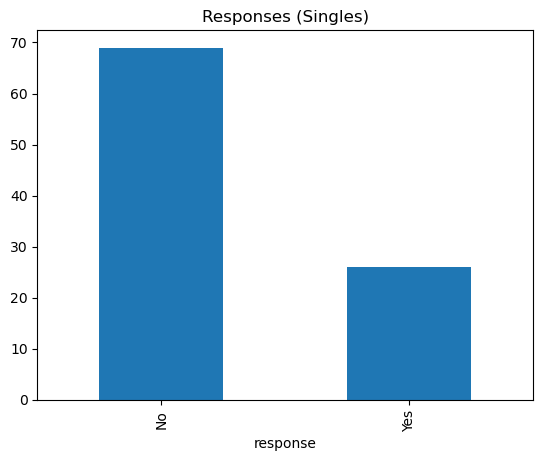

In [9]:
df_singles = extract_and_analyze_results(usa_singles, "Singles")


################# Analyzing results for Families... #################
2025-10-02 13:22:46,871 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"Tiene dos niños (4 y 1), ahorros limitados (~un mes) y prioriza viajes que incluyan a la familia; WanderLux es un servicio de lujo cuyos alojamientos a menudo no aceptan niños y sería demasiado costoso ahora. Podría considerarlo solo si ofrecieran una versión familiar o fuera mucho más asequible con cuidado de niños incluido."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-02 13:22:52,452 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"She explicitly said she would not use WanderLux because, as a part-time preschool assistant with two young children and a tight household budge

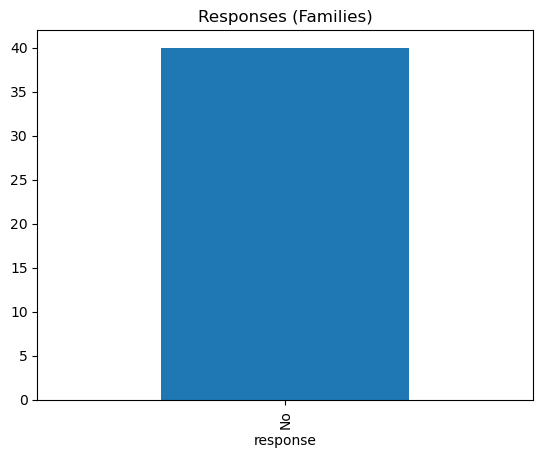

In [10]:
df_families = extract_and_analyze_results(usa_families, "Families")

################# Analyzing results for Couples... #################
2025-10-02 13:27:00,864 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Alex Larson explicitly answered \'No\', stating they are 14, their family cannot afford luxury vacations, WanderLux appears adult-focused (some places don\'t accept kids), and they prefer low-cost, family-friendly trips; they noted they might consider a service like this someday but not next year."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-02 13:27:06,809 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"Yes","justification":"He explicitly answered \'Yes\' stating that he and his wife value quiet, well-managed adult-focused beachfront/spa getaways; he is time-pressed and would pay for a servi

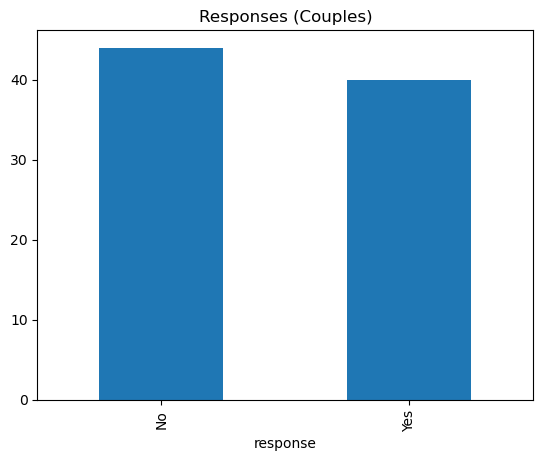

In [11]:
df_couples = extract_and_analyze_results(usa_couples, "Couples")

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np

def plot_combined_responses(title, name_to_df, individual_responses=None):
    """
    Combine the given dataframes in a single chart with grouped bars.
    Each dataframe is a different color and is properly labeled.
    
    Parameters:
    -----------
    title : str
        Title for the plot
    name_to_df : dict
        Dictionary mapping names to dataframes
    individual_responses : list, optional
        List of responses to count individually. If None, only 'Yes' and 'No' are counted individually.
        All other responses will be grouped as "Others".
    """
    print(f"################# Plotting combined responses for {title}... #################")
    
    # If individual_responses is not provided, default to Yes and No
    if individual_responses is None:
        individual_responses = ["Yes", "No"]
    
    # Get unique categories (individual responses + "Others")
    categories = individual_responses.copy()
    
    # Prepare data for grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Define a colormap
    cmap = matplotlib.colormaps['tab10']
    
    # Calculate bar width based on number of groups
    num_groups = len(name_to_df)
    bar_width = 0.8 / num_groups  # Adjust the 0.8 to control spacing
    
    # Check if we need to add "Others" category
    has_others = False
    for df in name_to_df.values():
        if any(resp not in [r.lower() for r in individual_responses] for resp in [r.lower() for r in df["response"].unique()]):
            has_others = True
            break
    
    if has_others and "Others" not in categories:
        categories.append("Others")
    
    # For each category, plot grouped bars for each dataframe
    for i, category in enumerate(categories):
        for j, (name, df) in enumerate(name_to_df.items()):
            # Calculate the position for this bar
            position = i + (j - num_groups/2 + 0.5) * bar_width
            
            # Count occurrences for this category
            if category == "Others":
                # Count all responses that are not in individual_responses (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if not any(resp.lower() == ind.lower() for ind in individual_responses))
            else:
                # Count occurrences of this category (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if resp.lower() == category.lower())
            
            # Plot the bar
            ax.bar(position, count, width=bar_width, alpha=1.0, 
                   label=name if i == 0 else "", color=cmap(j % 10))
    
    # Set the x-ticks in the middle of each group
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, fontsize=12)
    
    # Increase font sizes for better readability
    plt.title(f"Combined Responses ({title})", fontsize=16)
    plt.xlabel("Response", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(fontsize=12)
    
    # Also increase tick label sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

################# Plotting combined responses for travel preferences by group... #################


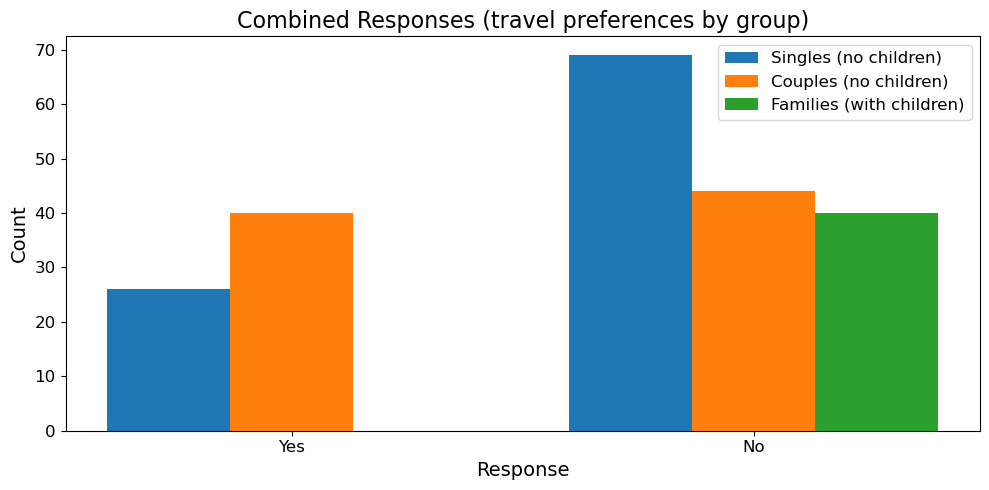

In [13]:
plot_combined_responses("travel preferences by group", 
                        {"Singles (no children)": df_singles, 
                         "Couples (no children)": df_couples,
                         "Families (with children)": df_families})

In [14]:
# statistics about the DF
df_singles.value_counts("response")

response
No     69
Yes    26
Name: count, dtype: int64

In [15]:
df_couples.value_counts("response")

response
No     44
Yes    40
Name: count, dtype: int64

In [16]:
df_families.value_counts("response")

response
No    40
Name: count, dtype: int64

## Compare with Empirical Data (if any)